# Load Module

In [1]:
from google.colab import drive
drive.mount('/content/drive')
folder_path = "/content/drive/My Drive/Bismillah Skripsi Lancar"

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import pandas as pd
import numpy as np
import seaborn as sns
import json
from google.colab import files
import os
import matplotlib.pyplot as plt

# Web Scrapping Google Play Store dan Apple App Store

In [2]:
!pip install google-play-scraper
!pip install app-store-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.3.0
    Uninstalling urllib3-2.3.0:
      Successfully uninstalled urllib3-2.3.0
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: requests
    Found existing installation: reque

In [3]:
from google_play_scraper import app, reviews_all, Sort
from app_store_scraper import AppStore

In [4]:
#Melakukan scraping ulasan aplikasi BRImo dari Google Play Store
kaiaccess_gps_rev = reviews_all(
 'com.kai.kaiticketing',
 lang='id',
 country='id',
 sort=Sort.NEWEST
)

#Mengubah format data menjadi tabel Panda agar mudah diolah
df_gps = pd.DataFrame(np.array(kaiaccess_gps_rev),columns=['review'])
df_gps = df_gps.join(pd.DataFrame(df_gps.pop('review').tolist()))

#Melakuan pengaturan ulang indeks tabel
df_gps = df_gps.reset_index(drop=True)

#Melihat beberapa baris pertama dari tabel data hasil scraping Google Play Store
df_gps.head()

#Melihat beberapa baris terakhir dari tabel data hasil scraping Google Play Store
df_gps.tail()

reviewId         userName  \
100322  f83457d0-e803-47f9-bce3-6dbca29120bf  Pengguna Google   
100323  622fb470-1237-41a0-be5f-43a72d59364d  Pengguna Google   
100324  77683699-4e3d-4ece-bf2c-9e956e8c9eb8  Pengguna Google   
100325  8bedf713-ff51-4fcc-815d-39d30d47ccf0  Pengguna Google   
100326  8749ac27-cbd5-4043-94fb-117bafd5c983  Pengguna Google   

                                                userImage  \
100322  https://play-lh.googleusercontent.com/EGemoI2N...   
100323  https://play-lh.googleusercontent.com/EGemoI2N...   
100324  https://play-lh.googleusercontent.com/EGemoI2N...   
100325  https://play-lh.googleusercontent.com/EGemoI2N...   
100326  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
100322                                          Good      5              0   
100323                                         Keren      5              0   
100324  Semoga segera di fix kan gangguan bug di app      5              0   
100325                               Sangat membantu      4              0   
100326                               TOP MARKOTOP>>>      5              0   

       reviewCreatedVersion                  at replyContent repliedAt  \
100322              1.0.0.1 2014-07-16 04:59:56         None       NaT   
100323              1.0.0.1 2014-07-16 04:36:16         None       NaT   
100324              1.0.0.1 2014-07-16 04:29:55         None       NaT   
100325              1.0.0.1 2014-07-16 04:24:14         None       NaT   
100326              1.0.0.1 2014-07-16 03:11:28         None       NaT   

       appVersion  
100322    1.0.0.1  
100323    1.0.0.1  
100324    1.0.0.1  
100325    1.0.0.1  
100326    1.0.0.1

In [10]:
#Melakukan filter untuk mengambil ulasan dari tanggal 1 Januari 2024 hingga 31 januari 2025
df_gps2 = df_gps[(df_gps['at'] >= '2024-01-01') & (df_gps['at'] < '2025-01-31')]

#Melakuan pengaturan ulang indeks tabel
df_gps2 = df_gps2.reset_index(drop=True)

#Melihat beberapa baris pertama dari tabel data hasil scraping Google Play Store
df_gps2

reviewId         userName  \
0      01283961-9e65-4442-9f12-01a5c92c50a1  Pengguna Google   
1      1ae86330-e702-4b71-8beb-fcc0eddd67da  Pengguna Google   
2      9944ca85-8acb-4b3b-9ca8-7e20c4070299  Pengguna Google   
3      d34a7415-7993-4a99-8dfd-2629c8caa51c  Pengguna Google   
4      acfa3ddd-dd6b-4fb7-bd18-47dd0c8231c3  Pengguna Google   
...                                     ...              ...   
16469  10606636-aee0-439e-9e75-4c174aecacf9  Pengguna Google   
16470  8cb6d3c3-0cff-4b27-869d-f73cb7c57760  Pengguna Google   
16471  a86eaa0a-941f-432a-8431-c8ee77144ef7  Pengguna Google   
16472  c88868c0-e6d7-4ba1-bd7d-616084727229  Pengguna Google   
16473  02cdf5cd-795a-40d5-b949-1183bf8079f7  Pengguna Google   

                                               userImage  \
0      https://play-lh.googleusercontent.com/EGemoI2N...   
1      https://play-lh.googleusercontent.com/EGemoI2N...   
2      https://play-lh.googleusercontent.com/EGemoI2N...   
3      https://play-lh.googleusercontent.com/EGemoI2N...   
4      https://play-lh.googleusercontent.com/EGemoI2N...   
...                                                  ...   
16469  https://play-lh.googleusercontent.com/EGemoI2N...   
16470  https://play-lh.googleusercontent.com/EGemoI2N...   
16471  https://play-lh.googleusercontent.com/EGemoI2N...   
16472  https://play-lh.googleusercontent.com/EGemoI2N...   
16473  https://play-lh.googleusercontent.com/EGemoI2N...   

                                                 content  score  \
0                   Jadwal gak pernah tepat bikin telat🤬      1   
1                       Sangat membantu bagi penggunanya      5   
2      Tolonglah para masinis atau yang suka berbicar...      3   
3                               Aplikasi le*et lemo* ta*      1   
4                                                  Jelek      1   
...                                                  ...    ...   
16469  Sudah melakukan pembayaran melalui KAI Pay ,sa...      3   
16470  Daftar akunnya bikin emosi, liat otp di email,...      1   
16471  Pelayanan KAI commuterline dhoho (401) kurang ...      1   
16472  Sangat mengecewakan. Jauh2 hari saya mau refun...      1   
16473  aplikasi ribet daftar aja sulit,perbaiki dong ...      1   

       thumbsUpCount reviewCreatedVersion                  at replyContent  \
0                  0                 None 2025-01-30 23:51:59         None   
1                  0                6.8.1 2025-01-30 23:44:48         None   
2                  1               6.9.13 2025-01-30 23:04:20         None   
3                  0               6.9.13 2025-01-30 19:40:06         None   
4                  0                 None 2025-01-30 17:27:04         None   
...              ...                  ...                 ...          ...   
16469              1               6.0.69 2024-01-01 01:41:43         None   
16470              0               6.0.69 2024-01-01 01:34:30         None   
16471              0               6.0.69 2024-01-01 01:21:36         None   
16472              0               6.0.64 2024-01-01 01:05:43         None   
16473              1               6.0.69 2024-01-01 00:48:18         None   

      repliedAt appVersion  
0           NaT       None  
1           NaT      6.8.1  
2           NaT     6.9.13  
3           NaT     6.9.13  
4           NaT       None  
...         ...        ...  
16469       NaT     6.0.69  
16470       NaT     6.0.69  
16471       NaT     6.0.69  
16472       NaT     6.0.64  
16473       NaT     6.0.69  

[16474 rows x 11 columns]

In [6]:
df_gps2['reviewCreatedVersion'].nunique()

30

In [7]:
#Mengambil hasil ulasan aplikasi Access by KAI dari Apple App Store
detail_apl = AppStore(
 country='id',
 app_name= 'access-by-kai',
 app_id= '901804734'
)
detail_apl.review(how_many = 100000)
#Menyimpan hasil ulasan aplikasi yang telah diperoleh
detail_apl.reviews

ERROR:Base:Something went wrong: HTTPSConnectionPool(host='amp-api.apps.apple.com', port=443): Max retries exceeded with url: /v1/catalog/id/apps/901804734/reviews?l=en-GB&offset=2000&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac (Caused by ResponseError('too many 429 error responses'))


[{'date': datetime.datetime(2025, 3, 21, 13, 38, 46),
  'review': 'Aplikasi mudah digunakan, kalo ada perbaikan sistem juga diinformasikan, yang jelas tidak ada biaya admin untuk pembelian tiket👍🏻',
  'rating': 5,
  'isEdited': False,
  'userName': 'mutiaraayu_p',
  'title': 'Memudahkan'},
 {'date': datetime.datetime(2025, 3, 21, 15, 13, 28),
  'review': 'Apresiasi banget sekarang bisa tau female seat map di apk KAI. Tapi disayangkan untuk kereta lokal / jarak dekat belum bisa. Padahal sering banget naik kereta lokal :(',
  'rating': 3,
  'isEdited': False,
  'userName': 'Shiell51',
  'title': 'Bisa tau female seat map hanya di KAI antar kota / jarak jauh'},
 {'date': datetime.datetime(2025, 3, 21, 14, 49, 26),
  'review': 'Bug ga jelas, bayar ga bisa, qris ga muncul, ovo ga bisa, kaspro salah pin terus katanya padahal udah bener',
  'rating': 1,
  'isEdited': False,
  'userName': 'NagaHitamSatuDua',
  'title': 'Banyak BuG'},
 {'date': datetime.datetime(2025, 3, 20, 16, 55, 26),
  'rev

In [11]:
#Mengubah format data menjadi tabel Panda agar mudah diolah
df_apl = pd.DataFrame(np.array(detail_apl.reviews),columns=['review'])
df_apl2 = df_apl.join(pd.DataFrame(df_apl.pop('review').tolist()))

#Melakukan filter untuk mengambil ulasan dari tanggal 1 Agustus 2024 hingga 31 januari 2025
df_apl3 = df_apl2[(df_apl2['date'] >= '2024-01-01') & (df_apl2['date'] < '2025-01-31')]
#Melakuan pengaturan ulang indeks tabel
df_apl3 = df_apl3.reset_index(drop=True)
#Melihat beberapa baris pertama dari tabel data hasil scraping Apple App Store
df_apl3

date                                             review  \
0    2024-01-05 05:53:31  Aneh banget udah pesen tiket, udah bayar pake ...   
1    2024-05-31 01:59:23  mau pesen harus akun basic, udh daftar akun ba...   
2    2024-02-15 02:58:25  Plis., ini aplikasi sangat dibutuhkan rakyat. ...   
3    2024-05-26 06:15:04  bikin males lama lama, data diri harus dimasuk...   
4    2024-12-31 08:15:31  Min, plislah. Ini mau beli tiket harus upgrade...   
...                  ...                                                ...   
1515 2024-05-07 23:46:50  lag parah gabisa dibuka app nya sering down ju...   
1516 2024-05-07 18:02:30  tolong dibenahi UI/UX nya masa gabisa milih te...   
1517 2024-05-07 17:15:37  Aplikasi sampah !!\nDi Suruh upgrade data diri...   
1518 2024-05-07 13:11:20  Sekelas aplikasi KAI tapi susah banget, sistem...   
1519 2024-05-07 10:49:51  Yang bikin apknya kek org baru magang 1 minggu...   

      rating  isEdited                 userName  \
0          1     False                 hzrdosss   
1          2     False  eriska amanda pinastika   
2          1     False               @rainy_333   
3          1     False                Lollzkiib   
4          2     False               Sandireysa   
...      ...       ...                      ...   
1515       1     False          harmali legiani   
1516       1     False                   drlstr   
1517       1     False          yustus siringon   
1518       2     False          Nurhikmah Solin   
1519       1     False             godnfksnnvds   

                                                  title developerResponse  
0                                       Aplikasi penipu               NaN  
1                  mau cek jadwal gabisa scroll kebawah               NaN  
2                       To: Pak Mentri BUMN & Dirut KAI               NaN  
3                                     Data ke reset trs               NaN  
4                           Gabisa upgrade member basic               NaN  
...                                                 ...               ...  
1515  aplikasi yg sangat memalukan dari salah satu p...               NaN  
1516                                                  .               NaN  
1517                                             Sampah               NaN  
1518                                                Bad               NaN  
1519                                                Bug               NaN  

[1520 rows x 7 columns]

In [ ]:
df['rating'].value_counts()

rating
1    1706
5     428
2     218
3     125
4      83
Name: count, dtype: int64

In [ ]:
#Memilih kolom yang diperlukan dari kedua tabel hasil scraping
df1 = df_gps2[['content','score']]
df1.columns = ['review','rating']
df2 = df_apl3[['review','rating']]
print('Google Play:',df1.shape,'App Store:',df2.shape,)
#Menggabungkan kedua tabel menjadi satu tabel
df = pd.concat([df1,df2])
df = df.reset_index(drop=True)
print('Total DF Size:',df.shape)

Google Play: (2305, 2) App Store: (255, 2)
Total DF Size: (2560, 2)


In [ ]:
# Menambahkan kolom kosong "sentiment"
df["sentiment"] = None  # atau bisa juga pakai df["sentiment"] = ""

In [ ]:
# Simpan file ke dalam folder
df.to_csv(f"{folder_path}/reviews_kai_simulation2.csv", index=False)
print("File berhasil disimpan!")


File berhasil disimpan!


# Load Data

In [ ]:
import pandas as pd

# Membaca file txt ke dalam dataframe
reviews = pd.read_csv(f"{folder_path}/reviews_kai2.csv")

# Menampilkan 5 baris pertama untuk memastikan data terimpor dengan benar
print(reviews.head())


                                              review  rating
0               Jadwal gak pernah tepat bikin telat🤬       1
1                   Sangat membantu bagi penggunanya       5
2  Tolonglah para masinis atau yang suka berbicar...       3
3                           Aplikasi le*et lemo* ta*       1
4                                              Jelek       1


In [ ]:
reviews['rating'].value_counts()

rating
1    11596
5     2550
2     1504
3      841
4      528
Name: count, dtype: int64

In [ ]:
# Load Data
df = reviews[['review', 'sentiment']]

# Misalnya df sudah ada
df["sentiment"] = df["sentiment"].replace(9, 0)

# Menampilkan hasil
print(df)


                                                 review  sentiment
0                                                    Ok          1
1     Ni gimana sih kok tombol pembatalan pembelian ...          0
2     Parah asli parah aplikasi ini tingkat dewa par...          0
3     Kacau2 hp jadu udah gak bisa makek apk ini , d...          0
4     Pelayan terburuk yang pernah ada, kalo tiket b...          0
...                                                 ...        ...
2555  Bad bgt pelayanan juga jelekk ga sat set,, ga ...          0
2556                             aplikasi macam apa ini          0
2557  Sekarang aplikasinya makin lemot, tiap mau buk...          0
2558  KAI Lokal tujuan rangkas merak sekarang tidak ...          0
2559  Lgi tidur enak padahal kan klo di bagunin nyaa...          0

[2560 rows x 2 columns]


<ipython-input-77-421f34e70fcf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = df["sentiment"].replace(9, 0)


In [ ]:
df['sentiment'].value_counts()

sentiment
0    2166
1     394
Name: count, dtype: int64

# Preprocessing data

In [ ]:
pip install Sastrawi nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.0 MB/s eta 0:00:00


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


In [ ]:
df_preclean = df.copy()
df = df.reset_index(drop=True)

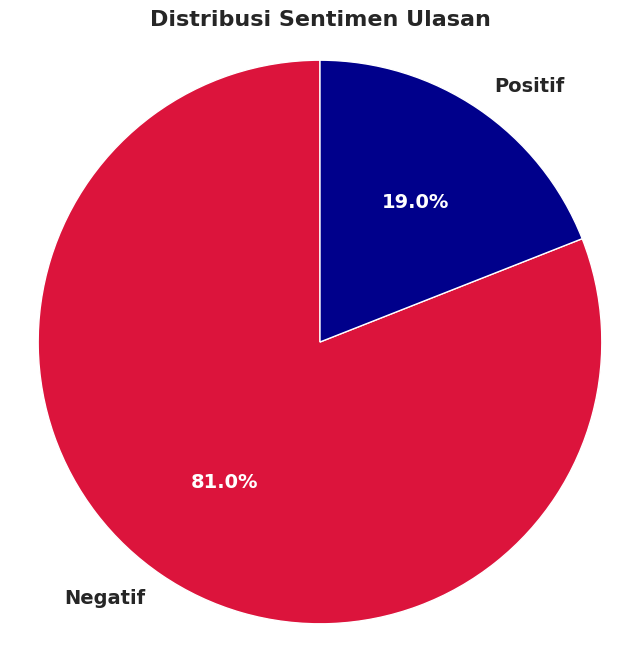

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data sentimen
labels = ["Negatif", "Positif"]
sizes = [13100, 3078]
colors = ["crimson", "darkblue"]  # Warna merah tua untuk negatif, biru tua untuk positif

# Set style seaborn
sns.set_theme(style="whitegrid")

# Buat pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct="%.1f%%", startangle=90, colors=colors,
    textprops={'fontsize': 14, 'weight': 'bold'})

# Mengatur warna teks agar lebih kontras
for text in autotexts:
    text.set_color("white")  # Ubah warna teks persen agar terlihat jelas

plt.title("Distribusi Sentimen Ulasan", fontsize=16, fontweight="bold")
plt.axis("equal")  # Membuat pie chart berbentuk lingkaran
plt.show()


Statistik jumlah kata:
count    2560.000000
mean       16.570312
std        16.530897
min         1.000000
25%         5.000000
50%        11.000000
75%        23.000000
max       238.000000
dtype: float64
Jumlah kata maksimum: 238
Review dengan jumlah kata maksimum: Yth. Tim KAI,

Saya ingin menyampaikan pengalaman saya terkait pemesanan tiket KAI Lokal melalui aplikasi KAI Access yang mengalami kendala.

Pada H-5 sebelum keberangkatan, saya memesan tiket dari Kediri menuju Malang. Saat pemesanan, saya telah memilih kursi, memilih metode pembayaran, dan melakukan pembayaran melalui QRIS. Proses pembayaran dinyatakan berhasil, baik melalui notifikasi email dari KAI maupun dari saldo M-banking saya yang sudah terpotong.

Namun, pada hari keberangkatan, saat saya mengecek tiket di aplikasi, tiket tersebut tidak muncul. Ketika saya memeriksa riwayat transaksi, statusnya menunjukkan bahwa pembayaran gagal. Hal ini sangat membingungkan, mengingat saya sebelumnya telah menerima konfirmasi ba

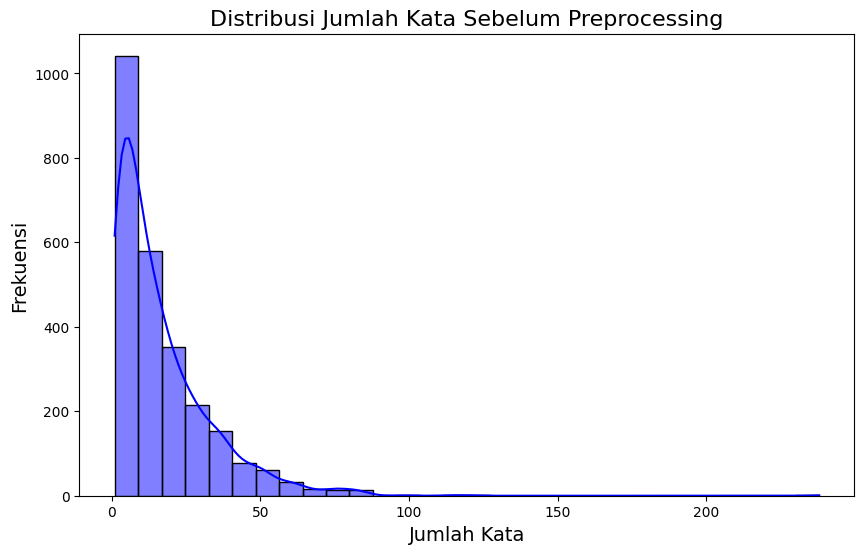

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

review = df['review']
# Menghitung jumlah kata untuk setiap ulasan
word_counts = [len(doc.split()) for doc in review]

# Menampilkan statistik deskriptif jumlah kata
print("Statistik jumlah kata:")
print(pd.Series(word_counts).describe())

# Temukan review dengan jumlah kata maksimum
max_count = max(word_counts)
index_max = word_counts.index(max_count)
print("Jumlah kata maksimum:", max_count)
print("Review dengan jumlah kata maksimum:", review[index_max])


# Plot distribusi jumlah kata dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(word_counts, bins=30, kde=True, color='blue')
plt.title("Distribusi Jumlah Kata Sebelum Preprocessing", fontsize=16)
plt.xlabel("Jumlah Kata", fontsize=14)
plt.ylabel("Frekuensi", fontsize=14)
plt.show()


## Standarisasi kata

In [ ]:
import re

def clean_text(text):
    if not isinstance(text, str):
        return ""  # Jika teks kosong atau bukan string, kembalikan string kosong

    text = text.lower()

    # Menghapus URL
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', '', text)

    # Menghapus mention (@username)
    text = re.sub(r'@[^\s]+', '', text)

    # Menghapus hashtag tetapi tetap menyimpan teksnya
    text = re.sub(r'#([^\s]+)', r'\1', text)

    # Menghapus tanda baca kecuali spasi
    text = re.sub(r'[^\w\s]', ' ', text)

    # Menghapus angka dan karakter tanda hubung (-)
    text = re.sub(r'[\d-]', '', text)

    # Menghapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    # Menghapus huruf yang diulang lebih dari dua kali
    text = re.sub(r'(\w)\1{2,}', r'\1\1', text)

    return text

# Membersihkan seluruh data di kolom 'review_description'
df['review'] = df['review'].apply(clean_text)


In [ ]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticon
        u"\U0001F300-\U0001F5FF"  # Simbol & Piktogram
        u"\U0001F680-\U0001F6FF"  # Transportasi & Simbol lainnya
        u"\U0001F700-\U0001F77F"  # Simbol tambahan
        u"\U0001F780-\U0001F7FF"  # Simbol Geometri tambahan
        u"\U0001F800-\U0001F8FF"  # Simbol tambahan
        u"\U0001F900-\U0001F9FF"  # Emoji tambahan (misalnya wajah)
        u"\U0001FA00-\U0001FA6F"  # Emoji lainnya (misalnya alat musik, tangan)
        u"\U0001FA70-\U0001FAFF"  # Emoji tambahan
        u"\U00002702-\U000027B0"  # Simbol lainnya
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)  # Menghapus emoji dari teks

# Terapkan ke kolom `review_description`
df['review'] = df['review'].astype(str).apply(remove_emojis)


In [ ]:
# Fungsi untuk menghilangkan imbuhan "nya" dari teks
def remove_nya(text):
    if isinstance(text, str):
        # Menghapus "nya" yang menyambung dengan kata dasar
        text = re.sub(r'\b(\w+)nya\b', r'\1', text)
        # Menghapus "nya" yang berdiri sendiri
        text = re.sub(r'\bnya\b', '', text)
    return text

# Memanggil fungsi penghilang imbuhan "nya" dari teks
df['review'] = df['review'].apply(remove_nya)

In [ ]:
# Menampilkan semua isi baris tanpa dipotong
pd.set_option('display.max_colwidth', None)

# Menampilkan setelah proses cleaning
# Menampilkan 25 baris pertama dan 25 baris terakhir
df_display_ori = pd.concat([df_preclean.head(25), df_preclean.tail(25)])
df_display_ori

review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Ok   
1                                                                                                                                                                                                                                                           Ni gimana sih kok tombol pembatalan pembelian tiket gak ada dan saya sangat kecewa sama pihak kai d hubungin selalu nunggu antrian saya tunggu sampek 24am gak bisa2 selalu alasan selalu tunggu antrian tolong d perbaiki klu tdk bisa jgn d teruskan APP ni   
2                Parah asli parah aplikasi ini tingkat dewa parahnya developernya... Antrian kurang 1 menit naik lagi jadi 2 menit.. gitu terus sampe 15 menit.. parah asli.. Inalillahi.. aku buenci aplikasi ini.. udah kadung topup kaipay.. ga bisa di pindah ke wallet lain atau ke bank.. cuma bisa ditransaksikan.. di buat beli pulsa axis, saldo udah kepotong.. tapi ga masuk2 pulsanya.. ku cek di riwayat ternyata ga ke record.. ini namanya ngerampok.. ga usah top up KAIpay.. mending bayar pake VA aja..   
3                                                                                                                                                                                                                                                                                                                                                                                                                  Kacau2 hp jadu udah gak bisa makek apk ini , di apdet malah ajur gakbisa pesentiket gakmemadai hp nya😢   
4     Pelayan terburuk yang pernah ada, kalo tiket bermasalah, kenapa gak bilang dari awal, toh udah bolak balik ke pengecekan tiket Sampek 5x, dari pertama Sampek ke empat udah dibarkoti, diterima dan disuruh nunggu karna masih satu jam lagi, dari pertama Sampek ke 4 gitu, yang ke lima katanya tiket gak bisa dipake, padahal dari kereta itu, saya yang pertama cek tiket, tapi responnya tiket gak bisa dipake, suruh beli lagi, berhubung sudah kurang 5 menit pemberangkatan, tiket sudah habis, dobol Cok..   
5                                                                                                                                                                                                                                                                                                                                                                         kenapa setelah update tidak bisa memilih kursi? padahal enakan bisa pilih kursi sendiri, makin di update bukannya makin bagus malah makin jelek   
6                                                                                                                                                                                                                                                                                                                                                                                                                                                                         perbaiki lagi kadang suka eror pas dipembayaran   
7                                                                                                                                                                                                                                                                                                                                                                                               susah cari...kok jelas2 saya cari keberangk

In [ ]:
# Menampilkan setelah proses cleaning
# Menampilkan 25 baris pertama dan 25 baris terakhir
df_display = pd.concat([df.head(25), df.tail(25)])
df_display

review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           ok   
1                                                                                                                                                                                                                                   ni gimana sih kok tombol pembatalan pembelian tiket gak ada dan saya sangat kecewa sama pihak kai d hubungin selalu nunggu antrian saya tunggu sampek am gak bisa selalu alasan selalu tunggu antrian tolong d perbaiki klu tdk bisa jgn d teruskan app ni   
2                                         parah asli parah aplikasi ini tingkat dewa parah developer antrian kurang menit naik lagi jadi menit gitu terus sampe menit parah asli inalillahi aku buenci aplikasi ini udah kadung topup kaipay ga bisa di pindah ke wallet lain atau ke bank cuma bisa ditransaksikan di buat beli pulsa axis saldo udah kepotong tapi ga masuk pulsa ku cek di riwayat ternyata ga ke record ini nama ngerampok ga usah top up kaipay mending bayar pake va aja   
3                                                                                                                                                                                                                                                                                                                                                                                              kacau hp jadu udah gak bisa makek apk ini di apdet malah ajur gakbisa pesentiket gakmemadai hp    
4     pelayan terburuk yang pernah ada kalo tiket bermasalah kenapa gak bilang dari awal toh udah bolak balik ke pengecekan tiket sampek x dari pertama sampek ke empat udah dibarkoti diterima dan disuruh nunggu karna masih satu jam lagi dari pertama sampek ke gitu yang ke lima kata tiket gak bisa dipake padahal dari kereta itu saya yang pertama cek tiket tapi respon tiket gak bisa dipake suruh beli lagi berhubung sudah kurang menit pemberangkatan tiket sudah habis dobol cok   
5                                                                                                                                                                                                                                                                                                                                                   kenapa setelah update tidak bisa memilih kursi padahal enakan bisa pilih kursi sendiri makin di update bukan makin bagus malah makin jelek   
6                                                                                                                                                                                                                                                                                                                                                                                                                                              perbaiki lagi kadang suka eror pas dipembayaran   
7                                                                                                                                                                                                                                                                                                                                                                          susah cari kok jelas saya cari keberangkatan dari ke dengan benar tetap disalahkan jd menurut sangat tidak membantu   
8                                                                                                                                     

## Normalisasi Formalisasi kata

In [ ]:
# Membaca file CSV
normal_id = pd.read_csv(f"{folder_path}/fikkamusnormalisasikata-2024.csv", encoding='latin-1', delimiter=',', header=None)

# Menghapus karakter ';' pada kolom 'tidak_baku' dan 'kata_baku'
normal_id[0] = normal_id[0].str.replace(';', '', regex=False)
normal_id[1] = normal_id[1].str.replace(';', '', regex=False)

# Menamai ulang kolom
normal_id.columns = ['tidak_baku', 'kata_baku']
informal = normal_id['tidak_baku'].values.tolist()
formal = normal_id['kata_baku'].values.tolist()

# Menghapus baris pertama dan kedua (index 0 dan 1)
normal_id = normal_id.drop([0, 1])

# Menampilkan hasil
print(normal_id.head())


  tidak_baku  kata_baku
2      aktip      aktif
3  aktifitas  aktivitas
4     Apotik     Apotek
5     apotik     Apotek
6    analisa   analisis


In [ ]:
# Fungsi untuk formalisasi kata
def formalize_text(text, formal, informal):
    text = text.split(" ")
    for i in range(len(text)):
        if text[i] in informal:
            ind = informal.index(text[i])
            text[i] = formal[ind]
    return " ".join(text)

# Memanggil fungsi untuk melakukan formalisasi kata
df['review'] = df['review'].apply(lambda x: formalize_text(x, formal, informal))


In [ ]:
def fix_slangwords(text):
    # Urutkan kunci (keys) berdasarkan jumlah kata (descending)
    # sehingga frasa multi-kata diproses terlebih dahulu.
    sorted_keys = sorted(slangwords.keys(), key=lambda k: len(k.split()), reverse=True)
    for key in sorted_keys:
        # Buat pola regex dengan word boundaries agar hanya mengganti kata/frasa yang utuh.
        pattern = r'\b' + re.escape(key) + r'\b'
        # Lakukan penggantian dengan flag IGNORECASE agar pencocokan tidak case-sensitive.
        text = re.sub(pattern, slangwords[key], text, flags=re.IGNORECASE)
    return text

# Contoh penggunaan:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "tokped": "tokopedia", "pesen": "pesan", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "gx": "tidak", "negri": "negeri", "pas": "saat", "kejepret": "kefoto", "ruwet": "sulit", "dancuki": "buruk", "apk": "aplikasi", "cs": "customer service", "cz": "karena", "gd": "tidak ada", "sim": "surat izin mengemudi", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apazsih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "acc": "diterima", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cm": "hanya", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "donlod": "download", "freeongkir": "gratis biaya jasa pengiriman", "gratong": "gratis biaya jasa pengiriman", "handphone": "ponsel", "hp": "ponsel", "ngefreze": "freeze", "laz da": "lazada", "ngk": "tidak", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gimmick": "tipuan", "gj": "tidak jelas", "loh":"", "ta": "", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jt": "juta", "rban":"ribuan", "jgnkan": "jangankan", "jir": "anjing", "njir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "kyk": "seperti", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngk": "tidak", "nggk": "tidak", "ngak": "tidak", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "s k": "syarat dan ketentuan", "sbh": "sebuah", "sbnrny": "sebenarnya", "ongkir": "ongkos kirim", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "sreg":"yakin", "kek":"seperti", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "puyeng": "bingung", "apahhhhhhh": "apa", "tolol": "bodoh", "tlol": "bodoh", "kntl": "buruk", "lgi": "lagi", "kkntl": "buruk", "smntr": "sementara","yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "ecek": "jelek", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pemesana":"pemesanan", "penangan anya": "penanganannya", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "php":"harapan palsu", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa",  "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "bagu": "bagus", "top up": "menambahkan", "gak": "tidak", "le et": "lambat", "lemo": "lambat", "lelet": "lambat", "lemot": "lambat", "ga": "tidak", "n": "dan", "tpi": "tapi", "pliss": "tolong", "jgn": "jangan", "rubah": "berubah", "berasil": "berhasil", "tf": "transfer", "udh": "sudah", "m banking": "aplikasi bank online", "topup": "menambahkan", "top up": "menambahkan saldo", "tb": "mendadak", "bngt": "banget", "backendnya": "pengembang aplikasi", "developer": "pengembang aplikasi", "bumb": "bumn", "gbs": "tidak bisa", "gabs": "tidak bisa", "ui": "user interface", "knp": "kenapa", "tlpn": "telepon", "gabisa": "tidak bisa", "zonkk": "mengecewakan", "zonk": "mengecewakan", "ngaco": "tidak masuk akal"}

# Misal review awal
contoh_review = "Setelah saya top up saldo, saya jadi bisa bayar tagihan."
print(fix_slangwords(contoh_review))


Setelah saya menambahkan saldo saldo, saya jadi bisa bayar tagihan.


In [ ]:
df['review'] = df['review'].apply(fix_slangwords)

In [ ]:
# Menampilkan setelah proses cleaning
# Menampilkan 25 baris pertama dan 25 baris terakhir
df_display2 = pd.concat([df.head(25), df.tail(25)])
df_display2

review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              oke   
1                                                                                                                                                                                                                          ini bagaimana sih kok tombol pembatalan pembelian tiket tidak ada dan saya sangat kecewa sama pihak kai di   hubungin selalu nunggu antrian   saya tunggu sampai am tidak bisa selalu alasan selalu tunggu antrian   tolong di   perbaiki kalau tidak bisa jangan di   teruskan app ini   
2           parah asli parah aplikasi ini tingkat dewa parah pengembang aplikasi antrian   kurang menit naik lagi jadi menit begitu terus sampai menit parah asli inalillahi saya buenci aplikasi ini sudah kadung menambahkan kaipay tidak bisa di pindah ke wallet lain atau ke bank cuma bisa ditransaksikan di buat beli pulsa axis saldo sudah kepotong tetapi tidak masuk pulsa saya lihat di riwayat ternyata tidak ke record ini nama merampok tidak perlu tinggi up kaipay lebih baik bayar pakai va saja   
3                                                                                                                                                                                                                                                                                                                                                                                             kacau ponsel jadu sudah tidak bisa makek aplikasi ini di update bahkan ajur tidak bisa pesentiket gakmemadai ponsel    
4     pelayan   terburuk yang pernah ada kalau tiket bermasalah kenapa tidak bilang dari awal tuh sudah bolak balik ke pengecekan tiket sampai sangat dari pertama sampai ke empat sudah dibarkoti diterima dan disuruh nunggu karena masih satu jam lagi dari pertama sampai ke begitu yang ke lima kata tiket tidak bisa pakai padahal dari kereta itu saya yang pertama lihat tiket tetapi jawab tiket tidak bisa pakai suruh beli lagi berhubung sudah kurang menit pemberangkatan tiket sudah habis dobol cok   
5                                                                                                                                                                                                                                                                                                                                                                          kenapa setelah baru tidak bisa memilih kursi padahal enakan bisa pilih kursi sendiri makin di baru bukan makin bagus bahkan makin jelek   
6                                                                                                                                                                                                                                                                                                                                                                                                                                                               perbaiki lagi kadang suka error cocok dipembayaran   
7                                                                                                                                                                                                                                                                                                                                                                                          susah cari kok jelas saya cari keberangkatan dari ke dengan benar tetap disalahkan   jadi menurut

## Removing stop words

In [ ]:
import nltk
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd

# Mengunduh stopwords dari NLTK
nltk.download('stopwords')

# Menyiapkan stopwords bahasa Indonesia dan Inggris
stop_id = set(stopwords.words('indonesian'))
stop_en = set(stopwords.words('english'))

# Menggabungkan stopwords
stop_words = stop_id.union(stop_en)

# Memuat stop words bahasa Indonesia dari Sastrawi
factory = StopWordRemoverFactory()
stop_sastrawi_id = factory.get_stop_words()

# Menggabungkan stop words Sastrawi dan NLTK
stop_words = stop_words.union(stop_sastrawi_id)

# Memuat stopwords tambahan
extra_stop_id = pd.read_csv(f"{folder_path}/tala-stopwords-indonesia.txt", header=None)
extra_stop_id = extra_stop_id[0].tolist()

# Menggabungkan seluruh stop words
stop_words = stop_words.union(set(extra_stop_id))

# Fungsi untuk penyaringan stopwords pada kolom 'review_description'
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

# Memanggil fungsi penyaringan stopwords pada kolom 'review_description'
df['review'] = df['review'].apply(lambda x: remove_stopwords(x))

# Menghilangkan sisa-sisa jarak tambahan yanga muncul antar kata
def remove_space(text):
  space_remove = re.sub(r"\s+"," ", text).strip()
  return space_remove
df['review'] = df['review'].apply(lambda x: remove_space(x))

# Menampilkan hasil
print(df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                                                                                                                                                                                                                                                    review  \
0                                                                                                                                                                                                                                                                                      oke   
1                                                                                                                                                              sih tombol pembatalan pembelian tiket kecewa kai hubungin nunggu antrian tunggu alasan tunggu antrian perbaiki teruskan app   
2     parah asli parah aplikasi tingkat dewa parah pengembang aplikasi antrian menit menit menit parah asli inalillahi buenci aplikasi kadung 

In [ ]:
# Menampilkan setelah proses cleaning
# Menampilkan 25 baris pertama dan 25 baris terakhir
df_display3 = pd.concat([df.head(25), df.tail(25)])
df_display3

review  \
0                                                                                                                                                                                                                                                                                      oke   
1                                                                                                                                                              sih tombol pembatalan pembelian tiket kecewa kai hubungin nunggu antrian tunggu alasan tunggu antrian perbaiki teruskan app   
2     parah asli parah aplikasi tingkat dewa parah pengembang aplikasi antrian menit menit menit parah asli inalillahi buenci aplikasi kadung kaipay pindah wallet bank ditransaksikan beli pulsa axis saldo kepotong masuk pulsa lihat riwayat record nama merampok kaipay bayar pakai va   
3                                                                                                                                                                                                                kacau ponsel jadu makek aplikasi update ajur pesentiket gakmemadai ponsel   
4                                                                     pelayan terburuk tiket bermasalah bilang tuh bolak pengecekan tiket dibarkoti diterima disuruh nunggu jam tiket pakai kereta lihat tiket tiket pakai suruh beli berhubung menit pemberangkatan tiket habis dobol cok   
5                                                                                                                                                                                                                                             memilih kursi enakan pilih kursi bagus jelek   
6                                                                                                                                                                                                                                            perbaiki kadang suka error cocok dipembayaran   
7                                                                                                                                                                                                                                        susah cari cari keberangkatan disalahkan membantu   
8                                                                                                                                                                                                                                                                               registrasi   
9                                                                                                                                                                                                                                                                                   lambat   
10                                                                                                         kasih bintang aplikasi masuk member oke masuk isi tulisan masukkan sandi opsi sandi cocok isi tulisan token kedaluwarsa masuk si saran iya aplikasi maksimalin orang data masuk   
11                                                                                                                                                                                        beli tiket lebaran susah dibelain begadang berhari eh teman begadang bayar jasa ribu makelar iya   
12                                                                                                                                                                                                                                       aplikasi kompatibel kemudahan penumpang terlantar   
13                                                                                                                                                                                                            nge review kesekian menambah bagus menambah jelek mencari tiket an

## Stemming

In [ ]:
# Memuat fungsi stemming dari library Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat Fungsi untuk stemming pada kolom 'review_description'
def stemming(text):
    return stemmer.stem(text)

# Memanggil fungsi stemming pada kolom 'review_description'
df['review'] = df['review'].apply(stemming)

In [ ]:
# Menampilkan setelah proses cleaning
# Menampilkan 25 baris pertama dan 25 baris terakhir
df_display4 = pd.concat([df.head(25), df.tail(25)])
df_display4

review  \
0                                                                                                                                                                                                                                                                        oke   
1                                                                                                                                                                       sih tombol batal beli tiket kecewa kai hubungin nunggu antri tunggu alas tunggu antri baik terus app   
2     parah asli parah aplikasi tingkat dewa parah kembang aplikasi antri menit menit menit parah asli inalillahi buenci aplikasi kadung kaipay pindah wallet bank transaksi beli pulsa axis saldo potong masuk pulsa lihat riwayat record nama rampok kaipay bayar pakai va   
3                                                                                                                                                                                                  kacau ponsel jadu makek aplikasi update ajur pesentiket gakmemadai ponsel   
4                                                                                 layan buruk tiket masalah bilang tuh bolak kece tiket dibarkoti terima suruh nunggu jam tiket pakai kereta lihat tiket tiket pakai suruh beli hubung menit berangkat tiket habis dobol cok   
5                                                                                                                                                                                                                                   pilih kursi enak pilih kursi bagus jelek   
6                                                                                                                                                                                                                                         baik kadang suka error cocok bayar   
7                                                                                                                                                                                                                                      susah cari cari berangkat salah bantu   
8                                                                                                                                                                                                                                                                 registrasi   
9                                                                                                                                                                                                                                                                     lambat   
10                                                                                                  kasih bintang aplikasi masuk member oke masuk isi tulis masuk sandi opsi sandi cocok isi tulis token kedaluwarsa masuk si saran iya aplikasi maksimalin orang data masuk   
11                                                                                                                                                                                 beli tiket lebaran susah bain begadang hari eh teman begadang bayar jasa ribu makelar iya   
12                                                                                                                                                                                                                                  aplikasi kompatibel mudah tumpang lantar   
13                                                                                                                                                                                                         nge review sekian tambah bagus tambah jelek cari tiket antri aneh   
14                                                                                                                                                                                    

## Drop duplicates & NA

In [ ]:
# Memeriksa jumlah data sebelum membuang data hilang
print(df.shape)

(2560, 2)


In [ ]:
# Menghitung jumlah baris duplikat
duplicate_count = df.duplicated().sum()
print("Jumlah data duplikat:", duplicate_count)

# Menghitung jumlah missing data per kolom
missing_per_column = df.isna().sum()
print("Jumlah data hilang per kolom:\n", missing_per_column)

# Total missing data di seluruh DataFrame
total_missing = df.isnull().sum().sum()
print("Total data hilang:", total_missing)


Jumlah data duplikat: 264
Jumlah data hilang per kolom:
 review       0
sentiment    0
dtype: int64
Total data hilang: 0


<Axes: >

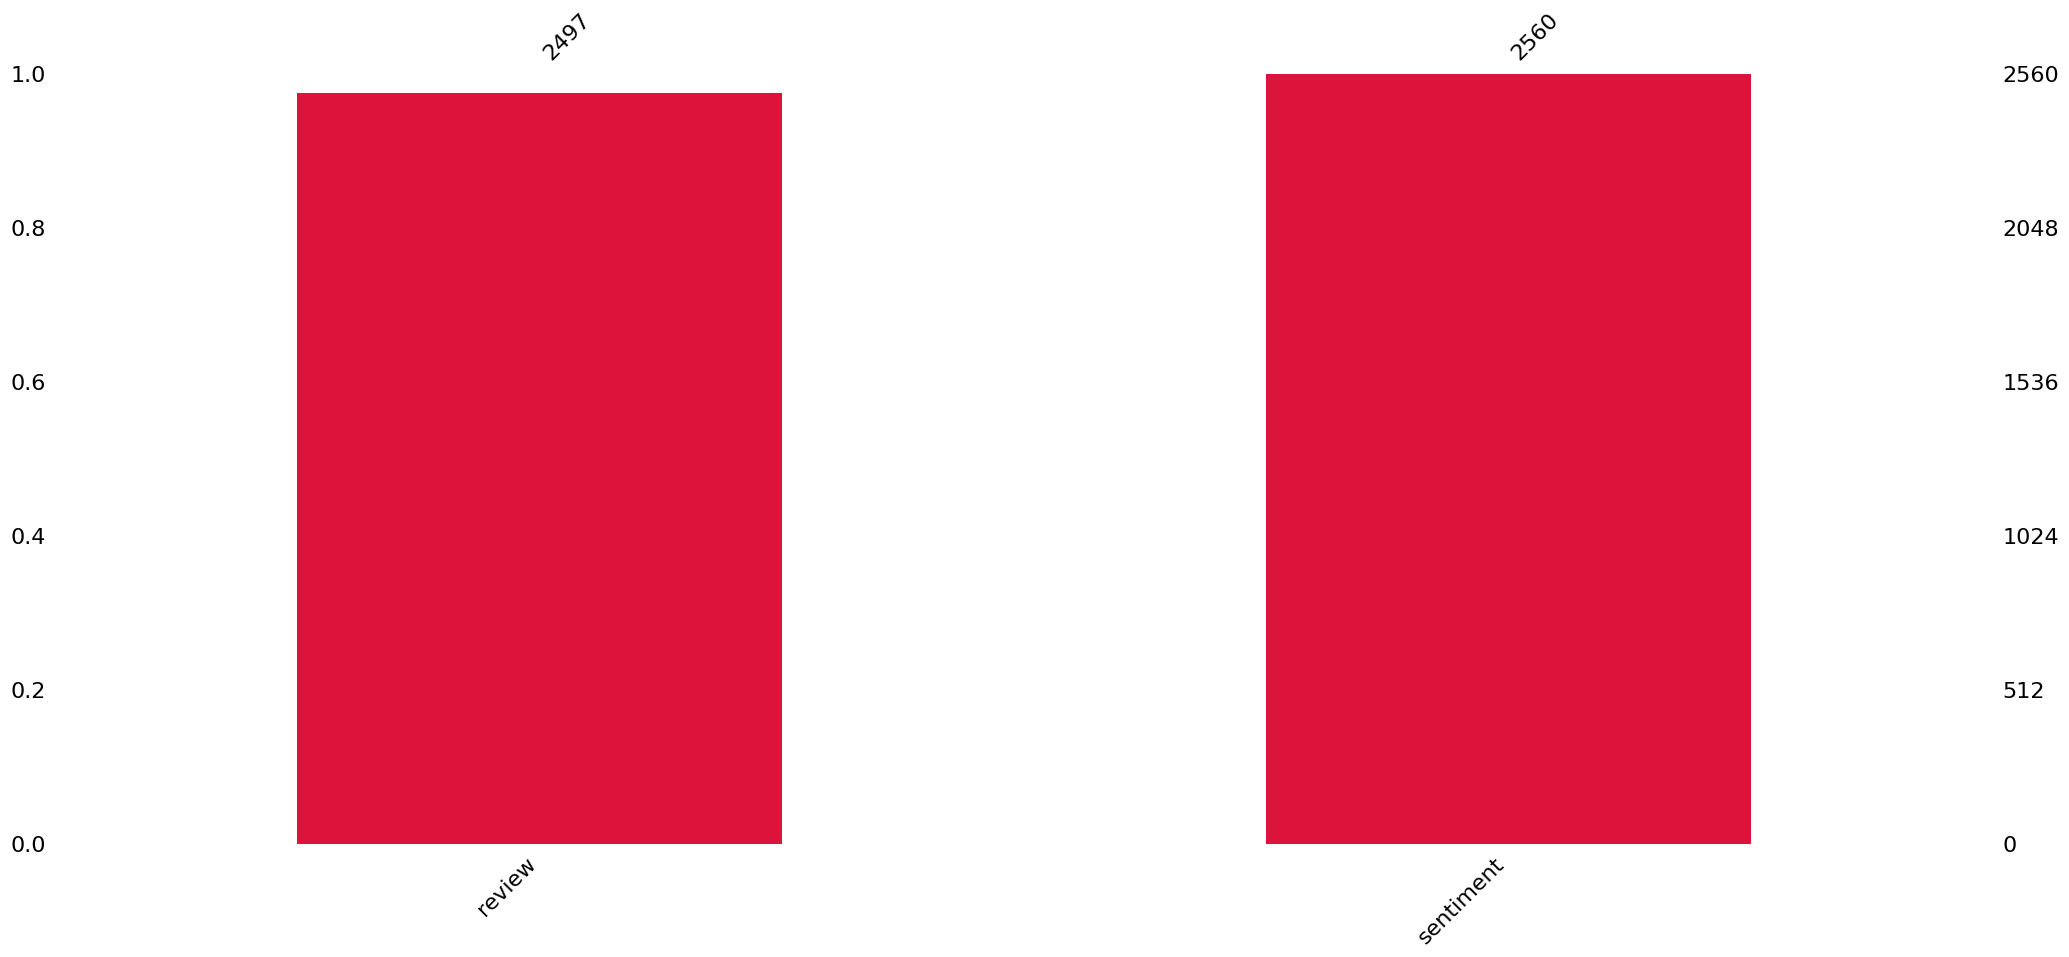

In [ ]:
# Mengubah ulasan-ulasan yang kosong menjadi data hilang
df['review'] = df['review'].astype(str)
df = df.reset_index(drop=True)
df = df.replace(r'^\s*$', np.nan, regex=True)  # Mengubah string kosong menjadi NaN
df.isna().sum

# Memeriksa data yang hilang dengan visualisasi
msno.bar(df, color='crimson')

In [ ]:
# Menghapus baris yang mengandung data hilang
df = df.dropna()

# Memeriksa jumlah data setelah membuang data hilang
print(df.shape)

(2497, 2)


In [ ]:
df['sentiment'].value_counts()

sentiment
0    2137
1     360
Name: count, dtype: int64

In [ ]:
# Memeriksa data duplikat
df.duplicated().sum()

np.int64(203)

In [ ]:
# Menampilkan semua baris yang memiliki duplikasi
df_duplicates = df[df.duplicated(keep=False)]
df_duplicates

review  sentiment
0                oke          1
9             lambat          0
20            mantap          1
46               oke          1
52             layan          0
...              ...        ...
2384  aplikasi jelek          0
2434          mantap          1
2479          pusing          0
2553           bodoh          0
2556        aplikasi          0

[266 rows x 2 columns]

In [ ]:
# Membuang data duplikat
df_no_duplicate = df.drop_duplicates()

In [ ]:
# Melakukan pengaturan kembali indeks tabel
df_no_duplicate = df_no_duplicate.reset_index(drop=True)
df_no_duplicate.shape

(2294, 2)

In [ ]:
df_no_duplicate['sentiment'].value_counts()

sentiment
0    2036
1     258
Name: count, dtype: int64

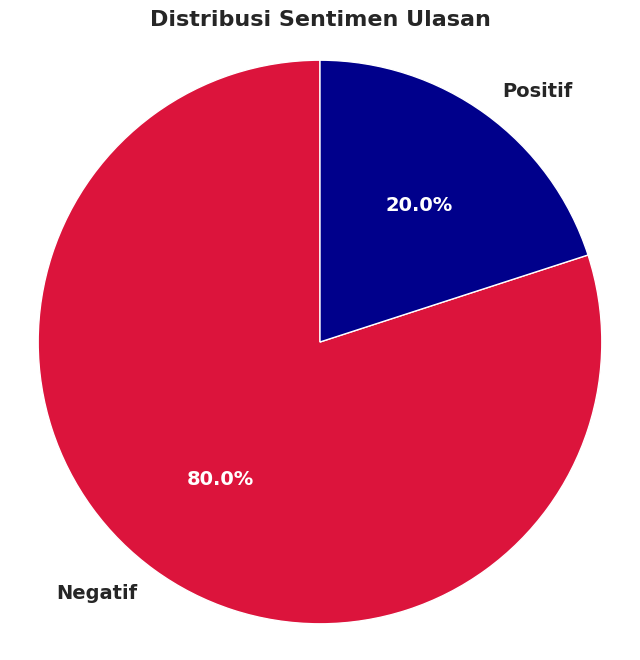

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data sentimen
labels = ["Negatif", "Positif"]
sizes = [12233, 1964]
colors = ["crimson", "darkblue"]  # Warna merah tua untuk negatif, biru tua untuk positif

# Set style seaborn
sns.set_theme(style="whitegrid")

# Buat pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct="%.1f%%", startangle=90, colors=colors,
    textprops={'fontsize': 14, 'weight': 'bold'})

# Mengatur warna teks agar lebih kontras
for text in autotexts:
    text.set_color("white")  # Ubah warna teks persen agar terlihat jelas

plt.title("Distribusi Sentimen Ulasan", fontsize=16, fontweight="bold")
plt.axis("equal")  # Membuat pie chart berbentuk lingkaran
plt.show()


In [ ]:
# Mengunduh data hasil text preprocessing
df_no_duplicate.to_csv(f"{folder_path}/reviews_simulation_cleaned.csv")

# Wordclouds dan N-Grams

In [ ]:
# Memuat library dan fungsi yang diperlukan
import string
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.util import ngrams
from collections import defaultdict, Counter
import re
import nltk
from nltk.corpus import stopwords
from itertools import islice

In [ ]:
df = pd.read_csv(f"{folder_path}/reviews_kai_cleaned2.csv")
print(df.head())

   Unnamed: 0           review  rating  sentiment_by_rating
0           0    jadwal lambat       1                    0
1           1       bantu guna       5                    1
2           2  aplikasi lambat       1                    0
3           3            jelek       1                    0
4           4        baik aneh       1                    0


In [ ]:
df['sentiment_by_rating'].value_counts()

sentiment_by_rating
0    12233
1     1964
Name: count, dtype: int64

In [ ]:
# Fungsi untuk menghilangkan imbuhan "nya" dari teks
def remove_nya(text):
    if isinstance(text, str):
        # Menghapus "nya" yang menyambung dengan kata dasar
        text = re.sub(r'\b(\w+)nya\b', r'\1', text)
        # Menghapus "nya" yang berdiri sendiri
        text = re.sub(r'\bnya\b', '', text)
    return text

# Memanggil fungsi penghilang imbuhan "nya" dari teks
df['review'] = df['review'].apply(remove_nya)

# Menampilkan hasil
print(df.head())

   Unnamed: 0           review  rating  sentiment_by_rating
0           0    jadwal lambat       1                    0
1           1       bantu guna       5                    1
2           2  aplikasi lambat       1                    0
3           3            jelek       1                    0
4           4        baik aneh       1                    0


In [ ]:
df.isna().sum()

Unnamed: 0             0
review                 0
rating                 0
sentiment_by_rating    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

review = df['review']
# Menghitung jumlah kata untuk setiap ulasan
word_counts = [len(doc.split()) for doc in review]

# Menampilkan statistik deskriptif jumlah kata
print("Statistik jumlah kata:")
print(pd.Series(word_counts).describe())

# Temukan review dengan jumlah kata maksimum
max_count = max(word_counts)
index_max = word_counts.index(max_count)
print("Jumlah kata maksimum:", max_count)
print("Review dengan jumlah kata maksimum:", review[index_max])


# Plot distribusi jumlah kata dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(word_counts, bins=30, kde=True, color='blue')
plt.title("Distribusi Jumlah Kata Sebelum Preprocessing", fontsize=16)
plt.xlabel("Jumlah Kata", fontsize=14)
plt.ylabel("Frekuensi", fontsize=14)
plt.show()


In [ ]:
# Pastikan tidak ada NaN dan ubah semua data ke string
df['review'] = df['review'].astype(str).fillna('')

# Membuat corpus untuk data secara keseluruhan
corpus = []
for x in df['review'].dropna().str.split():
    if isinstance(x, list):  # Pastikan x adalah list
        corpus.extend(x)

# Membuat corpus untuk sentimen positif
corpus_pos = []
for x in df[df['sentiment_by_rating'] == 1]['review'].dropna().str.split():
    if isinstance(x, list):
        corpus_pos.extend(x)

# Membuat corpus untuk sentimen negatif
corpus_neg = []
for x in df[df['sentiment_by_rating'] == 0]['review'].dropna().str.split():
    if isinstance(x, list):
        corpus_neg.extend(x)

# Cek hasil panjang corpus
print(f"Total kata dalam corpus: {len(corpus)}")
print(f"Total kata dalam corpus positif: {len(corpus_pos)}")
print(f"Total kata dalam corpus negatif: {len(corpus_neg)}")


Total kata dalam corpus: 138762
Total kata dalam corpus positif: 13515
Total kata dalam corpus negatif: 125247


In [ ]:
# Membuat corpus untuk menghitung jumlah tiap kata secara keseluruhan dan diurutkan
corpus = Counter(corpus).most_common()

# Membuat corpus untuk menghitung jumlah tiap kata sentimen positif dan diurutkan
corpus_pos = Counter(corpus_pos).most_common()

# Membuat corpus untuk menghitung jumlah tiap kata sentimen negatif dan diurutkan
corpus_neg = Counter(corpus_neg).most_common()

In [ ]:
# Melihat jumlah kata unik pada data secara keseluruhan
print(f"jumlah kata unik keseluruhan data : {len(corpus)}")

# Melihat jumlah kata unik pada data sentimen positif
print(f"jumlah kata unik sentimen positif : {len(corpus_pos)}")

# Melihat jumlah kata unik pada data sentimen positif
print(f"jumlah kata unik sentimen negatif : {len(corpus_neg)}")

jumlah kata unik keseluruhan data : 7785
jumlah kata unik sentimen positif : 2079
jumlah kata unik sentimen negatif : 7110


In [ ]:
# Melihat top 5 kata paling umum pada ulasan positif
corpus_pos[:5]

[('aplikasi', 525),
 ('tiket', 491),
 ('kai', 422),
 ('mudah', 305),
 ('kereta', 282)]

In [ ]:
# Melihat top 5 kata paling umum pada ulasan negatif
corpus_neg[:5]

[('aplikasi', 6979),
 ('tiket', 5342),
 ('masuk', 2626),
 ('bayar', 2482),
 ('kai', 2175)]

In [ ]:
# Mendefinisikan tabel untuk menyimpan data ulasan tiap kelas sentimen
df_pos = df[df['sentiment_by_rating'] == 1]  # Positif
df_neg = df[df['sentiment_by_rating'] == 0]  # Negatif

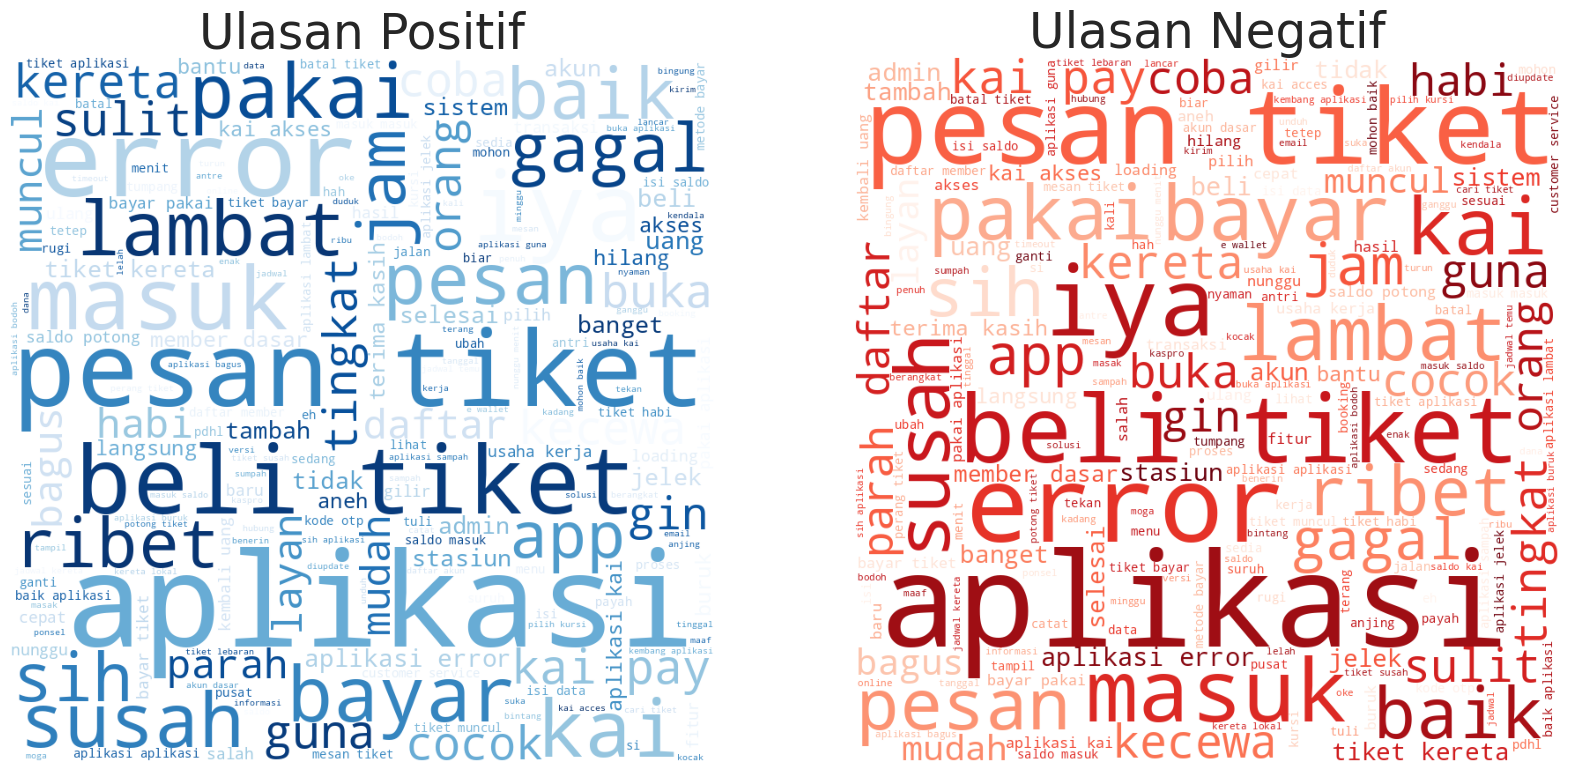

In [ ]:
df_sent = []
# Plot Word Clouds
fig, axes = plt.subplots(1, 2, figsize=(20, 15))
stopwords = set(STOPWORDS)

for ax, df_sent, title, colormap in zip(
    axes,
    [df_pos, df_neg],
    ['Ulasan Positif', 'Ulasan Negatif'],
    ['Blues', 'Reds']
):
    # Gabungkan semua teks dalam kategori tersebut
    comment_words = ' '.join(df['review'].astype(str).str.lower())

    # Cek apakah teks tersedia (tidak kosong)
    if comment_words.strip():
        wordcloud = WordCloud(
            width=800, height=800, background_color='white',
            colormap=colormap, stopwords=stopwords, min_font_size=10
        ).generate(comment_words)

        ax.imshow(wordcloud)
    else:
        ax.text(0.5, 0.5, "Tidak ada cukup data", fontsize=30, ha='center', va='center')

    ax.axis('off')
    ax.set_title(title, fontsize=35)

plt.show()


In [ ]:
# Pastikan sebelum tokenisasi, perbaiki teks dengan mengganti kata yang salah
def correct_text(text):
    corrections = {
        "tingi up": "menambahkan",
        "aces": "akses"
    }
    for wrong, correct in corrections.items():
        text = text.replace(wrong, correct)
    return text

# Terapkan fungsi ini ke kolom teks sebelum melakukan n-grams
df['clean_text'] = df['review'].apply(correct_text)


In [ ]:
# Pastikan semua review adalah string dan tidak ada NaN
df['review'] = df['review'].astype(str).fillna('')

# Fungsi untuk menghasilkan N-Gram tanpa stopwords filtering
def generate_ngrams(text, n_gram=1):
    tokens = text.lower().split()  # Tidak melakukan filter stopwords
    ngrams = zip(*[tokens[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [ ]:
from collections import defaultdict
from nltk.corpus import stopwords

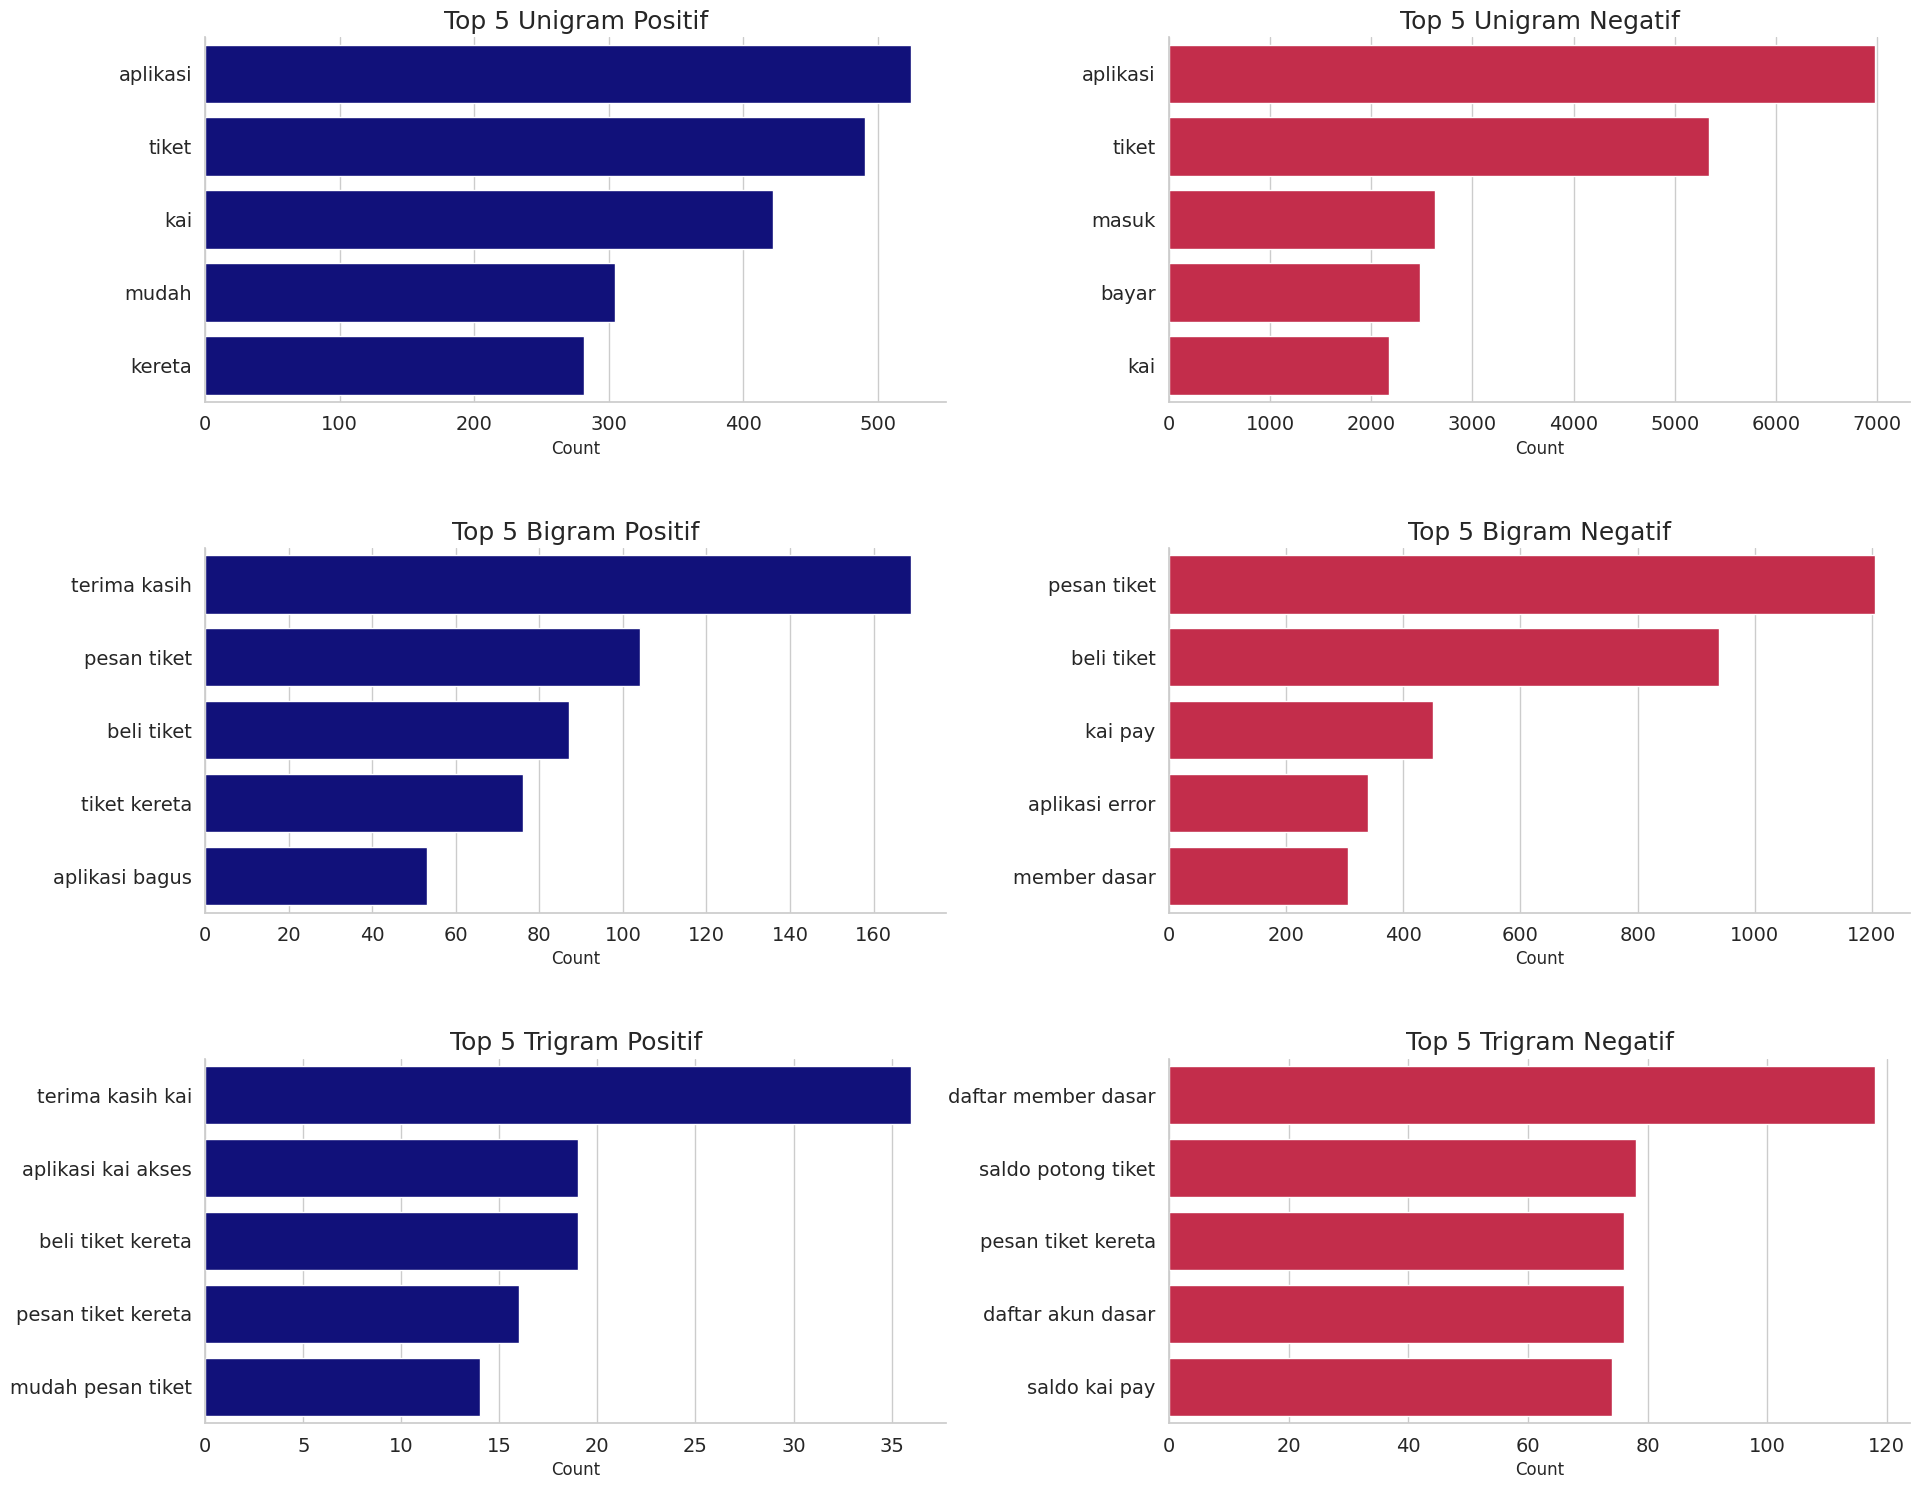

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Jumlah N-Gram yang akan dianalisis
N = 5

# Filter DataFrame berdasarkan sentimen
positive_reviews = df.loc[df['sentiment_by_rating'] == 1, 'review']
negative_reviews = df.loc[df['sentiment_by_rating'] == 0, 'review']

# Dictionary untuk menyimpan frekuensi N-Gram
ngram_types = ['unigrams', 'bigrams', 'trigrams']
positive_ngrams = {ngram: defaultdict(int) for ngram in ngram_types}
negative_ngrams = {ngram: defaultdict(int) for ngram in ngram_types}

# Fungsi untuk menghitung n-gram
def count_ngrams(reviews, ngrams_dict):
    for rev in reviews:
        for n in range(1, 4):  # Unigram, Bigram, Trigram
            for word in generate_ngrams(rev, n_gram=n):
                ngrams_dict[ngram_types[n-1]][word] += 1

# Hitung frekuensi n-gram untuk setiap sentimen
count_ngrams(positive_reviews, positive_ngrams)
count_ngrams(negative_reviews, negative_ngrams)

# Fungsi untuk membuat plot N-Gram
def plot_ngrams(title, data, color, ax):
    df_ngrams = pd.DataFrame(sorted(data.items(), key=lambda x: x[1], reverse=True), columns=['N-Gram', 'Count'])
    sns.barplot(y=df_ngrams['N-Gram'][:N], x=df_ngrams['Count'][:N], ax=ax, color=color)
    ax.set_title(title, fontsize=18)
    ax.set_ylabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

# Membuat plot untuk Unigram, Bigram, dan Trigram
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(22, 18), dpi=100)  # Ukuran lebih besar
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Mengatur jarak antar subplot

plot_ngrams(f'Top {N} Unigram Positif', positive_ngrams['unigrams'], 'darkblue', axes[0, 0])
plot_ngrams(f'Top {N} Unigram Negatif', negative_ngrams['unigrams'], 'crimson', axes[0, 1])

plot_ngrams(f'Top {N} Bigram Positif', positive_ngrams['bigrams'], 'darkblue', axes[1, 0])
plot_ngrams(f'Top {N} Bigram Negatif', negative_ngrams['bigrams'], 'crimson', axes[1, 1])

plot_ngrams(f'Top {N} Trigram Positif', positive_ngrams['trigrams'], 'darkblue', axes[2, 0])
plot_ngrams(f'Top {N} Trigram Negatif', negative_ngrams['trigrams'], 'crimson', axes[2, 1])

plt.show()


In [ ]:
df['sentiment_by_rating'].value_counts()

sentiment_by_rating
0    12233
1     1964
Name: count, dtype: int64

<ipython-input-58-566340024ec6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Sentimen', y='Jumlah', data=df, palette=['#1f77b4', '#d62728'])  # Warna bold: biru & merah


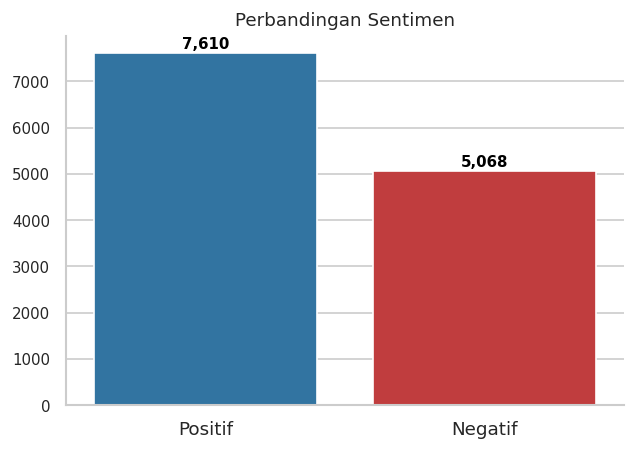

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Menyiapkan data
data = {'Sentimen': ['Positif', 'Negatif'],
        'Jumlah': [7610, 5068]}
df = pd.DataFrame(data)

# Mengatur tema seaborn
sns.set_style("whitegrid")

# Membuat plot batang dengan warna yang lebih bold
plt.figure(figsize=(6, 4), dpi=120)
barplot = sns.barplot(x='Sentimen', y='Jumlah', data=df, palette=['#1f77b4', '#d62728'])  # Warna bold: biru & merah

# Menambahkan judul yang ringan dan tidak bold
plt.title('Perbandingan Sentimen', fontsize=11, fontweight='regular')

# Menghapus label sumbu X dan Y agar lebih bersih
plt.xlabel('')
plt.ylabel('')

# Mengatur ukuran font angka di sumbu Y lebih kecil
plt.tick_params(axis='y', labelsize=9)

# Menambahkan nilai di atas batang dengan ukuran kecil
for index, row in df.iterrows():
    plt.text(index, row['Jumlah'] + 100, f"{row['Jumlah']:,}",
             color='black', ha="center", fontsize=9, fontweight='bold')

# Menghapus garis tepi agar lebih minimalis
sns.despine()

# Menampilkan plot
plt.show()


# Pembentukan Model dengan Data Tidak Seimbang

In [3]:
#Mengimpor fungsi yang diperlukan
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv(f"{folder_path}/reviews_simulation_cleaned.csv")
print(df.head())

In [4]:
df = pd.read_csv(f"{folder_path}/reviews_kai_cleaned2.csv")
print(df.head())

   Unnamed: 0           review  rating  sentiment_by_rating
0           0    jadwal lambat       1                    0
1           1       bantu guna       5                    1
2           2  aplikasi lambat       1                    0
3           3            jelek       1                    0
4           4        baik aneh       1                    0


In [5]:
df.shape

(14197, 4)

Statistik jumlah kata:
count    14197.000000
mean         9.779672
std          7.993353
min          1.000000
25%          4.000000
50%          8.000000
75%         13.000000
max        118.000000
dtype: float64
Jumlah kata maksimum: 118
Review dengan jumlah kata maksimum: jam indonesia barat kantin niat buka puasa langsung layan pramuniaga dira laki laki ybs pesan menu sedia rames ayam blackpaper ayam bulgogi nasi goreng makan kuah odeng taekwan pesan ayam bulgogi iya bicara diangetin buka puasa tunggu kantin langsung bayar nunggu makan ambil pesan diangetin jam nyamperin diangetin sen ambil buka bingung direspon pramugari mbak mbak mbak maaf kakak pesan pesan bulgogi mbak mbak maaf kakak bulgogi habis selesai mbak pesan bayar mbak kakak pesan bayar bayar pakai qris mbak mohon maaf kakak habis ganti habis iya mbak sisip pesan bayar mbak iya maaf kakak iya darpada ganti ayam blackpaper aneh diam maaf pesan nunggu ujung habis tambah kondisi kantin kotor iya dibersihin meja meja saran 

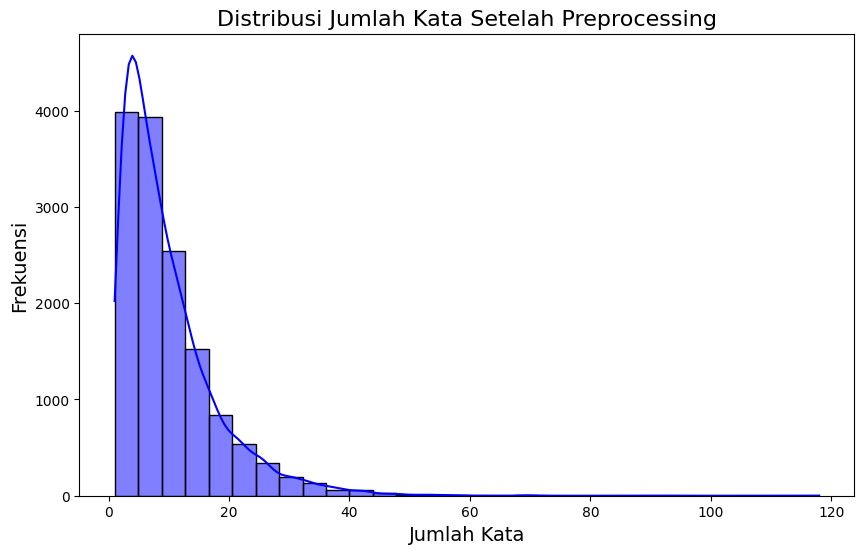

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

review = df['review']
# Menghitung jumlah kata untuk setiap ulasan
word_counts = [len(doc.split()) for doc in review]

# Menampilkan statistik deskriptif jumlah kata
print("Statistik jumlah kata:")
print(pd.Series(word_counts).describe())

# Temukan review dengan jumlah kata maksimum dan total semua kata dalam dataset
max_count = max(word_counts)
index_max = word_counts.index(max_count)
total_words = np.sum(word_counts)
print("Jumlah kata maksimum:", max_count)
print("Review dengan jumlah kata maksimum:", review[index_max])
print(f"Total jumlah kata dalam dataset: {total_words}")

# Plot distribusi jumlah kata dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(word_counts, bins=30, kde=True, color='blue')
plt.title("Distribusi Jumlah Kata Setelah Preprocessing", fontsize=16)
plt.xlabel("Jumlah Kata", fontsize=14)
plt.ylabel("Frekuensi", fontsize=14)
plt.show()


In [7]:
import pandas as pd

# Menghitung jumlah kata per baris di kolom 'review'
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))

# Menampilkan statistik jumlah kata
max_words = df['word_count'].max()
min_words = df['word_count'].min()
mean_words = df['word_count'].mean()
std_words = df['word_count'].std()

# Menampilkan hasil
print(f"Jumlah kata terbanyak: {max_words}")
print(f"Jumlah kata tersedikit: {min_words}")
print(f"Rata-rata jumlah kata: {mean_words:.2f}")
print(f"Standar deviasi jumlah kata: {std_words:.2f}")


Jumlah kata terbanyak: 118
Jumlah kata tersedikit: 1
Rata-rata jumlah kata: 9.78
Standar deviasi jumlah kata: 7.99


count    14197.000000
mean         9.779672
std          7.993353
min          1.000000
25%          4.000000
50%          8.000000
75%         13.000000
max        118.000000
Name: word_count, dtype: float64


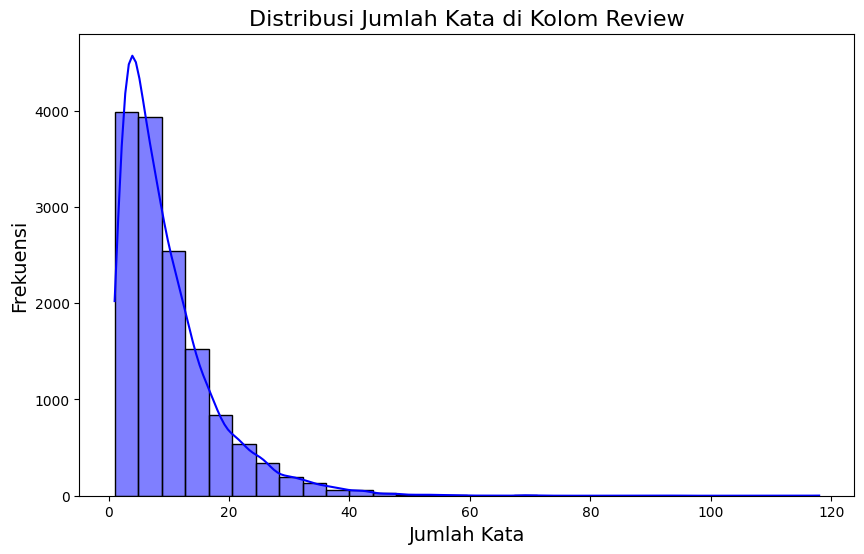

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan df sudah memiliki kolom 'review'
# Hitung jumlah kata per baris dan simpan di kolom baru 'word_count'
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))

# Tampilkan statistik deskriptif jumlah kata
print(df['word_count'].describe())

# Plot distribusi jumlah kata dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color='blue')
plt.title("Distribusi Jumlah Kata di Kolom Review", fontsize=16)
plt.xlabel("Jumlah Kata", fontsize=14)
plt.ylabel("Frekuensi", fontsize=14)
plt.show()


In [9]:
# Menampilkan semua isi baris tanpa dipotong
pd.set_option('display.max_colwidth', None)

# Menampilkan setelah proses cleaning
# Menampilkan 25 baris pertama dan 25 baris terakhir
df_display_ori = pd.concat([df.head(25), df.tail(25)])
df_display_ori

Unnamed: 0  \
0               0   
1               1   
2               2   
3               3   
4               4   
5               5   
6               6   
7               7   
8               8   
9               9   
10             10   
11             11   
12             12   
13             13   
14             14   
15             15   
16             16   
17             17   
18             18   
19             19   
20             20   
21             21   
22             22   
23             23   
24             24   
14172       14172   
14173       14173   
14174       14174   
14175       14175   
14176       14176   
14177       14177   
14178       14178   
14179       14179   
14180       14180   
14181       14181   
14182       14182   
14183       14183   
14184       14184   
14185       14185   
14186       14186   
14187       14187   
14188       14188   
14189       14189   
14190       14190   
14191       14191   
14192       14192   
14193       14193   
14194       14194   
14195       14195   
14196       14196   

                                                                                                                                                                                                                                                                      review  \
0                                                                                                                                                                                                                                                              jadwal lambat   
1                                                                                                                                                                                                                                                                 bantu guna   
2                                                                                                                                                                                                                                                            aplikasi lambat   
3                                                                                                                                                                                                                                                                      jelek   
4                                                                                                                                                                                                                                                                  baik aneh   
5                                                                                                                                                                                                                                                            iya pilih kursi   
6                                                                                                                                                                                                                                       baik aplikasi masuk aplikasi tanggap   
7                                                                                                                                                                                                                                               aplikasi buruk loading parah   
8                                                                                                                                                                                                                             parah beli tiket saldo potong tiket mesan typo   
9                                                                                                                                  ubah jadwal kereta tolong tidak susah minggu lambat kereta commuter harga ekonomis e

In [10]:
#Memeriksa dimensi data awal
df.shape

(14197, 5)

In [11]:
#Mengimpor fungsi yang diperlukan
from sklearn.model_selection import train_test_split
#Memeriksa dimensi data awal
df.shape
#Mengambil kolom ulasan sebagai variabel X
X = df.loc[:, ['review']]
#Mengambil kolom sentimen sebagai variabel X
Y = df.loc[:, ['sentiment_by_rating']]

In [12]:
df.dtypes

Unnamed: 0              int64
review                 object
rating                  int64
sentiment_by_rating     int64
word_count              int64
dtype: object

In [13]:
#Melakukan pembagian data latih dan data uji dengan proporsi 80:20
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state=0, train_size = .80)

In [14]:
#Memeriksa dimensi data latih dan data uji
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(11357, 1) (2840, 1) (11357, 1) (2840, 1)


<ipython-input-15-ce6539d71393>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g_train = sns.catplot(
<ipython-input-15-ce6539d71393>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g_test = sns.catplot(


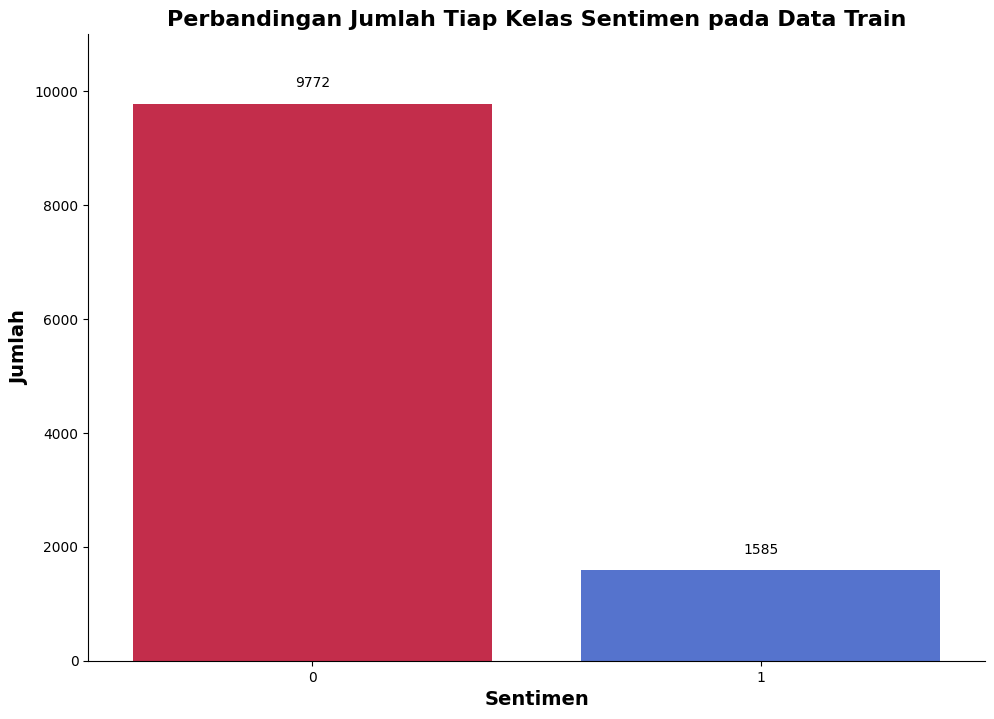

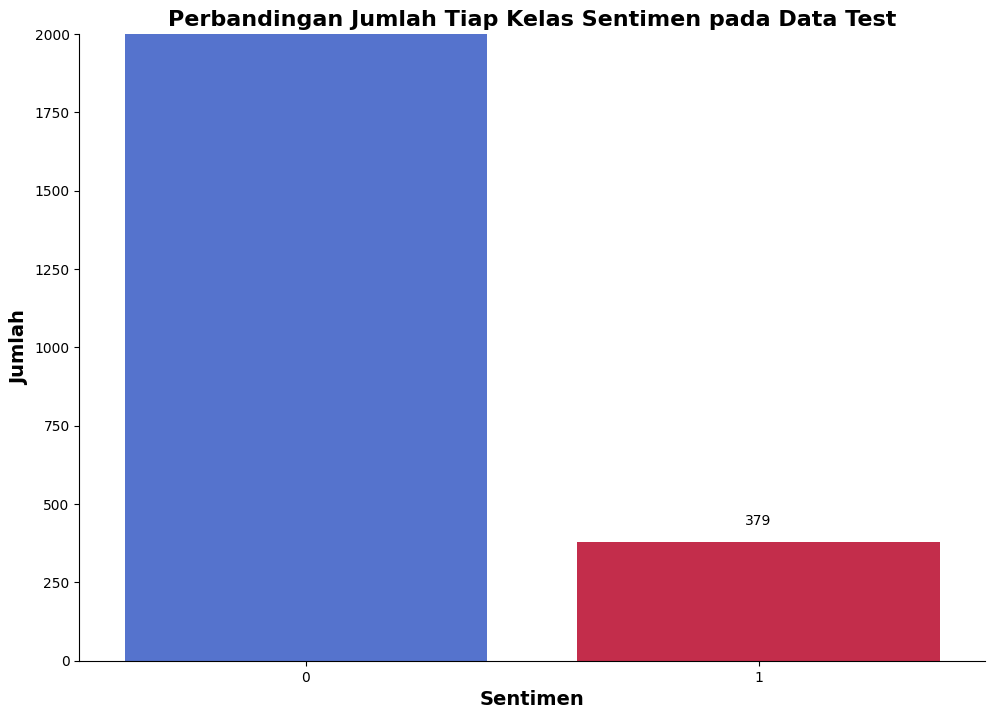

In [15]:
import seaborn as sns

# Plot untuk data train
g_train = sns.catplot(
    x="sentiment_by_rating", kind="count", data=train_Y,
    palette=['crimson', 'royalblue'], height=7, aspect=10/7
)
g_train.ax.set_title("Perbandingan Jumlah Tiap Kelas Sentimen pada Data Train",
                     fontweight="bold", fontsize=16)
g_train.ax.set_xlabel("Sentimen", fontweight="bold", fontsize=14)
g_train.ax.set_ylabel("Jumlah", fontweight="bold", fontsize=14)

# 1) Atur batas atas sumbu Y lebih tinggi (misalnya 11000 agar batang setinggi ~9772 tidak menempel)
g_train.ax.set_ylim(top=11000)

# 2) Tambahkan padding untuk memberi jarak label dari batang
for container in g_train.ax.containers:
    g_train.ax.bar_label(container, fmt='%d', label_type='edge', padding=10)

# Plot untuk data test
g_test = sns.catplot(
    x="sentiment_by_rating", kind="count", data=test_Y,
    palette=['royalblue', 'crimson'], height=7, aspect=10/7
)
g_test.ax.set_title("Perbandingan Jumlah Tiap Kelas Sentimen pada Data Test",
                    fontweight="bold", fontsize=16)
g_test.ax.set_xlabel("Sentimen", fontweight="bold", fontsize=14)
g_test.ax.set_ylabel("Jumlah", fontweight="bold", fontsize=14)

# Misalkan jumlah maksimum data test lebih kecil, atur secukupnya
g_test.ax.set_ylim(top=2000)  # Contoh penyesuaian
for container in g_test.ax.containers:
    g_test.ax.bar_label(container, fmt='%d', label_type='edge', padding=10)


# Feature Extraction

In [16]:
import plotly.express as px
import pandas as pd

# Menghitung jumlah kata setiap ulasan
df['review_len'] = df['review'].str.split().map(len)

# Membuat histogram interaktif dengan Plotly
fig = px.histogram(df, x='review_len', nbins=30, color_discrete_sequence=['royalblue'])

# Mengatur tampilan plot
fig.update_layout(
    title="Histogram Jumlah Kata dalam Ulasan",
    xaxis_title="Jumlah Kata",
    yaxis_title="Frekuensi",
    template="plotly_white"
)

# Menampilkan plot interaktif
fig.show()


## Tokenisasi

In [17]:
import tensorflow

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import codecs
from tqdm import tqdm

In [19]:
train_X['review']

5030                                                                                                                                       jalan
13753    masuk data terima otp entry otp digit anggap invalid otp entry kerja tim tampil cx kerja aplikasi tidur kallee ngebaca komen guna jelek
5488                        baharu otomatis tanggal juli ecek jadwal kereta tulis jadwal temu otomatis catat catat pakai ponsel email gagal data
10513                                                            boking tiket lancar cocok bayar error saldo kluar jaring internet bagus hem kai
4659                                                                            baharu tampil dar lihat berangkat krl ribet jadwal kereta hilang
                                                                          ...                                                                   
13123                                                                               beli tiket kereta daftar member dasar daftar gagal kirim otp
3264                                                                                                                          unduh aplikasi kai
9845                                                                                  error pesan tiket saldo potong etiket payah aplikasi error
10799                   hiks kecewa aplikasi baru gadang tiket lebaran error tanggal ujung habis lalh perang error oasti jadwal tera tiket habis
2732                                                                                                  h menit habis iya warga serempak tuju aneh
Name: review, Length: 11357, dtype: object

In [20]:
test_X['review']

3471                                                                                                     masuk jangann downloadd
9078                                                                                                   install buka aplikasi iya
4678                                                                                     masuk iya pdahal email gin smenjak baru
11764                                                                                   aplikasi sampah jadwal kereta didownload
4064                                                            mantap pergi mudah susah beli tiket kakak jadwal berangkat kakak
                                                                  ...                                                           
7471     catat daftar smartphone xiaomi redmi buffering henti coba kali smartphone merk contoh samsung realme langsung benah kai
13582                                                                                                   lihat riwayat beli akses
12047                              akses cari jadwal kereta lambat muncul jadwal kereta lokal kota pusat lambat gegera mengkases
3849                                                                                                        mantab fitur lengkap
5750                                                                                                             pesan tiket lrt
Name: review, Length: 2840, dtype: object

In [21]:
#Mendefinisikan fungsi tokenisasi
tokenizer = RegexpTokenizer(r'\w+')

# Mengubah kolom ulasan menjadi list untuk diolah
train_docs_X = train_X['review'].tolist()
test_docs_X = test_X['review'].tolist()

#Mendefinisikan maksimum jumlah kata yang akan ditokenisasi
max_num_words = 1000

#Melakukan tokenisasi
tokenizer = Tokenizer(num_words=max_num_words,lower=True,char_level=False)
tokenizer.fit_on_texts(train_docs_X + test_docs_X)
word_seq_train = tokenizer.texts_to_sequences(train_docs_X)
word_seq_test = tokenizer.texts_to_sequences(test_docs_X)
word_index = tokenizer.word_index

<ipython-input-22-cf922af591be>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




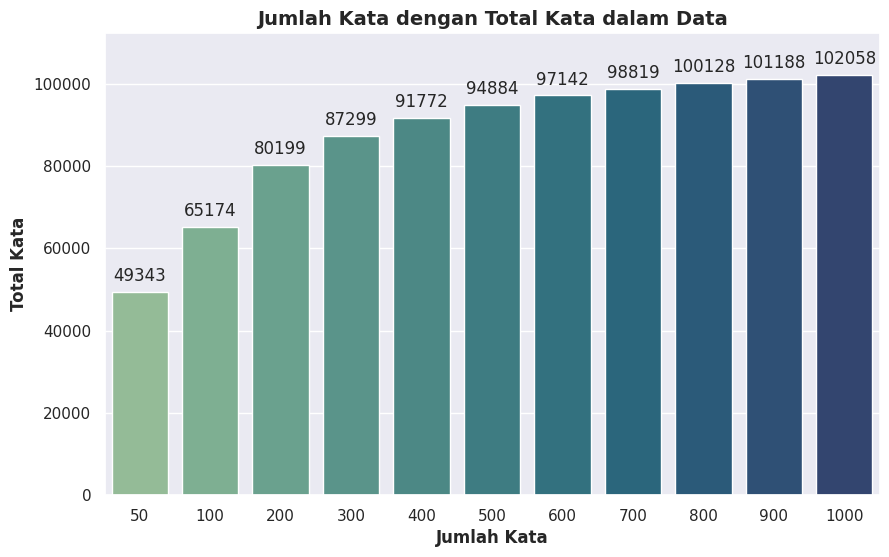

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat corpus untuk analisis kata
corpus = {}
for review in train_docs_X:
    for word in review.split():
        corpus[word] = corpus.get(word, 0) + 1
# Urutkan berdasar frekuensi
corpus = sorted(corpus.items(), key=lambda x: x[1], reverse=True)

words = [word for word, count in corpus]
word_counts = [count for word, count in corpus]

# Menghitung total kata untuk beberapa nilai 'num'
x_vals = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
sum_words = [sum(word_counts[:num]) for num in x_vals]

# Mengatur tema dan ukuran gambar dengan Seaborn
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(10,6)})

# Membuat palet gradasi biru dengan jumlah warna sesuai jumlah batang
colors = sns.color_palette("crest", n_colors=len(x_vals))

# Membuat barplot
ax = sns.barplot(x=x_vals, y=sum_words, palette=colors)

# Menambahkan label di atas tiap batang
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5)
    ax.set_ylim(top=1.1 * max(sum_words))


# Menambahkan judul dan label sumbu (bold)
ax.set_title("Jumlah Kata dengan Total Kata dalam Data", fontweight="bold", fontsize=14)
ax.set_xlabel("Jumlah Kata", fontweight="bold", fontsize=12)
ax.set_ylabel("Total Kata", fontweight="bold", fontsize=12)

plt.show()


<ipython-input-23-c0c2192a08ae>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




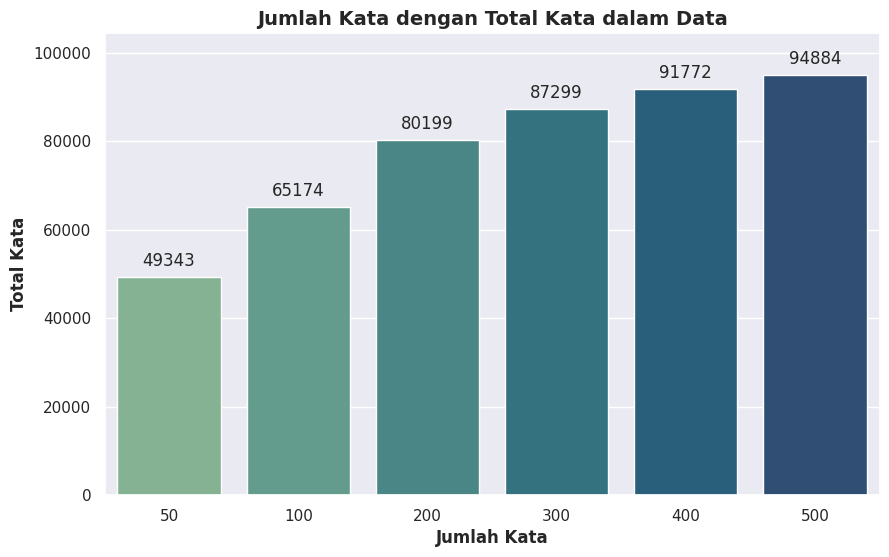

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat corpus untuk analisis kata
corpus = {}
for review in train_docs_X:
    for word in review.split():
        corpus[word] = corpus.get(word, 0) + 1
# Urutkan berdasar frekuensi
corpus = sorted(corpus.items(), key=lambda x: x[1], reverse=True)

words = [word for word, count in corpus]
word_counts = [count for word, count in corpus]

# Menghitung total kata untuk beberapa nilai 'num'
x_vals = [50, 100, 200, 300, 400, 500]
sum_words = [sum(word_counts[:num]) for num in x_vals]

# Mengatur tema dan ukuran gambar dengan Seaborn
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(10,6)})

# Membuat palet gradasi biru dengan jumlah warna sesuai jumlah batang
colors = sns.color_palette("crest", n_colors=len(x_vals))

# Membuat barplot
ax = sns.barplot(x=x_vals, y=sum_words, palette=colors)

# Menambahkan label di atas tiap batang
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5)
    ax.set_ylim(top=1.1 * max(sum_words))


# Menambahkan judul dan label sumbu (bold)
ax.set_title("Jumlah Kata dengan Total Kata dalam Data", fontweight="bold", fontsize=14)
ax.set_xlabel("Jumlah Kata", fontweight="bold", fontsize=12)
ax.set_ylabel("Total Kata", fontweight="bold", fontsize=12)

plt.show()


In [24]:
# Menampilkan beberapa hasil tokenisasi untuk train set
print("Contoh hasil tokenisasi pada train set:")
for i in range(5):  # Menampilkan 5 contoh pertama
    print(f"Ulasan ke-{i+1}: {train_docs_X[i]}")
    print(f"Tokenisasi: {word_seq_train[i]}\n")

# Menampilkan beberapa hasil tokenisasi untuk test set
print("Contoh hasil tokenisasi pada test set:")
for i in range(5):  # Menampilkan 5 contoh pertama
    print(f"Ulasan ke-{i+1}: {test_docs_X[i]}")
    print(f"Tokenisasi: {word_seq_test[i]}\n")

# Menampilkan beberapa kata beserta indeksnya
print("Contoh indeks kata dalam tokenizer:")
for word, index in list(word_index.items())[:10]:  # Menampilkan 10 kata pertama
    print(f"Kata: {word}, Index: {index}")


Contoh hasil tokenisasi pada train set:
Ulasan ke-1: jalan
Tokenisasi: [100]

Ulasan ke-2: masuk data terima otp entry otp digit anggap invalid otp entry kerja tim tampil cx kerja aplikasi tidur kallee ngebaca komen guna jelek
Tokenisasi: [3, 37, 81, 51, 51, 745, 664, 51, 38, 476, 142, 38, 1, 477, 870, 33, 32]

Ulasan ke-3: baharu otomatis tanggal juli ecek jadwal kereta tulis jadwal temu otomatis catat catat pakai ponsel email gagal data
Tokenisasi: [270, 316, 139, 832, 18, 12, 98, 18, 134, 316, 132, 132, 8, 74, 71, 24, 37]

Ulasan ke-4: boking tiket lancar cocok bayar error saldo kluar jaring internet bagus hem kai
Tokenisasi: [469, 2, 124, 19, 4, 7, 10, 712, 135, 155, 30, 5]

Ulasan ke-5: baharu tampil dar lihat berangkat krl ribet jadwal kereta hilang
Tokenisasi: [270, 142, 578, 67, 109, 195, 40, 18, 12, 73]

Contoh hasil tokenisasi pada test set:
Ulasan ke-1: masuk jangann downloadd
Tokenisasi: [3]

Ulasan ke-2: install buka aplikasi iya
Tokenisasi: [273, 36, 1, 14]

Ulasan ke-3: 

In [ ]:
# Menampilkan beberapa kata beserta indeksnya
print("Contoh indeks kata dalam tokenizer:")
for word, index in list(word_index.items())[:10]:  # Menampilkan 10 kata pertama
    print(f"Kata: {word}, Index: {index}")

Contoh indeks kata dalam tokenizer:
Kata: aplikasi, Index: 1
Kata: tiket, Index: 2
Kata: masuk, Index: 3
Kata: bayar, Index: 4
Kata: kai, Index: 5
Kata: pesan, Index: 6
Kata: error, Index: 7
Kata: pakai, Index: 8
Kata: beli, Index: 9
Kata: saldo, Index: 10


Statistik jumlah kata:
count    11357.000000
mean         9.875231
std          8.127822
min          1.000000
25%          4.000000
50%          8.000000
75%         13.000000
max        118.000000
dtype: float64
Jumlah kata maksimum: 118
Review dengan jumlah kata maksimum: jam indonesia barat kantin niat buka puasa langsung layan pramuniaga dira laki laki ybs pesan menu sedia rames ayam blackpaper ayam bulgogi nasi goreng makan kuah odeng taekwan pesan ayam bulgogi iya bicara diangetin buka puasa tunggu kantin langsung bayar nunggu makan ambil pesan diangetin jam nyamperin diangetin sen ambil buka bingung direspon pramugari mbak mbak mbak maaf kakak pesan pesan bulgogi mbak mbak maaf kakak bulgogi habis selesai mbak pesan bayar mbak kakak pesan bayar bayar pakai qris mbak mohon maaf kakak habis ganti habis iya mbak sisip pesan bayar mbak iya maaf kakak iya darpada ganti ayam blackpaper aneh diam maaf pesan nunggu ujung habis tambah kondisi kantin kotor iya dibersihin meja meja saran 

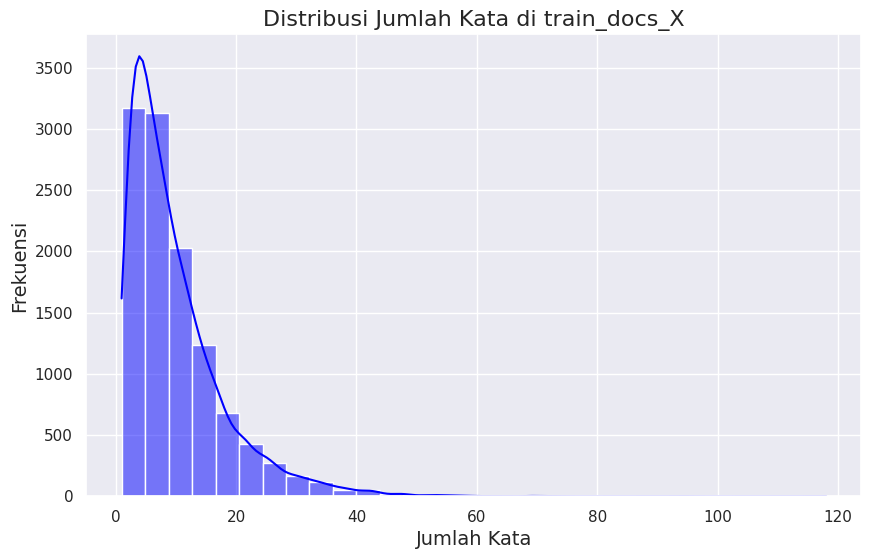

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Menghitung jumlah kata untuk setiap ulasan
word_counts = [len(doc.split()) for doc in train_docs_X]

# Menampilkan statistik deskriptif jumlah kata
print("Statistik jumlah kata:")
print(pd.Series(word_counts).describe())

# Temukan review dengan jumlah kata maksimum
max_count = max(word_counts)
index_max = word_counts.index(max_count)
print("Jumlah kata maksimum:", max_count)
print("Review dengan jumlah kata maksimum:", train_docs_X[index_max])


# Plot distribusi jumlah kata dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(word_counts, bins=30, kde=True, color='blue')
plt.title("Distribusi Jumlah Kata di train_docs_X", fontsize=16)
plt.xlabel("Jumlah Kata", fontsize=14)
plt.ylabel("Frekuensi", fontsize=14)
plt.show()


## Padding Sequences

In [25]:
# Padding sequences
from keras.preprocessing.sequence import pad_sequences

In [26]:
# Melakukan padding dengan mode 'post'
maxlen=40
word_seq_train = pad_sequences(word_seq_train, maxlen=maxlen, padding='post')
word_seq_test = pad_sequences(word_seq_test, maxlen=maxlen, padding='post')

In [ ]:
# Menampilkan beberapa hasil padding untuk train set
print("Contoh hasil padding pada train set:")
for i in range(5):  # Menampilkan 5 contoh pertama
    print(f"Ulasan ke-{i+1}: {train_docs_X[i]}")
    print(f"Tokenisasi: {word_seq_train[i]}\n")

# Menampilkan beberapa hasil padding untuk test set
print("Contoh hasil padding pada test set:")
for i in range(5):  # Menampilkan 5 contoh pertama
    print(f"Ulasan ke-{i+1}: {test_docs_X[i]}")
    print(f"Tokenisasi: {word_seq_test[i]}\n")


Contoh hasil padding pada train set:
Ulasan ke-1: jalan
Tokenisasi: [100   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]

Ulasan ke-2: masuk data terima otp entry otp digit anggap invalid otp entry kerja tim tampil cx kerja aplikasi tidur kallee ngebaca komen guna jelek
Tokenisasi: [  3  37  81  51  51 745 664  51  38 476 142  38   1 477 870  33  32   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]

Ulasan ke-3: baharu otomatis tanggal juli ecek jadwal kereta tulis jadwal temu otomatis catat catat pakai ponsel email gagal data
Tokenisasi: [270 316 139 832  18  12  98  18 134 316 132 132   8  74  71  24  37   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]

Ulasan ke-4: boking tiket lancar cocok bayar error saldo kluar jaring internet bagus hem kai
Tokenisasi: [469   2 124  19   4   7  10 

## FastText Word Embedding

In [27]:
# Memuat vector untuk FastText Word Embedding
embeddings_index = {}

In [28]:
f = codecs.open(f"{folder_path}/cc.id.300.vec",
encoding='utf-8')

In [29]:
for line in tqdm(f):
 values = line.rstrip().rsplit(' ')
 word = values[0]
 coefs = np.asarray(values[1:], dtype='float32')
 embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

2000001it [04:44, 7039.27it/s] 

found 2000000 word vectors


In [30]:
# Membuat matrix untuk pembobotan tiap kata menggunakan FastText
nb_words = 1000

In [31]:
# Untuk dimensi vektor representasi kata 200
words_not_found2 = []
embed_dim = 200
embedding_matrix2 = np.zeros((nb_words, embed_dim))

for word, i in word_index.items():
  if i >= nb_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if (embedding_vector is not None) and len(embedding_vector) > 0:
    # Words not found in embedding index will be all-zeros.
    embedding_matrix2[i] = embedding_vector[:embed_dim]
  else:
    words_not_found2.append(word)

print('number of null word embeddings: %d' %np.sum(np.sum(embedding_matrix2, axis=1) == 0))

number of null word embeddings: 19


In [32]:
# Untuk dimensi vektor representasi kata 300
words_not_found3 = []
embed_dim = 300
embedding_matrix3 = np.zeros((nb_words, embed_dim))

for word, i in word_index.items():
  if i >= nb_words:
    continue
    embedding_vector = embeddings_index.get(word)
  if (embedding_vector is not None) and len(embedding_vector) > 0:
    # Words not found in embedding index will be all-zeros.
    embedding_matrix3[i] = embedding_vector[:embed_dim]
  else:
    words_not_found3.append(word)

print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix3, axis=1) == 0))

number of null word embeddings: 1


In [33]:
print("Max index in word_seq_train:", np.max(word_seq_train))
print("Max index in word_seq_test:", np.max(word_seq_test))


Max index in word_seq_train: 999
Max index in word_seq_test: 999


In [34]:
vocab_len = len(tokenizer.word_index) + 1 # Karena indeks dimulai dari 1
vocab_len

7787

In [ ]:
# Menampilkan hasil FastText Embedding
print("\n--- Hasil FastText Embedding ---")
print("Shape embedding_matrix2 (200 dim):", embedding_matrix2.shape)
print("Shape embedding_matrix3 (300 dim):", embedding_matrix3.shape)

# Menampilkan contoh embedding untuk 5 kata pertama dari word_index
print("\nContoh embedding (200 dim) untuk 5 kata pertama:")
for word, i in list(word_index.items())[5:16]:
    print(f"{word} (index {i}): {embedding_matrix2[i]}")

print("\nContoh embedding (300 dim) untuk 5 kata pertama:")
for word, i in list(word_index.items())[5:16]:
    print(f"{word} (index {i}): {embedding_matrix3[i]}")


--- Hasil FastText Embedding ---
Shape embedding_matrix2 (200 dim): (1000, 200)
Shape embedding_matrix3 (300 dim): (1000, 300)

Contoh embedding (200 dim) untuk 5 kata pertama:
pesan (index 6): [ 3.59999994e-03 -4.87999991e-02 -5.35000004e-02  1.09200001e-01
 -4.23000008e-02 -3.53000015e-02 -1.03600003e-01  2.70000007e-03
  1.20000006e-03 -1.30899996e-01  4.49000001e-02 -3.31999995e-02
 -9.92000028e-02  3.79999988e-02 -6.36000037e-02 -2.70000007e-03
  1.19300000e-01  7.40000000e-03  1.30000003e-02  1.15199998e-01
 -3.00999992e-02  3.31000015e-02 -2.96999998e-02  1.97000001e-02
  7.89999962e-03 -4.25999984e-02  4.45000008e-02  7.69999996e-03
  5.84999993e-02 -1.81000009e-02  6.85999990e-02 -1.85000002e-02
  6.93000033e-02 -9.49999969e-03 -5.49000017e-02 -2.95000002e-02
  9.89999995e-03 -1.42999999e-02 -8.29999987e-03  8.20000004e-03
  3.24999988e-02  7.73999989e-02  2.11999994e-02 -1.24000004e-02
 -4.45000008e-02 -1.53999999e-02  5.90000022e-03 -5.29000014e-02
  7.16999993e-02 -7.15999

# Pemodelan Neural Network (RNN)

In [35]:
#Memuat beberapa library dan fungsi yang diperlukan
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Reshape, Dense, GRU, Embedding, LSTM, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping

## RNN Untuk parameter output dim 200

In [ ]:
# Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_rnn1 = []
pred_train_rnn1 = []
eval_test_rnn1 = []

# Melakukan iterasi untuk pemodelan RNN dengan dimensi output 200
for num in [16, 32,64,128]:
  model_rnn1 = Sequential()
  model_rnn1.add(Embedding(input_dim=500, output_dim=200,weights=[embedding_matrix2], input_length=40))
  model_rnn1.add(SimpleRNN(num))
  model_rnn1.add(Dense(1, activation='sigmoid'))
  model_rnn1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
  callbacks_list = [es]

  hist_rnn1 = model_rnn1.fit(word_seq_train, train_Y, batch_size=256, epochs=10, callbacks=callbacks_list, validation_data=(word_seq_test, test_Y), shuffle=True, verbose=1)

  yhat_rnn1 = model_rnn1.predict(word_seq_test, batch_size = 256)
  pred_train1 = model_rnn1.predict(word_seq_train, batch_size = 256)
  metrics_rnn1 = [
    accuracy_score(test_Y, np.round(yhat_rnn1, 0)),
    f1_score(test_Y, np.round(yhat_rnn1, 0), average="macro"),  # Menggunakan average="macro"
    f1_score(test_Y, np.round(yhat_rnn1, 0), average="weighted")  # Menggunakan average="weighted"
    ]

  pred_train_rnn1.append(pred_train1)
  pred_test_rnn1.append(yhat_rnn1)
  eval_test_rnn1.append(metrics_rnn1)

# Melihat hasil performa klasifikasi
eval_test_rnn1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.7643 - loss: 0.5396 - val_accuracy: 0.8960 - val_loss: 0.3154
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8969 - loss: 0.2947 - val_accuracy: 0.9116 - val_loss: 0.2511
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9164 - loss: 0.2453 - val_accuracy: 0.9232 - val_loss: 0.2299
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9230 - loss: 0.2242 - val_accuracy: 0.9217 - val_loss: 0.2242
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9317 - loss: 0.2035 - val_accuracy: 0.9242 - val_loss: 0.2285
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9308 - loss: 0.2053 - val_accuracy: 0.9242 - val_loss: 0.2253
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9313 - loss: 0.1968 - val_accuracy: 0.9273 - val_loss: 0.2245
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9376 - loss: 0.1903 - val_accuracy: 0.9257 - v

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.7873 - loss: 0.4943 - val_accuracy: 0.9038 - val_loss: 0.2894
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8986 - loss: 0.2769 - val_accuracy: 0.9154 - val_loss: 0.2399
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9228 - loss: 0.2239 - val_accuracy: 0.9141 - val_loss: 0.2338
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.9257 - loss: 0.2095 - val_accuracy: 0.9148 - val_loss: 0.2250
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9305 - loss: 0.1966 - val_accuracy: 0.9173 - val_loss: 0.2332
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9353 - loss: 0.1875 - val_accuracy: 0.9251 - val_loss: 0.2266
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9407 - loss: 0.1780 - val_accuracy: 0.9264 - val_loss: 0.2289
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9417 - loss: 0.1676 - val_accuracy: 0.9207 - val_loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.8066 - loss: 0.4476 - val_accuracy: 0.9126 - val_loss: 0.2576
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9122 - loss: 0.2502 - val_accuracy: 0.9176 - val_loss: 0.2383
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9208 - loss: 0.2263 - val_accuracy: 0.9254 - val_loss: 0.2228
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.9310 - loss: 0.2052 - val_accuracy: 0.9213 - val_loss: 0.2305
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.9339 - loss: 0.1959 - val_accuracy: 0.9148 - val_loss: 0.2373
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9354 - loss: 0.1835 - val_accuracy: 0.9151 - val_loss: 0.2384
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9407 - loss: 0.1723 - val_accuracy: 0.9148 - val_loss: 0.2541
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9469 - loss: 0.1528 - val_accuracy: 0.9094 - val_loss: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.7844 - loss: 0.4493 - val_accuracy: 0.9104 - val_loss: 0.2654
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.9084 - loss: 0.2547 - val_accuracy: 0.9082 - val_loss: 0.2418
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9186 - loss: 0.2299 - val_accuracy: 0.9188 - val_loss: 0.2248
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.9232 - loss: 0.2145 - val_accuracy: 0.9151 - val_loss: 0.2381
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.9320 - loss: 0.1960 - val_accuracy: 0.9223 - val_loss: 0.2323
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9379 - loss: 0.1744 - val_accuracy: 0.9204 - val_loss: 0.2457
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.9473 - loss: 0.1525 - val_accuracy: 0.9248 - val_loss: 0.2500
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.9488 - loss: 0.1444 - val_accuracy: 0.9173 - val

[[0.9235349420244438, 0.859199339148097, 0.9218646621166666],
 [0.921027890943278, 0.8561489451223177, 0.9197563483746917],
 [0.9116264493889062, 0.8400033711125525, 0.9104858476739668],
 [0.9138201190849263, 0.843379682702524, 0.9125363915059947]]

## Untuk parameter output dim 300

In [ ]:
#Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_rnn2 = []
pred_train_rnn2 = []
eval_test_rnn2 = []
#Melakukan iterasi untuk pemodelan RNN dengan dimensi output 300
for num in [16, 32,64,128]:
  model_rnn2 = Sequential()
  model_rnn2.add(Embedding(input_dim=500, output_dim=300, weights=[embedding_matrix3], input_length=maxlen))
  model_rnn2.add(SimpleRNN(num))
  model_rnn2.add(Dense(1, activation='sigmoid'))
  model_rnn2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
  callbacks_list = [es]

  hist_rnn2 = model_rnn2.fit(word_seq_train, train_Y, batch_size=256, epochs=10, callbacks=callbacks_list,
  validation_data=(word_seq_test, test_Y), shuffle=True, verbose=1)

  yhat_rnn2 = model_rnn2.predict(word_seq_test, batch_size = 256)
  pred_train2 = model_rnn2.predict(word_seq_train, batch_size = 256)

  metrics_rnn2 = [
      accuracy_score(test_Y, np.round(yhat_rnn2, 0)),
      f1_score(test_Y, np.round(yhat_rnn2, 0), average="macro"),  # Menggunakan average="macro"
      f1_score(test_Y, np.round(yhat_rnn2, 0), average="weighted")  # Menggunakan average="weighted"
      ]
  pred_train_rnn2.append(pred_train2)
  pred_test_rnn2.append(yhat_rnn2)
  eval_test_rnn2.append(metrics_rnn2)

#Melihat hasil performa klasifikasi
eval_test_rnn2

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.7055 - loss: 0.5439 - val_accuracy: 0.8543 - val_loss: 0.3897
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8541 - loss: 0.3902 - val_accuracy: 0.8928 - val_loss: 0.3056
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8762 - loss: 0.3209 - val_accuracy: 0.9196 - val_loss: 0.2539
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9098 - loss: 0.2650 - val_accuracy: 0.9216 - val_loss: 0.2261
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9202 - loss: 0.2346 - val_accuracy: 0.9251 - val_loss: 0.2178
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9261 - loss: 0.2149 - val_accuracy: 0.9216 - val_loss: 0.2171
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9268 - loss: 0.2096 - val_accuracy: 0.9244 - val_loss: 0.2130
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9363 - loss: 0.1961 - val_accuracy: 0.9230 - val_loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.7964 - loss: 0.4844 - val_accuracy: 0.8701 - val_loss: 0.3430
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.8591 - loss: 0.3510 - val_accuracy: 0.9162 - val_loss: 0.2629
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9112 - loss: 0.2595 - val_accuracy: 0.9162 - val_loss: 0.2265
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9187 - loss: 0.2288 - val_accuracy: 0.9162 - val_loss: 0.2255
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9346 - loss: 0.1987 - val_accuracy: 0.9251 - val_loss: 0.2095
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9446 - loss: 0.1755 - val_accuracy: 0.9230 - val_loss: 0.2173
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9508 - loss: 0.1562 - val_accuracy: 0.9223 - val_loss: 0.2170
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9535 - loss: 0.1464 - val_accuracy: 0.9258 - val_loss: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.7951 - loss: 0.4852 - val_accuracy: 0.8708 - val_loss: 0.3407
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8574 - loss: 0.3480 - val_accuracy: 0.9189 - val_loss: 0.2478
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.9104 - loss: 0.2575 - val_accuracy: 0.9230 - val_loss: 0.2300
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9262 - loss: 0.2249 - val_accuracy: 0.9189 - val_loss: 0.2226
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9308 - loss: 0.2119 - val_accuracy: 0.9258 - val_loss: 0.2120
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9400 - loss: 0.1849 - val_accuracy: 0.9127 - val_loss: 0.2279
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.9505 - loss: 0.1563 - val_accuracy: 0.9175 - val_loss: 0.2255
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9608 - loss: 0.1364 - val_accuracy: 0.9072 - val_los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 224ms/step - accuracy: 0.7536 - loss: 0.4961 - val_accuracy: 0.8694 - val_loss: 0.3413
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.8640 - loss: 0.3412 - val_accuracy: 0.8880 - val_loss: 0.2799
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.8963 - loss: 0.2723 - val_accuracy: 0.9120 - val_loss: 0.2542
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.9162 - loss: 0.2377 - val_accuracy: 0.9223 - val_loss: 0.2307
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9305 - loss: 0.2089 - val_accuracy: 0.9230 - val_loss: 0.2159
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.9412 - loss: 0.1802 - val_accuracy: 0.9203 - val_loss: 0.2262
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.9554 - loss: 0.1453 - val_accuracy: 0.9210 - val_loss: 0.2317
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.9560 - loss: 0.1293 - val_accuracy: 0.9162 - val_

[[0.9285223367697595, 0.8936714410990938, 0.9276019049513266],
 [0.9134020618556701, 0.8723684210526317, 0.9127057334056793],
 [0.9058419243986254, 0.8664802317598004, 0.9068882478738347],
 [0.9127147766323024, 0.8737946168488302, 0.912859282176053]]

In [ ]:
#Menyimpan dan mengunduh hasil pemodelan pada data uji
pred_test_rnn = pd.DataFrame({'rnn1': pred_test_rnn1[0].tolist(),
                              'rnn2': pred_test_rnn1[1].tolist(),
                              'rnn3': pred_test_rnn1[2].tolist(),
                              'rnn4': pred_test_rnn1[3].tolist(),
                              'rnn5': pred_test_rnn2[0].tolist(),
                              'rnn6': pred_test_rnn2[1].tolist(),
                              'rnn7': pred_test_rnn2[2].tolist(),
                              'rnn8': pred_test_rnn2[3].tolist()})

pred_test_rnn.to_csv(f"{folder_path}/pred_test_rnn.csv")

#Menyimpan dan mengunduh hasil pemodelan pada data latih
pred_train_rnn = pd.DataFrame({'rnn1': pred_train_rnn1[0].tolist(),
                               'rnn2': pred_train_rnn1[1].tolist(),
                               'rnn3': pred_train_rnn1[2].tolist(),
                               'rnn4': pred_train_rnn1[3].tolist(),
                               'rnn5': pred_train_rnn2[0].tolist(),
                               'rnn6': pred_train_rnn2[1].tolist(),
                               'rnn7': pred_train_rnn2[2].tolist(),
                               'rnn8': pred_train_rnn2[3].tolist()})
pred_train_rnn.to_csv(f"{folder_path}/pred_train_rnn.csv")

## Model Terbaik RNN

In [ ]:
np.unique(test_Y)

array([0, 1])

In [ ]:
# Melihat hasil performa klasifikasi model RNN terbaik
print('\t\t\t\tClassification Metrics\n')
unique_labels = np.unique(test_Y)  # Mengambil hanya kelas yang muncul di test_Y

print(metrics.classification_report(test_Y,
                                    np.round(np.array(pred_test_rnn1[0])),
                                    target_names=[str(label) for label in unique_labels]))


				Classification Metrics

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1133
           1       0.85      0.80      0.83       322

    accuracy                           0.93      1455
   macro avg       0.90      0.88      0.89      1455
weighted avg       0.92      0.93      0.92      1455



Text(0.5, 1.0, 'Confussion Matrix - RNN\n')

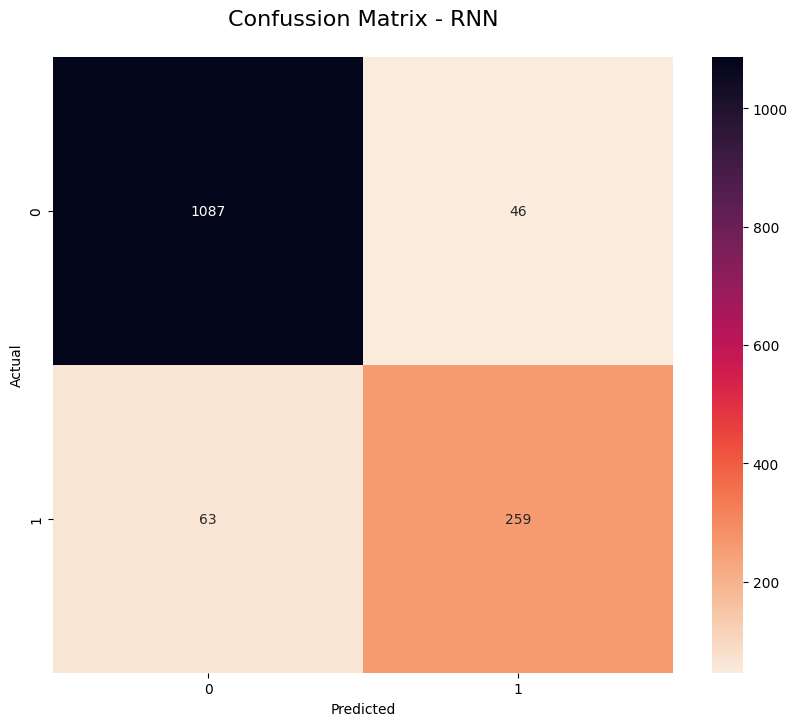

In [ ]:
# Melihat confussion matriks model RNN terbaik
conf_mat = confusion_matrix(test_Y, np.round(np.array(pred_test_rnn1[0])))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - RNN\n", size=16)

# LSTM

## LSTM Untuk parameter output dim 200

In [ ]:
# Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_lstm1 = []
pred_train_lstm1 = []
eval_test_lstm1 = []
histories_lstm1 = []  # Menyimpan history training untuk model LSTM (embedding dim=200)

# Mulai pengukuran waktu total
total_start_time_lstm1 = time.time()

# Melakukan iterasi untuk pemodelan LSTM dengan dimensi output 200
for num in [16, 32,64,128]:
  iteration_start_time_lstm1 = time.time()  # Mulai hitung waktu untuk iterasi saat ini
  model_lstm1 = Sequential()
  model_lstm1.add(Embedding(input_dim=1000,
                            output_dim=200,
                            weights=[embedding_matrix2]))
  model_lstm1.add(LSTM(num))
  model_lstm1.add(Dense(1, activation='sigmoid'))
  model_lstm1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
  callbacks_list = [es]

  hist_lstm1 = model_lstm1.fit(word_seq_train, train_Y,
                               batch_size=256,
                               epochs=10,
                               callbacks=callbacks_list,
                               validation_data=(word_seq_test, test_Y),
                               shuffle=True, verbose=1)
  histories_lstm1.append(hist_lstm1)  # Simpan history training


  yhat_lstm1 = model_lstm1.predict(word_seq_test, batch_size = 256)
  pred_lstm1 = model_lstm1.predict(word_seq_train, batch_size = 256)

  metrics_lstm1 = [accuracy_score(test_Y,np.round(yhat_lstm1,0)),
                   f1_score(test_Y,np.round(yhat_lstm1,0),pos_label=1),
                   f1_score(test_Y,np.round(yhat_lstm1,0),pos_label=0)]

  pred_train_lstm1.append(pred_lstm1)
  pred_test_lstm1.append(yhat_lstm1)
  eval_test_lstm1.append(metrics_lstm1)

  iteration_end_time_lstm1 = time.time()  # Akhiri hitung waktu untuk iterasi ini
  print(f"Model LSTM 200 dengan {num} unit membutuhkan waktu {iteration_end_time_lstm1 - iteration_start_time_lstm1:.2f} detik.")

total_end_time_lstm1 = time.time()
print(f"Total waktu pelatihan: {total_end_time_lstm1 - total_start_time_lstm1:.2f} detik.")
eval_test_lstm1

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8610 - loss: 0.4590 - val_accuracy: 0.8665 - val_loss: 0.3961
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8576 - loss: 0.4107 - val_accuracy: 0.8665 - val_loss: 0.3938
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8570 - loss: 0.4113 - val_accuracy: 0.8665 - val_loss: 0.3935
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8548 - loss: 0.4148 - val_accuracy: 0.8665 - val_loss: 0.3943
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8586 - loss: 0.4088 - val_accuracy: 0.8665 - val_loss: 0.3933
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8577 - loss: 0.4094 - val_accuracy: 0.8665 - val_loss: 0.3934
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8590 - loss: 0.4071 - val_accuracy: 0.8665 - val_loss: 0.3935
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8609 - loss: 0.4036 - val_accuracy: 0.8665 - val_

[[0.8665492957746479, 0.0, 0.928504055838521],
 [0.8841549295774648, 0.5653896961690885, 0.9331708307942311],
 [0.9, 0.5250836120401338, 0.944116489571035],
 [0.8665492957746479, 0.0, 0.928504055838521]]

## Untuk parameter output dim 300

In [ ]:
# Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_lstm2 = []
pred_train_lstm2 = []
eval_test_lstm2 = []
histories_lstm2 = []  # Menyimpan history training untuk model LSTM (embedding dim=300)

# Mulai pengukurna waktu total
total_start_time_lstm2 = time.time()

# Melakukan iterasi untuk pemodelan LSTM dengan dimensi output 300
for num in [16, 32,64,128]:
  iteration_start_time_lstm2 = time.time()  # Mulai hitung waktu untuk iterasi saat ini
  model_lstm2 = Sequential()
  model_lstm2.add(Embedding(input_dim=1000,
                              output_dim=300,
                              weights=[embedding_matrix3]))
  model_lstm2.add(LSTM(num))
  model_lstm2.add(Dense(1, activation='sigmoid'))
  model_lstm2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
  callbacks_list = [es]

  hist_lstm2 = model_lstm2.fit(word_seq_train, train_Y,
                               batch_size=256,
                               epochs=10,
                               callbacks=callbacks_list,
                               validation_data=(word_seq_test, test_Y),
                               shuffle=True, verbose=1)
  histories_lstm2.append(hist_lstm2)  # Simpan history training

  yhat_lstm2 = model_lstm2.predict(word_seq_test, batch_size = 256)
  pred_lstm2 = model_lstm2.predict(word_seq_train, batch_size = 256)

  metrics_lstm2 = [accuracy_score(test_Y,np.round(yhat_lstm2,0)),
                   f1_score(test_Y,np.round(yhat_lstm2,0),pos_label=1),
                   f1_score(test_Y,np.round(yhat_lstm2,0),pos_label=0)]

  pred_train_lstm2.append(pred_lstm2)
  pred_test_lstm2.append(yhat_lstm2)
  eval_test_lstm2.append(metrics_lstm2)

  iteration_end_time_lstm2 = time.time()  # Akhiri hitung waktu untuk iterasi ini
  print(f"Model LSTM 300 dengan {num} unit membutuhkan waktu {iteration_end_time_lstm2 - iteration_start_time_lstm2:.2f} detik.")

total_end_time_lstm2 = time.time()
print(f"Total waktu pelatihan: {total_end_time_lstm2 - total_start_time_lstm2:.2f} detik.")
eval_test_lstm2

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8575 - loss: 0.4454 - val_accuracy: 0.8665 - val_loss: 0.3939
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8596 - loss: 0.4068 - val_accuracy: 0.8665 - val_loss: 0.3946
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8605 - loss: 0.4049 - val_accuracy: 0.8665 - val_loss: 0.3931
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8601 - loss: 0.4053 - val_accuracy: 0.8665 - val_loss: 0.3934
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8600 - loss: 0.4050 - val_accuracy: 0.8665 - val_loss: 0.3934
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8607 - loss: 0.4039 - val_accuracy: 0.8665 - val_loss: 0.3931
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8584 - loss: 0.4079 - val_accuracy: 0.8665 - val_loss: 0.3928
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8640 - loss: 0.3938 - val_accuracy: 0.8665 - val_los

[[0.8672535211267606, 0.5787709497206703, 0.9212121212121213],
 [0.8665492957746479, 0.0, 0.928504055838521],
 [0.8940140845070422, 0.610608020698577, 0.9386590584878745],
 [0.8665492957746479, 0.0, 0.928504055838521]]

In [ ]:
# Menyimpan dan mengunduh hasil pemodelan pada data latih
pred_train_lstm = pd.DataFrame({'lstm1': pred_train_lstm1[0].tolist(),
                                'lstm2': pred_train_lstm1[1].tolist(),
                                'lstm3': pred_train_lstm1[2].tolist(),
                                'lstm4': pred_train_lstm1[3].tolist(),
                                'lstm5': pred_train_lstm2[0].tolist(),
                                'lstm6': pred_train_lstm2[1].tolist(),
                                'lstm7': pred_train_lstm2[2].tolist(),
                                'lstm8': pred_train_lstm2[3].tolist()
                                })

pred_train_lstm.to_csv(f"{folder_path}/pred_train_lstm.csv")

# Menyimpan dan mengunduh hasil pemodelan pada data uji
pred_test_lstm = pd.DataFrame({'lstm1': pred_test_lstm1[0].tolist(),
                               'lstm2': pred_test_lstm1[1].tolist(),
                               'lstm3': pred_test_lstm1[2].tolist(),
                               'lstm4': pred_test_lstm1[3].tolist(),
                               'lstm5': pred_test_lstm2[0].tolist(),
                               'lstm6': pred_test_lstm2[1].tolist(),
                               'lstm7': pred_test_lstm2[2].tolist(),
                               'lstm8': pred_test_lstm2[3].tolist()
                               })
pred_test_lstm.to_csv(f"{folder_path}/pred_test_lstm.csv")

## Model terbaik

In [ ]:
# Melihat hasil performa klasifikasi dimensi output 200 dg input dim 1000
print('Akurasi dan F1 Score dim 200')
eval_test_lstm1

Akurasi dan F1 Score dim 200


[[0.8665492957746479, 0.0, 0.928504055838521],
 [0.8841549295774648, 0.5653896961690885, 0.9331708307942311],
 [0.9, 0.5250836120401338, 0.944116489571035],
 [0.8665492957746479, 0.0, 0.928504055838521]]

In [ ]:
# Melihat hasil performa klasifikasi dimensi output 300 dg input dim 1000
print('Akurasi dan F1 Score dim 300')
eval_test_lstm2

Akurasi dan F1 Score dim 300


[[0.8672535211267606, 0.5787709497206703, 0.9212121212121213],
 [0.8665492957746479, 0.0, 0.928504055838521],
 [0.8940140845070422, 0.610608020698577, 0.9386590584878745],
 [0.8665492957746479, 0.0, 0.928504055838521]]


Best model info: LSTM (Embedding dim=200) with 64 units
Best validation loss: 0.3190820515155792


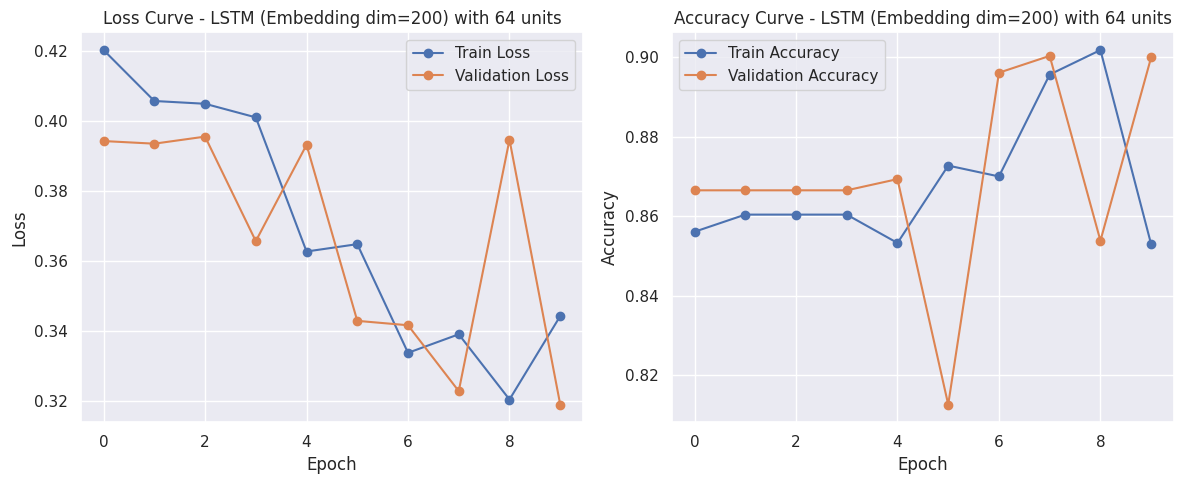


Classification Metrics for Best LSTM Model

              precision    recall  f1-score   support

           0    0.91530   0.97481   0.94412      2461
           1    0.71689   0.41425   0.52508       379

    accuracy                        0.90000      2840
   macro avg    0.81610   0.69453   0.73460      2840
weighted avg    0.88882   0.90000   0.88820      2840



Text(0.5, 1.0, 'Confussion Matrix - LSTM\n')

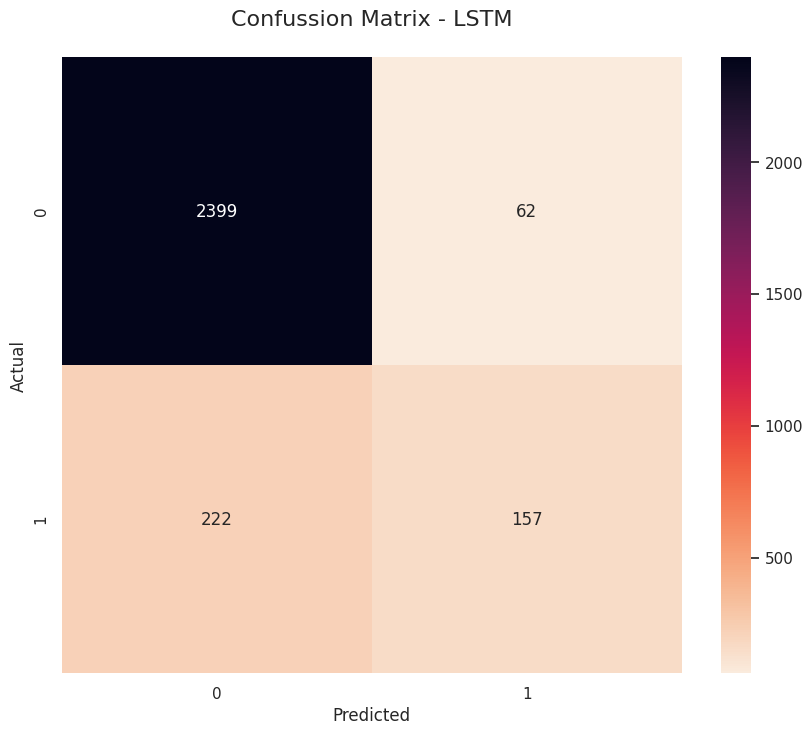

In [ ]:
import matplotlib.pyplot as plt

# Best Model (best model lstm adalah model dari pred_test_lstm1[2])
best_index = 2  # Model ke-4 dalam list (dengan unit: [16, 32, 64, 128][3] => 128 unit)
best_history = histories_lstm1[best_index]
best_val_loss = min(best_history.history['val_loss'])
best_model = pred_test_lstm1[2]
best_model_info = f"LSTM (Embedding dim=200) with {[16, 32, 64, 128][best_index]} units"

print("\nBest model info:", best_model_info)
print("Best validation loss:", best_val_loss)

# --- Plotting grafik Loss dan Accuracy ---
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title(f'Loss Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title(f'Accuracy Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best LSTM Model\n')
unique_labels = np.unique(test_Y)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))

# Melihat confussion matrix model LSTM terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - LSTM\n", size=16)


# BiLSTM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

## BiLSTM dengan embedding output dim 200

In [ ]:
# List untuk menyimpan hasil pemodelan
pred_test_bilstm1 = []
pred_train_bilstm1 = []
eval_test_bilstm1 = []
histories_bilstm1 = []  # Menyimpan history training untuk model LSTM (embedding dim=200)

# Mulai pengukuran waktu total
total_start_time_bilstm1 = time.time()

# Melakukan iterasi untuk pemodelan LSTM dengan dimensi output 200

# BiLSTM dengan embedding output dim 200
for num in [16, 32, 64, 128]:
    iteration_start_time_bilstm1 = time.time()  # Mulai hitung waktu
    model_bilstm1 = Sequential()
    model_bilstm1.add(Embedding(input_dim=1000,
                                output_dim=200,
                                weights=[embedding_matrix2]))
    model_bilstm1.add(Bidirectional(LSTM(num)))
    model_bilstm1.add(Dense(1, activation='sigmoid'))
    model_bilstm1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
    callbacks_list = [es]

    hist_bilstm1 = model_bilstm1.fit(word_seq_train, train_Y,
                                     batch_size=256,
                                     epochs=10,
                                     callbacks=callbacks_list,
                                     validation_data=(word_seq_test, test_Y),
                                     shuffle=True, verbose=1)
    histories_bilstm1.append(hist_lstm1)  # Simpan history training

    yhat_bilstm1 = model_bilstm1.predict(word_seq_test, batch_size=256)
    pred_bilstm1 = model_bilstm1.predict(word_seq_train, batch_size=256)

    metrics_bilstm1 = [accuracy_score(test_Y, np.round(yhat_bilstm1, 0)),
                       f1_score(test_Y, np.round(yhat_bilstm1, 0), pos_label=1),
                       f1_score(test_Y, np.round(yhat_bilstm1, 0), pos_label=0)]

    pred_train_bilstm1.append(pred_bilstm1)
    pred_test_bilstm1.append(yhat_bilstm1)
    eval_test_bilstm1.append(metrics_bilstm1)

    iteration_end_time_bilstm1 = time.time()  # Akhiri hitung waktu untuk iterasi ini
    print(f"Model BiLSTM 200 dengan {num} unit membutuhkan waktu {iteration_end_time_bilstm1 - iteration_start_time_bilstm1:.2f} detik.")

total_end_time_bilstm1 = time.time()
print(f"Total waktu pelatihan: {total_end_time_bilstm1 - total_start_time_bilstm1:.2f} detik.")

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7933 - loss: 0.4385 - val_accuracy: 0.8665 - val_loss: 0.3167
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8768 - loss: 0.2933 - val_accuracy: 0.9102 - val_loss: 0.2558
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9182 - loss: 0.2366 - val_accuracy: 0.9155 - val_loss: 0.2425
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9283 - loss: 0.2102 - val_accuracy: 0.9134 - val_loss: 0.2446
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9330 - loss: 0.1975 - val_accuracy: 0.9123 - val_loss: 0.2468
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9379 - loss: 0.1838 - val_accuracy: 0.9137 - val_loss: 0.2490
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9371 - loss: 0.1813 - val_accuracy: 0.9092 - val_loss: 0.2559
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9426 - loss: 0.1740 - val_accuracy: 0.9127 - v

## BiLSTM dengan embedding output dim 300

In [ ]:
# BiLSTM dengan embedding output dim 300
pred_test_bilstm2 = []
pred_train_bilstm2 = []
eval_test_bilstm2 = []
histories_bilstm2 = []  # Menyimpan history training untuk model BiLSTM (embedding dim=300)

# Mulai pengukuran waktu total
total_start_time_bilstm2 = time.time()

# Melakukan iterasi untuk pemodelan LSTM dengan dimensi output 300
for num in [16, 32, 64, 128]:
    iteration_start_time_bilstm2 = time.time()  # Mulai hitung waktu
    model_bilstm2 = Sequential()
    model_bilstm2.add(Embedding(input_dim=1000,
                                output_dim=300,
                                weights=[embedding_matrix3]))
    model_bilstm2.add(Bidirectional(LSTM(num)))
    model_bilstm2.add(Dense(1, activation='sigmoid'))
    model_bilstm2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
    callbacks_list = [es]

    hist_bilstm2 = model_bilstm2.fit(word_seq_train, train_Y,
                                     batch_size=256,
                                     epochs=10,
                                     callbacks=callbacks_list,
                                     validation_data=(word_seq_test, test_Y),
                                     shuffle=True, verbose=1)
    histories_bilstm2.append(hist_lstm2)  # Simpan history training

    yhat_bilstm2 = model_bilstm2.predict(word_seq_test, batch_size=256)
    pred_bilstm2 = model_bilstm2.predict(word_seq_train, batch_size=256)

    metrics_bilstm2 = [accuracy_score(test_Y, np.round(yhat_bilstm2, 0)),
                       f1_score(test_Y, np.round(yhat_bilstm2, 0), pos_label=1),
                       f1_score(test_Y, np.round(yhat_bilstm2, 0), pos_label=0)]

    pred_train_bilstm2.append(pred_bilstm2)
    pred_test_bilstm2.append(yhat_bilstm2)
    eval_test_bilstm2.append(metrics_bilstm2)

    iteration_end_time_bilstm2 = time.time()  # Akhiri hitung waktu untuk iterasi ini
    print(f"Model BiLSTM 300 dengan {num} unit membutuhkan waktu {iteration_end_time_bilstm2 - iteration_start_time_bilstm2:.2f} detik.")

total_end_time_bilstm2 = time.time()
print(f"Total waktu pelatihan: {total_end_time_bilstm2 - total_start_time_bilstm2:.2f} detik.")

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8110 - loss: 0.4270 - val_accuracy: 0.8665 - val_loss: 0.3139
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8838 - loss: 0.2904 - val_accuracy: 0.9137 - val_loss: 0.2515
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9168 - loss: 0.2289 - val_accuracy: 0.9137 - val_loss: 0.2411
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9271 - loss: 0.2058 - val_accuracy: 0.9155 - val_loss: 0.2429
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9345 - loss: 0.1878 - val_accuracy: 0.9099 - val_loss: 0.2498
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9348 - loss: 0.1868 - val_accuracy: 0.9137 - val_loss: 0.2527
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9408 - loss: 0.1709 - val_accuracy: 0.9092 - val_loss: 0.2603
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9446 - loss: 0.1630 - val_accuracy: 0.9088 - v

In [ ]:
# Menyimpan hasil prediksi pada data latih
pred_train_bilstm = pd.DataFrame({'bilstm1': pred_train_bilstm1[0].tolist(),
                                  'bilstm2': pred_train_bilstm1[1].tolist(),
                                  'bilstm3': pred_train_bilstm1[2].tolist(),
                                  'bilstm4': pred_train_bilstm1[3].tolist(),
                                  'bilstm5': pred_train_bilstm2[0].tolist(),
                                  'bilstm6': pred_train_bilstm2[1].tolist(),
                                  'bilstm7': pred_train_bilstm2[2].tolist(),
                                  'bilstm8': pred_train_bilstm2[3].tolist()})
pred_train_bilstm.to_csv(f"{folder_path}/pred_train_bilstm.csv")

# Menyimpan hasil prediksi pada data uji
pred_test_bilstm = pd.DataFrame({'bilstm1': pred_test_bilstm1[0].tolist(),
                                 'bilstm2': pred_test_bilstm1[1].tolist(),
                                 'bilstm3': pred_test_bilstm1[2].tolist(),
                                 'bilstm4': pred_test_bilstm1[3].tolist(),
                                 'bilstm5': pred_test_bilstm2[0].tolist(),
                                 'bilstm6': pred_test_bilstm2[1].tolist(),
                                 'bilstm7': pred_test_bilstm2[2].tolist(),
                                 'bilstm8': pred_test_bilstm2[3].tolist()})
pred_test_bilstm.to_csv(f"{folder_path}/pred_test_bilstm.csv")


## Model terbaik

In [ ]:
# Melihat hasil performa klasifikasi dimensi output 200
print('Akurasi dan F1 Score dim 200')
eval_test_bilstm1

Akurasi dan F1 Score dim 200


[[0.9070422535211268, 0.6260623229461756, 0.9469240048250904],
 [0.9059859154929577, 0.6158273381294964, 0.9464393179538616],
 [0.9088028169014084, 0.6151560178306092, 0.9482724186139405],
 [0.9077464788732394, 0.6180758017492711, 0.947537044453344]]

In [ ]:
# Melihat hasil performa klasifikasi dimensi output 300
print('Akurasi dan F1 Score dim 300')
eval_test_bilstm2

Akurasi dan F1 Score dim 300


[[0.9063380281690141, 0.6088235294117647, 0.9468],
 [0.9049295774647887, 0.6120689655172413, 0.9458266452648475],
 [0.9084507042253521, 0.6119402985074627, 0.9481037924151696],
 [0.897887323943662, 0.5892351274787535, 0.9416968234821069]]


Best model info: BiLSTM (Embedding dim=200) with 64 units
Best validation loss: 0.39280518889427185


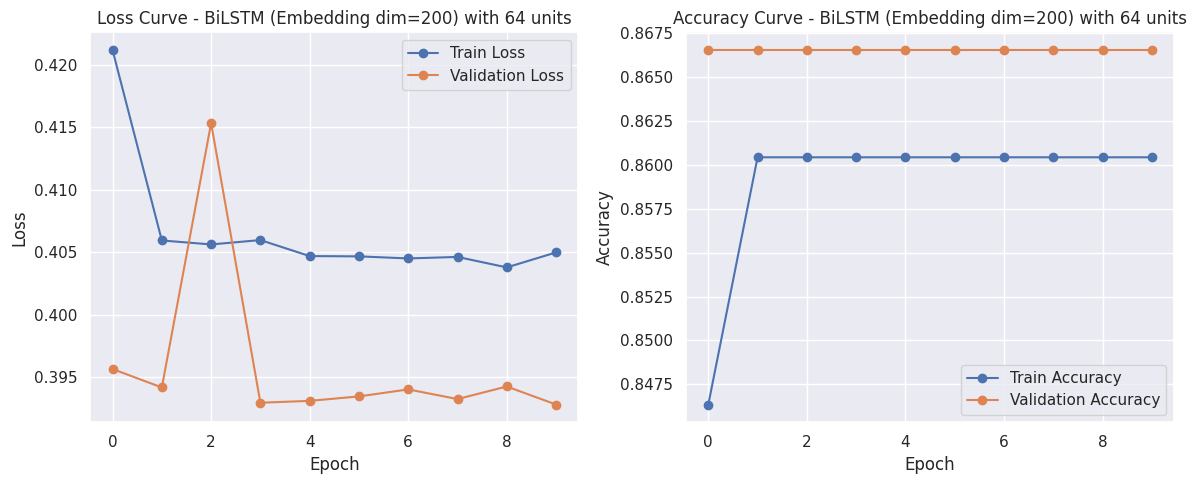


Classification Metrics for Best BiLSTM Model

              precision    recall  f1-score   support

           0    0.93244   0.96465   0.94827      2461
           1    0.70408   0.54617   0.61516       379

    accuracy                        0.90880      2840
   macro avg    0.81826   0.75541   0.78171      2840
weighted avg    0.90197   0.90880   0.90382      2840



Text(0.5, 1.0, 'Confussion Matrix - BiLSTM\n')

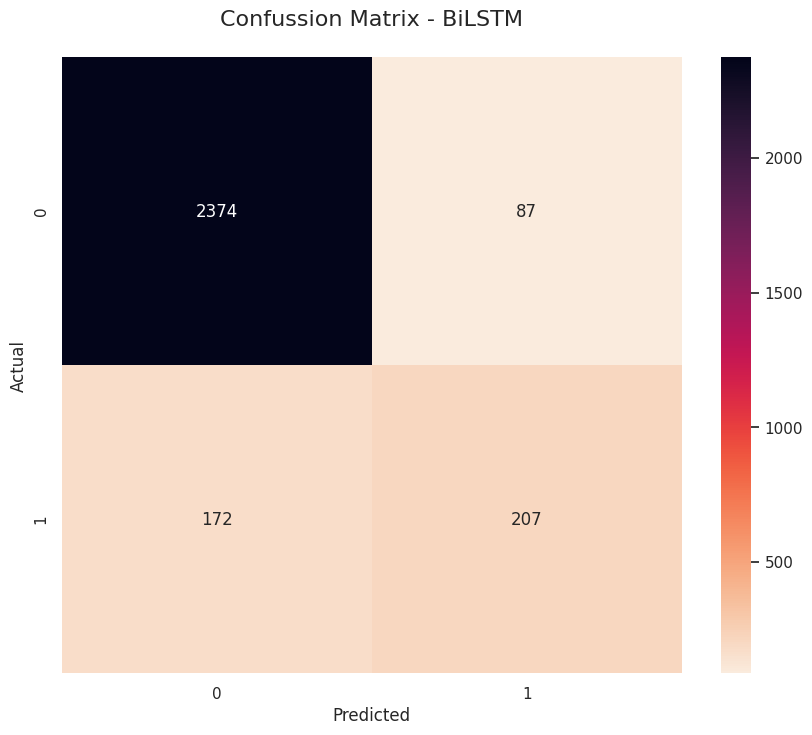

In [ ]:
import matplotlib.pyplot as plt

# Best Model (best model lstm adalah model dari pred_test_bilstm1[2])
best_index = 2  # Model ke-4 dalam list (dengan unit: [16, 32, 64, 128][3] => 128 unit)
best_history = histories_bilstm1[best_index]
best_val_loss = min(best_history.history['val_loss'])
best_model = pred_test_bilstm1[best_index]
best_model_info = f"BiLSTM (Embedding dim=200) with {[16, 32, 64, 128][best_index]} units"

print("\nBest model info:", best_model_info)
print("Best validation loss:", best_val_loss)

# --- Plotting grafik Loss dan Accuracy ---
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title(f'Loss Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title(f'Accuracy Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best BiLSTM Model\n')
unique_labels = np.unique(test_Y)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))


# Melihat confussion matrix model BiLSTM terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - BiLSTM\n", size=16)


Best model info: BiLSTM (Embedding dim=300) with 64 units
Best validation loss: 0.2122897207736969


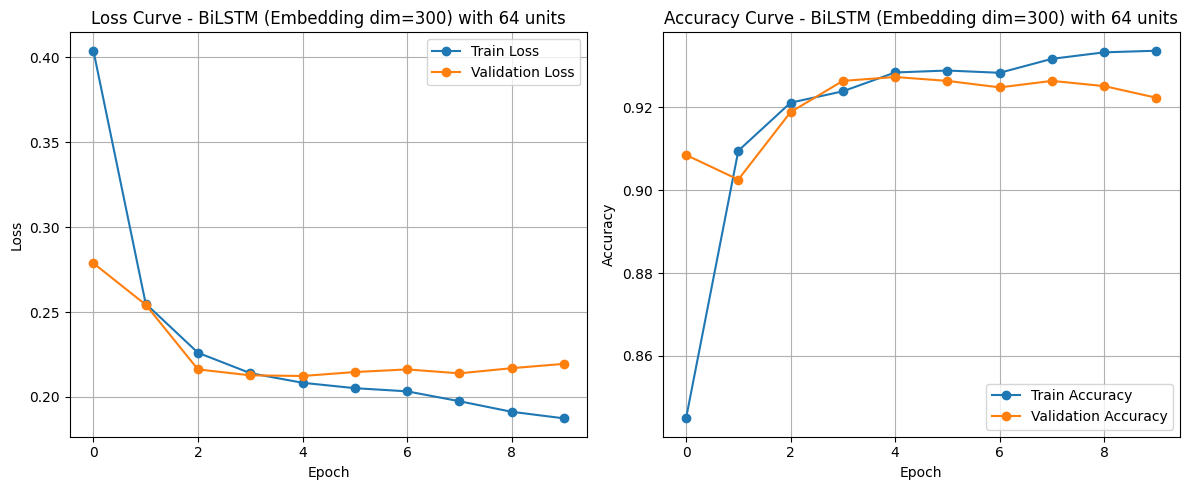


Classification Metrics for Best BiLSTM Model

              precision    recall  f1-score   support

           0    0.94254   0.96712   0.95467      2646
           1    0.81723   0.71376   0.76200       545

    accuracy                        0.92385      3191
   macro avg    0.87988   0.84044   0.85834      3191
weighted avg    0.92114   0.92385   0.92177      3191



Text(0.5, 1.0, 'Confussion Matrix - BiLSTM\n')

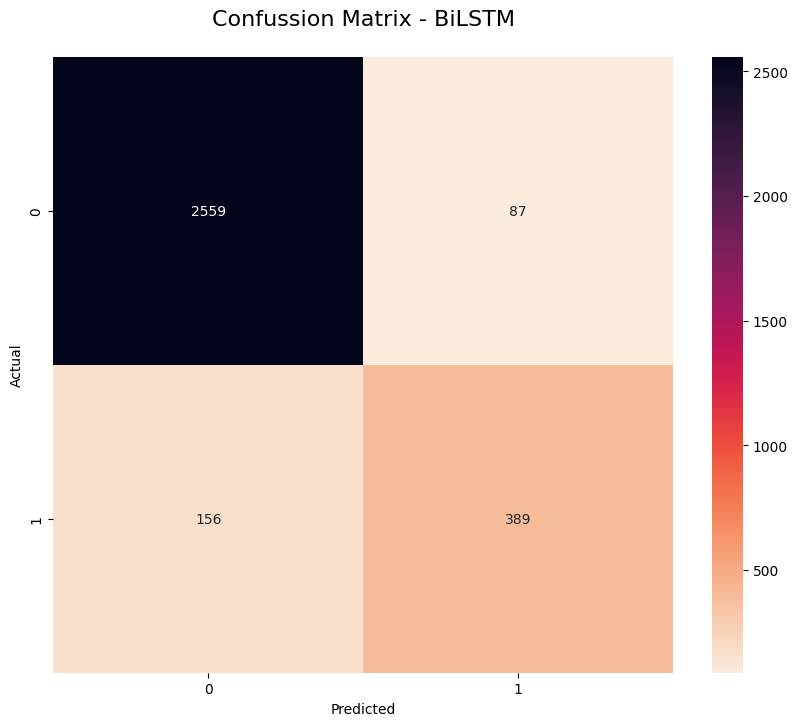

In [ ]:
import matplotlib.pyplot as plt

# Best Model (best model lstm adalah model dari pred_test_bilstm2[3])
best_index = 2  # Model ke-4 dalam list (dengan unit: [16, 32, 64, 128][3] => 128 unit)
best_history = histories_lstm1[best_index]
best_val_loss = min(best_history.history['val_loss'])
best_model = pred_test_bilstm2[3]
best_model_info = f"BiLSTM (Embedding dim=300) with {[16, 32, 64, 128][best_index]} units"

print("\nBest model info:", best_model_info)
print("Best validation loss:", best_val_loss)

# --- Plotting grafik Loss dan Accuracy ---
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title(f'Loss Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title(f'Accuracy Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best BiLSTM Model\n')
unique_labels = np.unique(test_Y)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))


# Melihat confussion matrix model BiLSTM terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - BiLSTM\n", size=16)

# CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

## CNN Untuk parameter output dim 200

In [ ]:
# Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_cnn1 = []
pred_train_cnn1 = []
eval_test_cnn1 = []
histories_cnn1 = []  # Menyimpan history training untuk model CNN (embedding dim=200)

# Mulai pengukuran waktu total
total_start_time_cnn1 = time.time()

# Melakukan iterasi untuk pemodelan CNN dengan jumlah filter berbeda
for num in [16, 32, 64, 128]:
  iteration_start_time_cnn1 = time.time()  # Mulai hitung waktu
  model_cnn1 = Sequential()
  model_cnn1.add(Embedding(input_dim=1000,
                            output_dim=200,
                            weights=[embedding_matrix2]))
  model_cnn1.add(Conv1D(filters=num, kernel_size=3, activation='relu'))
  model_cnn1.add(GlobalMaxPooling1D())
  model_cnn1.add(Dense(1, activation='sigmoid'))
  model_cnn1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
  callbacks_list = [es]

  hist_cnn1 = model_cnn1.fit(word_seq_train, train_Y,
                              batch_size=256,
                              epochs=10,
                              callbacks=callbacks_list,
                              validation_data=(word_seq_test, test_Y),
                              shuffle=True, verbose=1)
  histories_cnn1.append(hist_cnn1)  # Simpan history training


  yhat_cnn1 = model_cnn1.predict(word_seq_test, batch_size=256)
  pred_cnn1 = model_cnn1.predict(word_seq_train, batch_size=256)

  metrics_cnn1 = [accuracy_score(test_Y, np.round(yhat_cnn1, 0)),
                   f1_score(test_Y, np.round(yhat_cnn1, 0), pos_label=1),
                   f1_score(test_Y, np.round(yhat_cnn1, 0), pos_label=0)]

  pred_train_cnn1.append(pred_cnn1)
  pred_test_cnn1.append(yhat_cnn1)
  eval_test_cnn1.append(metrics_cnn1)

  iteration_end_time_cnn1 = time.time()  # Akhiri hitung waktu untuk iterasi ini
  print(f"Model CNN 200 dengan {num} unit membutuhkan waktu {iteration_end_time_cnn1 - iteration_start_time_cnn1:.2f} detik.")

total_end_time_cnn1 = time.time()
print(f"Total waktu pelatihan: {total_end_time_cnn1 - total_start_time_cnn1:.2f} detik.")

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8569 - loss: 0.4755 - val_accuracy: 0.8665 - val_loss: 0.3261
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8669 - loss: 0.3130 - val_accuracy: 0.9039 - val_loss: 0.2739
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9133 - loss: 0.2489 - val_accuracy: 0.9141 - val_loss: 0.2493
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9182 - loss: 0.2317 - val_accuracy: 0.9141 - val_loss: 0.2449
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9266 - loss: 0.2047 - val_accuracy: 0.9116 - val_loss: 0.2451
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9314 - loss: 0.1877 - val_accuracy: 0.9134 - val_loss: 0.2451
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9356 - loss: 0.1800 - val_accuracy: 0.9127 - val_loss: 0.2474
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9427 - loss: 0.1684 - val_accuracy: 0.9144 - val_loss

## Untuk parameter output dim 300

In [ ]:
# Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_cnn2 = []
pred_train_cnn2 = []
eval_test_cnn2 = []
histories_cnn2 = []  # Menyimpan history training untuk model CNN (embedding dim=300)

# Mulai pengukuran waktu total
total_start_time_cnn2 = time.time()

# Melakukan iterasi untuk pemodelan CNN dengan jumlah filter berbeda
for num in [16, 32, 64, 128]:
  iteration_start_time_cnn2 = time.time()  # Mulai hitung waktu
  model_cnn2 = Sequential()
  model_cnn2.add(Embedding(input_dim=1000,
                            output_dim=300,
                            weights=[embedding_matrix3]))
  model_cnn2.add(Conv1D(filters=num, kernel_size=3, activation='relu'))
  model_cnn2.add(GlobalMaxPooling1D())
  model_cnn2.add(Dense(1, activation='sigmoid'))
  model_cnn2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
  callbacks_list = [es]

  hist_cnn2 = model_cnn2.fit(word_seq_train, train_Y,
                              batch_size=256,
                              epochs=10,
                              callbacks=callbacks_list,
                              validation_data=(word_seq_test, test_Y),
                              shuffle=True, verbose=1)
  histories_cnn2.append(hist_cnn2)  # Simpan history training

  yhat_cnn2 = model_cnn2.predict(word_seq_test, batch_size=256)
  pred_cnn2 = model_cnn2.predict(word_seq_train, batch_size=256)

  metrics_cnn2 = [accuracy_score(test_Y, np.round(yhat_cnn2, 0)),
                   f1_score(test_Y, np.round(yhat_cnn2, 0), pos_label=1),
                   f1_score(test_Y, np.round(yhat_cnn2, 0), pos_label=0)]

  pred_train_cnn2.append(pred_cnn2)
  pred_test_cnn2.append(yhat_cnn2)
  eval_test_cnn2.append(metrics_cnn2)

  iteration_end_time_cnn2 = time.time()  # Akhiri hitung waktu untuk iterasi ini
  print(f"Model CNN 300 dengan {num} unit membutuhkan waktu {iteration_end_time_cnn2 - iteration_start_time_cnn2:.2f} detik.")

total_end_time_cnn2 = time.time()
print(f"Total waktu pelatihan: {total_end_time_cnn2 - total_start_time_cnn2:.2f} detik.")

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8630 - loss: 0.4618 - val_accuracy: 0.8665 - val_loss: 0.3377
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8660 - loss: 0.3192 - val_accuracy: 0.9056 - val_loss: 0.2735
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9075 - loss: 0.2463 - val_accuracy: 0.9137 - val_loss: 0.2474
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9227 - loss: 0.2125 - val_accuracy: 0.9116 - val_loss: 0.2439
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9270 - loss: 0.1996 - val_accuracy: 0.9169 - val_loss: 0.2463
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9321 - loss: 0.1846 - val_accuracy: 0.9141 - val_loss: 0.2472
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9373 - loss: 0.1724 - val_accuracy: 0.9120 - val_loss: 0.2497
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9397 - loss: 0.1646 - val_accuracy: 0.9144 - val_loss

In [ ]:
# Menyimpan dan mengunduh hasil pemodelan pada data latih
pred_train_cnn = pd.DataFrame({'cnn1': pred_train_cnn1[0].tolist(),
                               'cnn2': pred_train_cnn1[1].tolist(),
                               'cnn3': pred_train_cnn1[2].tolist(),
                               'cnn4': pred_train_cnn1[3].tolist(),
                               'cnn5': pred_train_cnn2[0].tolist(),
                               'cnn6': pred_train_cnn2[1].tolist(),
                               'cnn7': pred_train_cnn2[2].tolist(),
                               'cnn8': pred_train_cnn2[3].tolist()})

pred_train_cnn.to_csv(f"{folder_path}/pred_train_cnn.csv")

# Menyimpan dan mengunduh hasil pemodelan pada data uji
pred_test_cnn = pd.DataFrame({'cnn1': pred_test_cnn1[0].tolist(),
                              'cnn2': pred_test_cnn1[1].tolist(),
                              'cnn3': pred_test_cnn1[2].tolist(),
                              'cnn4': pred_test_cnn1[3].tolist(),
                              'cnn5': pred_test_cnn2[0].tolist(),
                              'cnn6': pred_test_cnn2[1].tolist(),
                              'cnn7': pred_test_cnn2[2].tolist(),
                              'cnn8': pred_test_cnn2[3].tolist()})

pred_test_cnn.to_csv(f"{folder_path}/pred_test_cnn.csv")

## Model Terbaik CNN

In [ ]:
# Melihat hasil performa klasifikasi dimensi output 200
print('Akurasi dan F1 Score dim 200')
eval_test_cnn1

Akurasi dan F1 Score dim 200


[[0.9105633802816901, 0.6174698795180723, 0.9493620414673046],
 [0.9123239436619718, 0.6300148588410104, 0.9502696225284601],
 [0.9091549295774648, 0.6260869565217392, 0.9482965931863727],
 [0.9049295774647887, 0.599406528189911, 0.9460647223332002]]

In [ ]:
# Melihat hasil performa klasifikasi dimensi output 200
print('Akurasi dan F1 Score dim 200')
eval_test_cnn2

Akurasi dan F1 Score dim 200


[[0.9112676056338028, 0.6227544910179641, 0.9497206703910615],
 [0.9098591549295775, 0.6190476190476191, 0.9488817891373802],
 [0.9084507042253521, 0.6198830409356725, 0.9479583666933546],
 [0.9059859154929577, 0.6124818577648766, 0.9465037066720097]]


Best model info: CNN (Embedding dim=300) with 32 units
Best validation loss: 0.24275055527687073


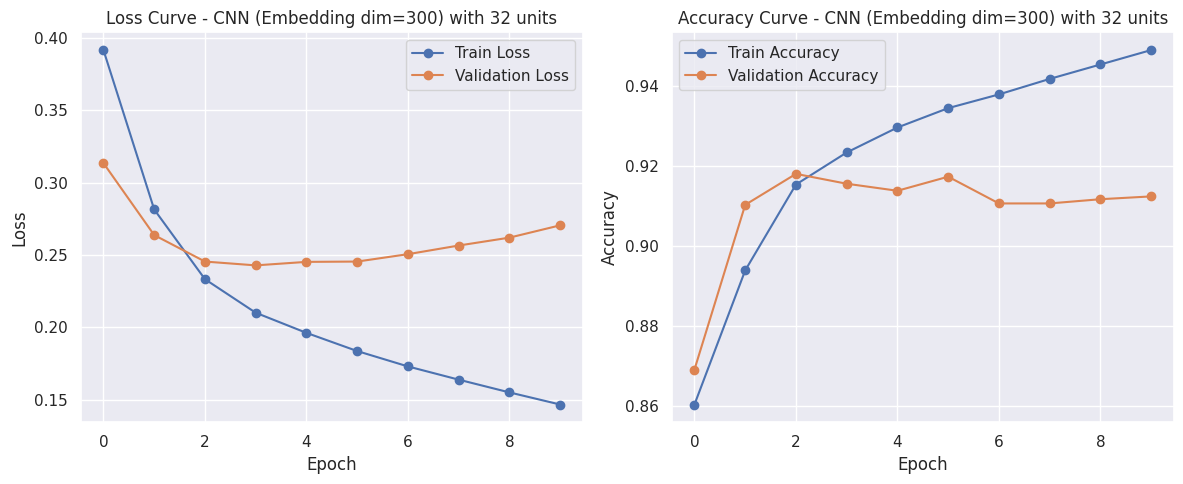


Classification Metrics for Best CNN Model

              precision    recall  f1-score   support

           0    0.93441   0.96668   0.95027      2461
           1    0.72109   0.55937   0.63001       379

    accuracy                        0.91232      2840
   macro avg    0.82775   0.76302   0.79014      2840
weighted avg    0.90594   0.91232   0.90753      2840



Text(0.5, 1.0, 'Confussion Matrix - CNN\n')

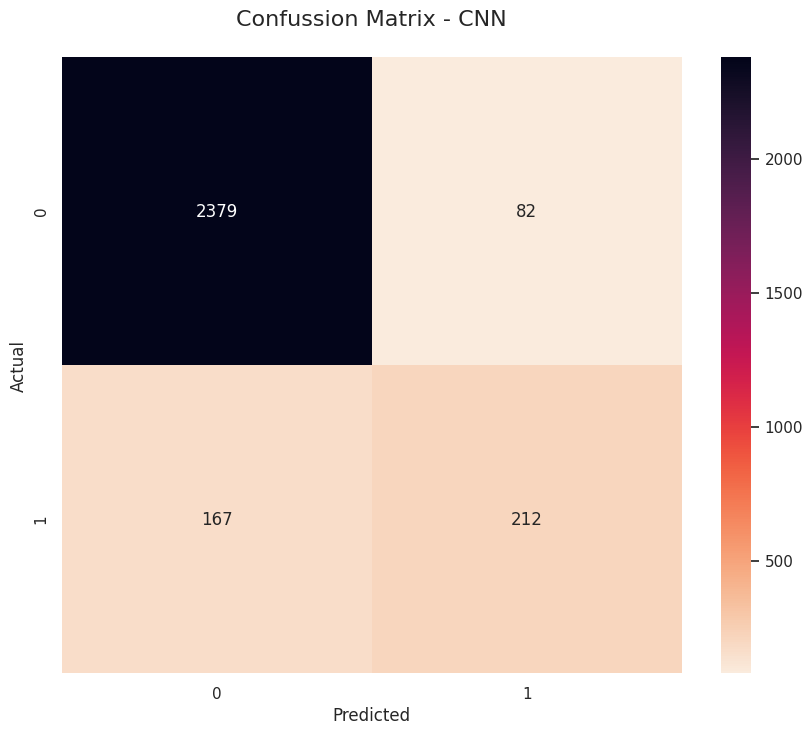

In [ ]:
import matplotlib.pyplot as plt

# Best Model (best model lstm adalah model dari pred_test_cnn1[1])
best_index = 1  # Model ke-4 dalam list (dengan unit: [16, 32, 64, 128][3] => 128 unit)
best_history = histories_cnn1[best_index]
best_val_loss = min(best_history.history['val_loss'])
best_model = pred_test_cnn1[best_index]
best_model_info = f"CNN (Embedding dim=300) with {[16, 32, 64, 128][best_index]} units"

print("\nBest model info:", best_model_info)
print("Best validation loss:", best_val_loss)

# --- Plotting grafik Loss dan Accuracy ---
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title(f'Loss Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title(f'Accuracy Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best CNN Model\n')
unique_labels = np.unique(test_Y)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))


# Melihat confussion matrix model CNN terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - CNN\n", size=16)

# CNN + LSTM

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [40]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# List untuk menyimpan hasil
pred_test_cnnlstm1 = []
pred_train_cnnlstm1 = []
eval_test_cnnlstm1 = []
histories_cnnlstm1 = []

# Mulai pengukuran waktu total
total_start_time_cnnlstm1 = time.time()

# CNN+LSTM dengan output dimensi 200
for num in [16, 32, 64, 128]:
    iteration_start_time_cnnlstm1 = time.time()  # Mulai hitung waktu
    model_cnnlstm1 = Sequential()
    model_cnnlstm1.add(Embedding(input_dim=1000,
                                 output_dim=200,
                                 weights=[embedding_matrix2],
                                 input_shape=(40,)))  # Jangan lupa input_length jika perlu
    model_cnnlstm1.add(Conv1D(filters=num, kernel_size=3, activation='relu'))
    model_cnnlstm1.add(MaxPooling1D(pool_size=2))
    model_cnnlstm1.add(LSTM(num))
    model_cnnlstm1.add(Dense(1, activation='sigmoid'))
    model_cnnlstm1.compile(loss='binary_crossentropy',
                           optimizer='adam',
                           metrics=['accuracy'])

    # -- Cetak ringkasan model (Model Summary) --
    print(f"\n=== Model CNN+LSTM 200 dengan {num} unit: Struktur Layer ===")
    model_cnnlstm1.summary()  # Mencetak spesifikasi layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




=== Model CNN+LSTM 200 dengan 16 unit: Struktur Layer ===


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ (None, 40, 200)             │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ (None, 38, 16)              │           9,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ (None, 19, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 16)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 211,745 (827.13 KB)

 Trainable params: 211,745 (827.13 KB)

 Non-trainable params: 0 (0.00 B)


=== Model CNN+LSTM 200 dengan 32 unit: Struktur Layer ===


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)             │ (None, 40, 200)             │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 38, 32)              │          19,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 19, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,585 (889.00 KB)

 Trainable params: 227,585 (889.00 KB)

 Non-trainable params: 0 (0.00 B)


=== Model CNN+LSTM 200 dengan 64 unit: Struktur Layer ===


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ (None, 40, 200)             │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 38, 64)              │          38,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ (None, 19, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,553 (1.04 MB)

 Trainable params: 271,553 (1.04 MB)

 Non-trainable params: 0 (0.00 B)


=== Model CNN+LSTM 200 dengan 128 unit: Struktur Layer ===


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)             │ (None, 40, 200)             │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 38, 128)             │          76,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ (None, 19, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 408,641 (1.56 MB)

 Trainable params: 408,641 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# CNN+LSTM dengan output dimensi 300
pred_test_cnnlstm2 = []
pred_train_cnnlstm2 = []
eval_test_cnnlstm2 = []
histories_cnnlstm2 = []

# Mulai pengukuran waktu total
total_start_time_cnnlstm2 = time.time()

for num in [16, 32, 64, 128]:
    iteration_start_time_cnnlstm2 = time.time()  # Mulai hitung waktu
    model_cnnlstm2 = Sequential()
    model_cnnlstm2.add(Embedding(input_dim=1000,
                                 output_dim=300,
                                 weights=[embedding_matrix3], input_shape=(40,)))
    model_cnnlstm2.add(Conv1D(filters=num, kernel_size=3, activation='relu'))
    model_cnnlstm2.add(MaxPooling1D(pool_size=2))
    model_cnnlstm2.add(LSTM(num))
    model_cnnlstm2.add(Dense(1, activation='sigmoid'))
    model_cnnlstm2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # -- Cetak ringkasan model (Model Summary) --
    print(f"\n=== Model CNN+LSTM 300 dengan {num} unit: Struktur Layer ===")
    model_cnnlstm2.summary()  # Mencetak spesifikasi layer


=== Model CNN+LSTM 300 dengan 16 unit: Struktur Layer ===


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)             │ (None, 40, 300)             │         300,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ (None, 38, 16)              │          14,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ (None, 19, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 16)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 316,545 (1.21 MB)

 Trainable params: 316,545 (1.21 MB)

 Non-trainable params: 0 (0.00 B)


=== Model CNN+LSTM 300 dengan 32 unit: Struktur Layer ===


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)             │ (None, 40, 300)             │         300,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_17 (Conv1D)                   │ (None, 38, 32)              │          28,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_17 (MaxPooling1D)      │ (None, 19, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 337,185 (1.29 MB)

 Trainable params: 337,185 (1.29 MB)

 Non-trainable params: 0 (0.00 B)


=== Model CNN+LSTM 300 dengan 64 unit: Struktur Layer ===


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)             │ (None, 40, 300)             │         300,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_18 (Conv1D)                   │ (None, 38, 64)              │          57,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_18 (MaxPooling1D)      │ (None, 19, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 390,753 (1.49 MB)

 Trainable params: 390,753 (1.49 MB)

 Non-trainable params: 0 (0.00 B)


=== Model CNN+LSTM 300 dengan 128 unit: Struktur Layer ===


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_19 (Embedding)             │ (None, 40, 300)             │         300,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_19 (Conv1D)                   │ (None, 38, 128)             │         115,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_19 (MaxPooling1D)      │ (None, 19, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 547,041 (2.09 MB)

 Trainable params: 547,041 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

## CNN+LSTM dengan embedding output dim 200

In [ ]:
# List untuk menyimpan hasil
pred_test_cnnlstm1 = []
pred_train_cnnlstm1 = []
eval_test_cnnlstm1 = []
histories_cnnlstm1 = []

# Mulai pengukuran waktu total
total_start_time_cnnlstm1 = time.time()

# CNN+LSTM dengan output dimensi 200
for num in [16, 32, 64, 128]:
    iteration_start_time_cnnlstm1 = time.time()  # Mulai hitung waktu
    model_cnnlstm1 = Sequential()
    model_cnnlstm1.add(Embedding(input_dim=1000,
                                 output_dim=200,
                                 weights=[embedding_matrix2]))
    model_cnnlstm1.add(Conv1D(filters=num, kernel_size=3, activation='relu'))
    model_cnnlstm1.add(MaxPooling1D(pool_size=2))
    model_cnnlstm1.add(LSTM(num))
    model_cnnlstm1.add(Dense(1, activation='sigmoid'))
    model_cnnlstm1.compile(loss='binary_crossentropy',
                           optimizer='adam', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
    hist_cnnlstm1 = model_cnnlstm1.fit(word_seq_train, train_Y,
                                        batch_size=256, epochs=7,
                                        callbacks=[es],
                                        validation_data=(word_seq_test, test_Y),
                                        shuffle=True, verbose=1)
    histories_cnnlstm1.append(hist_cnnlstm1)

    # Simpan model dengan unit 32
    if num == 32:
        model_unit32_ = model_cnnlstm1

    yhat_cnnlstm1 = model_cnnlstm1.predict(word_seq_test, batch_size=256)
    pred_cnnlstm1 = model_cnnlstm1.predict(word_seq_train, batch_size=256)

    metrics_cnnlstm1 = [accuracy_score(test_Y, np.round(yhat_cnnlstm1, 0)),
                        f1_score(test_Y, np.round(yhat_cnnlstm1, 0), pos_label=1),
                        f1_score(test_Y, np.round(yhat_cnnlstm1, 0), pos_label=0)]

    pred_train_cnnlstm1.append(pred_cnnlstm1)
    pred_test_cnnlstm1.append(yhat_cnnlstm1)
    eval_test_cnnlstm1.append(metrics_cnnlstm1)

    iteration_end_time_cnnlstm1 = time.time()
    print(f"Model CNN+LSTM 200 dengan {num} unit membutuhkan waktu {iteration_end_time_cnnlstm1 - iteration_start_time_cnnlstm1:.2f} detik.")

total_end_time_cnnlstm1 = time.time()
print(f"Total waktu pelatihan: {total_end_time_cnnlstm1 - total_start_time_cnnlstm1:.2f} detik.")


Epoch 1/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8361 - loss: 0.4951 - val_accuracy: 0.8665 - val_loss: 0.3943
Epoch 2/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8577 - loss: 0.4103 - val_accuracy: 0.8665 - val_loss: 0.3936
Epoch 3/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8574 - loss: 0.4098 - val_accuracy: 0.8665 - val_loss: 0.3935
Epoch 4/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8667 - loss: 0.3928 - val_accuracy: 0.8665 - val_loss: 0.3930
Epoch 5/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8610 - loss: 0.4030 - val_accuracy: 0.8665 - val_loss: 0.3926
Epoch 6/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8634 - loss: 0.3958 - val_accuracy: 0.8665 - val_loss: 0.3628
Epoch 7/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8666 - loss: 0.3286 - val_accuracy: 0.8750 - val_loss: 0.2915
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model CNN+LSTM 200 dengan 16 unit membutuhkan

In [ ]:
# Melihat hasil performa klasifikasi
print('Akurasi dan F1 Score Hybrid CNN+LSTM')
eval_test_cnnlstm1

Akurasi dan F1 Score Hybrid CNN+LSTM


[[0.9063380281690141, 0.5300353356890459, 0.9479859210011733],
 [0.9080985915492957, 0.622286541244573, 0.9476849067949489],
 [0.9109154929577464, 0.6380543633762518, 0.9492069865488858],
 [0.9038732394366197, 0.624484181568088, 0.9448818897637795]]

In [ ]:
# Melihat hasil performa klasifikasi
print('Akurasi dan F1 Score Hybrid CNN+LSTM')
eval_test_cnnlstm1

Akurasi dan F1 Score Hybrid CNN+LSTM


[[0.875, 0.5798816568047337, 0.9265770423991727],
 [0.9133802816901408, 0.6434782608695652, 0.9507014028056112],
 [0.9077464788732394, 0.6124260355029586, 0.9476418864908074],
 [0.9109154929577464, 0.6380543633762518, 0.9492069865488858]]

# Simulation Testing

In [ ]:
df = pd.read_csv(f"{folder_path}/reviews_simulation_cleaned.csv")
print(df.head())

   Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                                                                                                                                                                                                                                   review  \
0                                                                                                                                                                                                                                                                     oke   
1                                                                                                                                                                    sih tombol batal beli tiket kecewa kai hubungin nunggu antri tunggu alas tunggu antri baik terus app   
2  parah asli parah aplikasi tingkat dewa parah kembang aplikasi antri menit menit menit p

In [ ]:
label = df['sentiment']
new_docs = df['review'].tolist()

In [ ]:
#Mendefinisikan fungsi tokenisasi
tokenizer = RegexpTokenizer(r'\w+')

#Mendefinisikan maksimum jumlah kata yang akan ditokenisasi
max_num_words = 1000

#Melakukan tokenisasi
tokenizer = Tokenizer(num_words=max_num_words,lower=True,char_level=False)
tokenizer.fit_on_texts(new_docs)
new_sequences = tokenizer.texts_to_sequences(new_docs)
word_index = tokenizer.word_index

In [ ]:
# Melakukan padding dengan mode 'post'
maxlen=40
new_padded = pad_sequences(new_sequences, maxlen=maxlen, padding='post')

In [ ]:
# Langkah 4: Lakukan prediksi dengan model_unit32
predictions = model_unit32.predict(new_padded, batch_size=256)
# Konversikan probabilitas ke label biner (misalnya, threshold 0.5)
pred_labels = (predictions > 0.5).astype(int)

# Tambahkan kolom prediksi ke DataFrame baru
df['predicted_sentiment'] = pred_labels
df['predictions'] = predictions
print(df[['review', 'sentiment', 'predicted_sentiment', 'predictions']])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
                                                                                                                                                                                                                                                                      review  \
0                                                                                                                                                                                                                                                                        oke   
1                                                                                                                                                                       sih tombol batal beli tiket kecewa kai hubungin nunggu antri tunggu alas tunggu antri baik terus app   
2     parah asli parah aplikasi tingkat dewa parah kembang aplikasi antri menit menit menit parah asli inalillahi buenci aplikasi kadung kaipay pi

In [ ]:
df['predicted_sentiment'].value_counts()

predicted_sentiment
0    2097
1     197
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Menampilkan classification report
print("Classification Report:")
print(classification_report(df["sentiment"], df["predicted_sentiment"],digits=5))

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(df["sentiment"], df["predicted_sentiment"]))


Classification Report:
              precision    recall  f1-score   support

           0    0.89938   0.92633   0.91265      2036
           1    0.23858   0.18217   0.20659       258

    accuracy                        0.84263      2294
   macro avg    0.56898   0.55425   0.55962      2294
weighted avg    0.82506   0.84263   0.83325      2294

Confusion Matrix:
[[1886  150]
 [ 211   47]]


In [ ]:
# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best CNN+LSTM Model\n')
unique_labels = np.unique(label)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))


# Melihat confussion matrix model CNN terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - CNN+LSTM\n", size=16)

## CNN+LSTM dengan embedding output dim 300

In [ ]:
# CNN+LSTM dengan output dimensi 300
pred_test_cnnlstm2 = []
pred_train_cnnlstm2 = []
eval_test_cnnlstm2 = []
histories_cnnlstm2 = []

# Mulai pengukuran waktu total
total_start_time_cnnlstm2 = time.time()

for num in [16, 32, 64, 128]:
    iteration_start_time_cnnlstm2 = time.time()  # Mulai hitung waktu
    model_cnnlstm2 = Sequential()
    model_cnnlstm2.add(Embedding(input_dim=1000,
                                 output_dim=300,
                                 weights=[embedding_matrix3]))
    model_cnnlstm2.add(Conv1D(filters=num, kernel_size=3, activation='relu'))
    model_cnnlstm2.add(MaxPooling1D(pool_size=2))
    model_cnnlstm2.add(LSTM(num))
    model_cnnlstm2.add(Dense(1, activation='sigmoid'))
    model_cnnlstm2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
    hist_cnnlstm2 = model_cnnlstm2.fit(word_seq_train, train_Y,
                                        batch_size=256, epochs=10,
                                        callbacks=[es],
                                        validation_data=(word_seq_test, test_Y),
                                        shuffle=True, verbose=1)
    histories_cnnlstm2.append(hist_cnnlstm2)

    yhat_cnnlstm2 = model_cnnlstm2.predict(word_seq_test, batch_size=256)
    pred_cnnlstm2 = model_cnnlstm2.predict(word_seq_train, batch_size=256)

    metrics_cnnlstm2 = [accuracy_score(test_Y, np.round(yhat_cnnlstm2, 0)),
                        f1_score(test_Y, np.round(yhat_cnnlstm2, 0), pos_label=1),
                        f1_score(test_Y, np.round(yhat_cnnlstm2, 0), pos_label=0)]

    pred_train_cnnlstm2.append(pred_cnnlstm2)
    pred_test_cnnlstm2.append(yhat_cnnlstm2)
    eval_test_cnnlstm2.append(metrics_cnnlstm2)

    iteration_end_time_cnnlstm2 = time.time()  # Akhiri hitung waktu untuk iterasi ini
    print(f"Model CNN+LSTM 300 dengan {num} unit membutuhkan waktu {iteration_end_time_cnnlstm2 - iteration_start_time_cnnlstm2:.2f} detik.")

total_end_time_cnnlstm2 = time.time()
print(f"Total waktu pelatihan: {total_end_time_cnnlstm2 - total_start_time_cnnlstm2:.2f} detik.")

In [ ]:
# Menyimpan hasil prediksi
pred_train_cnnlstm = pd.DataFrame({
    'cnn_lstm1': pred_train_cnnlstm1[0].tolist(),
    'cnn_lstm2': pred_train_cnnlstm1[1].tolist(),
    'cnn_lstm3': pred_train_cnnlstm1[2].tolist(),
    'cnn_lstm4': pred_train_cnnlstm1[3].tolist(),
    'cnn_lstm5': pred_train_cnnlstm2[0].tolist(),
    'cnn_lstm6': pred_train_cnnlstm2[1].tolist(),
    'cnn_lstm7': pred_train_cnnlstm2[2].tolist(),
    'cnn_lstm8': pred_train_cnnlstm2[3].tolist()

})
pred_train_cnnlstm.to_csv(f"{folder_path}/pred_train_cnnlstm.csv")

pred_test_cnnlstm = pd.DataFrame({
    'cnn_lstm1': pred_test_cnnlstm1[0].tolist(),
    'cnn_lstm2': pred_test_cnnlstm1[1].tolist(),
    'cnn_lstm3': pred_test_cnnlstm1[2].tolist(),
    'cnn_lstm4': pred_test_cnnlstm1[3].tolist(),
    'cnn_lstm5': pred_test_cnnlstm2[0].tolist(),
    'cnn_lstm6': pred_test_cnnlstm2[1].tolist(),
    'cnn_lstm7': pred_test_cnnlstm2[2].tolist(),
    'cnn_lstm8': pred_test_cnnlstm2[3].tolist()

})
pred_test_cnnlstm.to_csv(f"{folder_path}/pred_test_cnnlstm.csv")


## Model Terbaik CNN + LSTM

In [ ]:
# Melihat hasil performa klasifikasi
print('Akurasi dan F1 Score Hybrid CNN+LSTM')
eval_test_cnnlstm1

Akurasi dan F1 Score Hybrid CNN+LSTM


[[0.8665492957746479, 0.0, 0.928504055838521],
 [0.9077464788732394, 0.599388379204893, 0.9478710704337445],
 [0.9091549295774648, 0.5342960288808665, 0.9496683573936793],
 [0.9116197183098591, 0.6202723146747352, 0.9499900378561467]]

In [ ]:
# Melihat hasil performa klasifikasi
print('Akurasi dan F1 Score Hybrid CNN+LSTM')
eval_test_cnnlstm2

Akurasi dan F1 Score Hybrid CNN+LSTM


[[0.8830985915492958, 0.585, 0.9319672131147541],
 [0.9116197183098591, 0.6325036603221084, 0.9497698619171503],
 [0.8968309859154929, 0.6067114093959731, 0.940628166160081],
 [0.9042253521126761, 0.6190476190476191, 0.9452275473217882]]


Best model info: CNN+LSTM (Embedding dim=200) with 32 units
Best validation loss: 0.24825569987297058


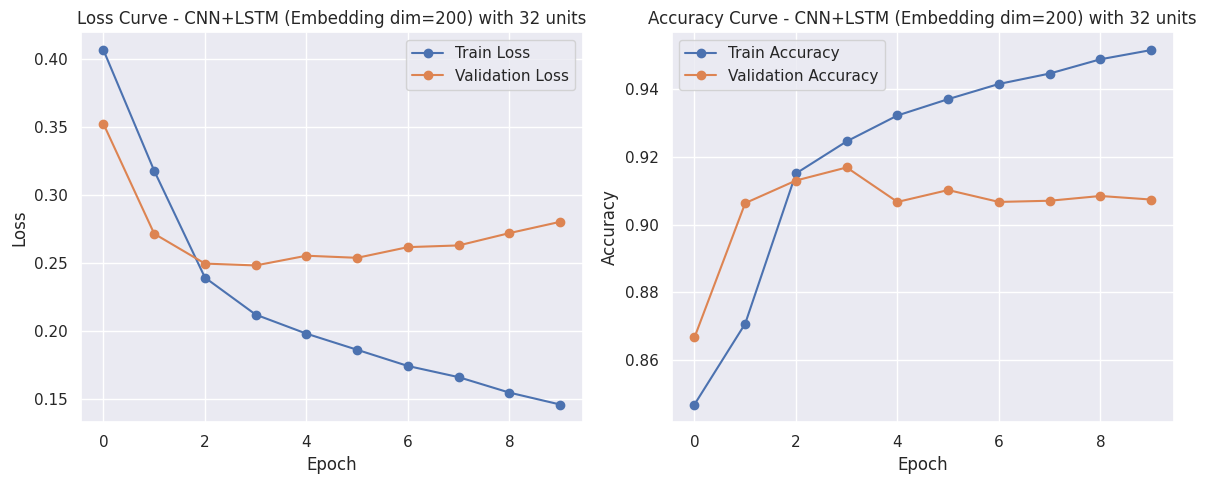


Classification Metrics for Best CNN+LSTM Model

              precision    recall  f1-score   support

           0    0.93370   0.97278   0.95284      2461
           1    0.75725   0.55145   0.63817       379

    accuracy                        0.91655      2840
   macro avg    0.84547   0.76211   0.79550      2840
weighted avg    0.91015   0.91655   0.91084      2840



Text(0.5, 1.0, 'Confussion Matrix - CNN+LSTM\n')

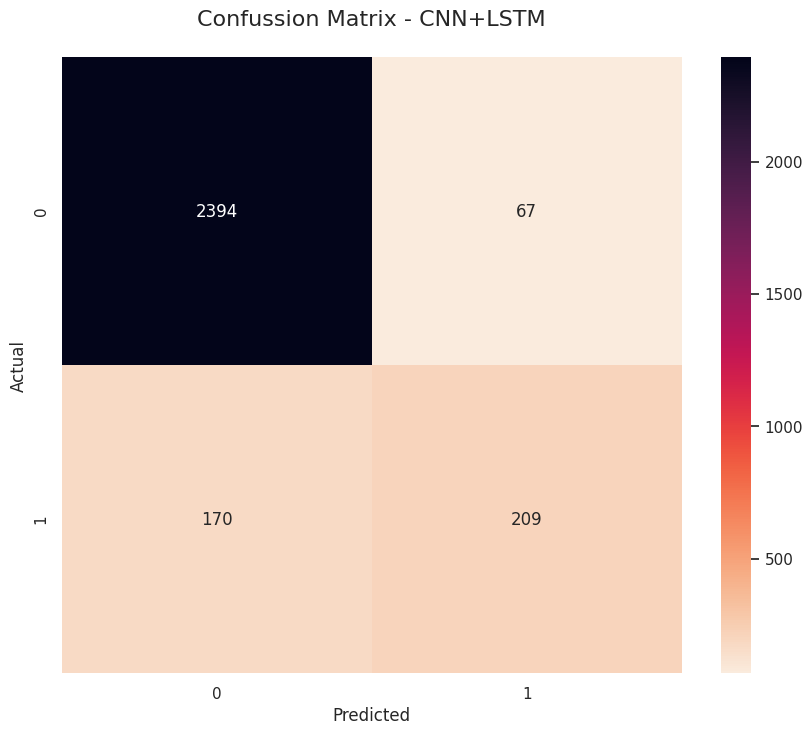

In [ ]:
import matplotlib.pyplot as plt

# Best Model (best model lstm adalah model dari pred_test_cnnlstm1[1])
best_index = 1  # Model ke-4 dalam list (dengan unit: [16, 32, 64, 128][3] => 128 unit)
best_history = histories_cnnbilstm1[best_index]
best_val_loss = min(best_history.history['val_loss'])
best_model = pred_test_cnnlstm1[best_index]
best_model_info = f"CNN+LSTM (Embedding dim=200) with {[16, 32, 64, 128][best_index]} units"

print("\nBest model info:", best_model_info)
print("Best validation loss:", best_val_loss)

# --- Plotting grafik Loss dan Accuracy ---
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title(f'Loss Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title(f'Accuracy Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best CNN+LSTM Model\n')
unique_labels = np.unique(test_Y)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))


# Melihat confussion matrix model CNN terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - CNN+LSTM\n", size=16)


Best model info: CNN+LSTM (Embedding dim=300) with 32 units
Best validation loss: 0.24799641966819763


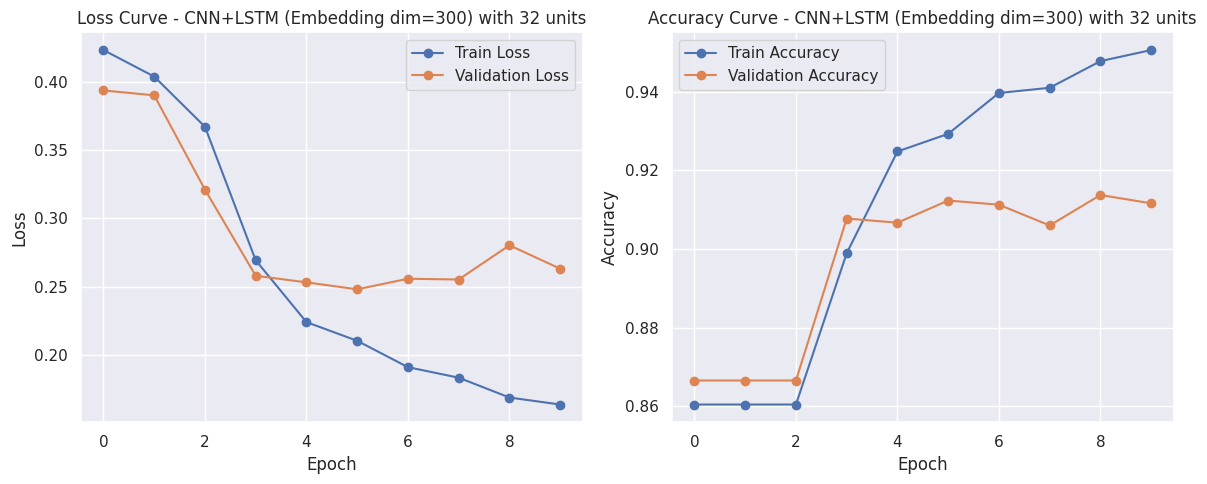


Classification Metrics for Best CNN+LSTM Model

              precision    recall  f1-score   support

           0    0.93573   0.96424   0.94977      2461
           1    0.71053   0.56992   0.63250       379

    accuracy                        0.91162      2840
   macro avg    0.82313   0.76708   0.79114      2840
weighted avg    0.90567   0.91162   0.90743      2840



Text(0.5, 1.0, 'Confussion Matrix - CNN+LSTM\n')

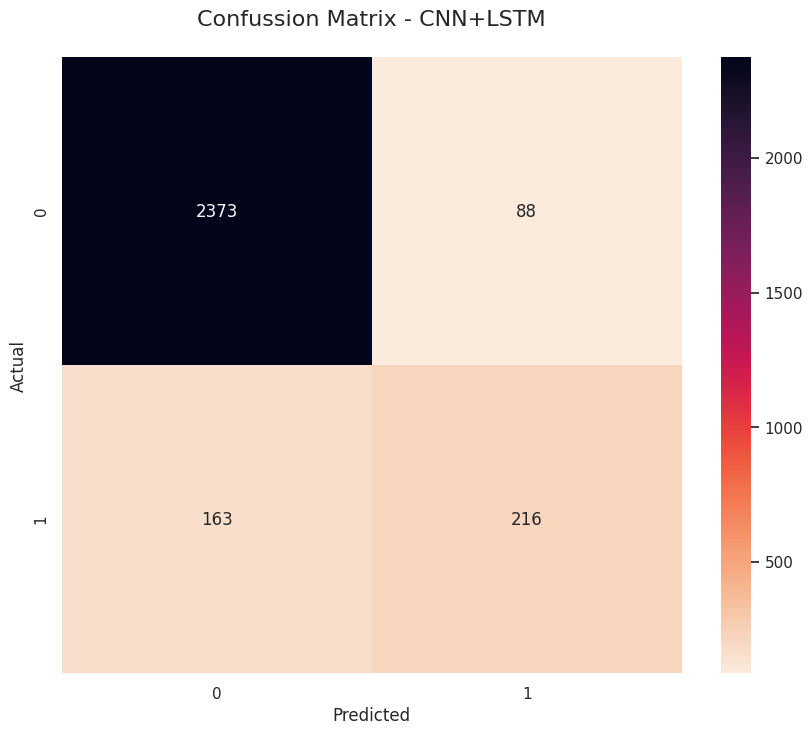

In [ ]:
import matplotlib.pyplot as plt

# Best Model (best model lstm adalah model dari pred_test_cnnlstm2[1])
best_index = 1  # Model ke-4 dalam list (dengan unit: [16, 32, 64, 128][3] => 128 unit)
best_history = histories_cnnlstm2[best_index]
best_val_loss = min(best_history.history['val_loss'])
best_model = pred_test_cnnlstm2[best_index]
best_model_info = f"CNN+LSTM (Embedding dim=300) with {[16, 32, 64, 128][best_index]} units"

print("\nBest model info:", best_model_info)
print("Best validation loss:", best_val_loss)

# --- Plotting grafik Loss dan Accuracy ---
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title(f'Loss Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title(f'Accuracy Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best CNN+LSTM Model\n')
unique_labels = np.unique(test_Y)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))


# Melihat confussion matrix model CNN terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - CNN+LSTM\n", size=16)

# CNN + BiLSTM

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [47]:
# Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_cnn_bilstm1 = []
pred_train_cnn_bilstm1 = []
eval_test_cnn_bilstm1 = []
histories_cnnbilstm1 = []

# Mulai pengukuran waktu total
total_start_time_cnnbilstm1 = time.time()

# Melakukan iterasi untuk pemodelan CNN + BiLSTM
for num in [16, 32, 64, 128]:
    iteration_start_time_cnnbilstm1 = time.time()  # Mulai hitung waktu
    model_cnn_bilstm1 = Sequential()
    model_cnn_bilstm1.add(Embedding(input_dim=1000,
                                    output_dim=200,
                                    weights=[embedding_matrix2], input_shape=(40,)))

    # Layer CNN
    model_cnn_bilstm1.add(Conv1D(filters=num, kernel_size=3, activation='relu'))
    model_cnn_bilstm1.add(MaxPooling1D(pool_size=2))

    # Layer BiLSTM
    model_cnn_bilstm1.add(Bidirectional(LSTM(num)))

    # Output layer
    model_cnn_bilstm1.add(Dense(1, activation='sigmoid'))

    model_cnn_bilstm1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # -- Cetak ringkasan model (Model Summary) --
    print(f"\n=== Model CNN+LSTM 200 dengan {num} unit: Struktur Layer ===")
    model_cnn_bilstm1.summary()  # Mencetak spesifikasi layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




=== Model CNN+LSTM 200 dengan 16 unit: Struktur Layer ===


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_33 (Embedding)             │ (None, 40, 200)             │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_33 (Conv1D)                   │ (None, 38, 16)              │           9,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_33 (MaxPooling1D)      │ (None, 19, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_12 (Bidirectional)     │ (None, 32)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,873 (835.44 KB)

 Trainable params: 213,873 (835.44 KB)

 Non-trainable params: 0 (0.00 B)


=== Model CNN+LSTM 200 dengan 32 unit: Struktur Layer ===


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_34 (Embedding)             │ (None, 40, 200)             │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_34 (Conv1D)                   │ (None, 38, 32)              │          19,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_34 (MaxPooling1D)      │ (None, 19, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_13 (Bidirectional)     │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,937 (921.63 KB)

 Trainable params: 235,937 (921.63 KB)

 Non-trainable params: 0 (0.00 B)


=== Model CNN+LSTM 200 dengan 64 unit: Struktur Layer ===


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_35 (Embedding)             │ (None, 40, 200)             │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_35 (Conv1D)                   │ (None, 38, 64)              │          38,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_35 (MaxPooling1D)      │ (None, 19, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_14 (Bidirectional)     │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 304,641 (1.16 MB)

 Trainable params: 304,641 (1.16 MB)

 Non-trainable params: 0 (0.00 B)


=== Model CNN+LSTM 200 dengan 128 unit: Struktur Layer ===


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_36 (Embedding)             │ (None, 40, 200)             │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_36 (Conv1D)                   │ (None, 38, 128)             │          76,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_36 (MaxPooling1D)      │ (None, 19, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_15 (Bidirectional)     │ (None, 256)                 │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 540,353 (2.06 MB)

 Trainable params: 540,353 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_cnn_bilstm2 = []
pred_train_cnn_bilstm2 = []
eval_test_cnn_bilstm2 = []
histories_cnnbilstm2 = []

# Mulai pengukuranw waktu total
total_start_time_cnnbilstm2 = time.time()

# Melakukan iterasi untuk CNN + BiLSTM dengan output embedding 300
for num in [16, 32, 64, 128]:
    iteration_start_time_cnnbilstm2 = time.time()  # Mulai hitung waktu
    model_cnn_bilstm2 = Sequential()
    model_cnn_bilstm2.add(Embedding(input_dim=1000,
                                    output_dim=300,
                                    weights=[embedding_matrix3], input_shape=(40,)))

    # Layer CNN
    model_cnn_bilstm2.add(Conv1D(filters=num, kernel_size=3, activation='relu'))
    model_cnn_bilstm2.add(MaxPooling1D(pool_size=2))

    # Layer BiLSTM
    model_cnn_bilstm2.add(Bidirectional(LSTM(num)))

    # Output layer
    model_cnn_bilstm2.add(Dense(1, activation='sigmoid'))

    model_cnn_bilstm2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # -- Cetak ringkasan model (Model Summary) --
    print(f"\n=== Model CNN+LSTM 200 dengan {num} unit: Struktur Layer ===")
    model_cnn_bilstm2.summary()  # Mencetak spesifikasi layer



=== Model CNN+LSTM 200 dengan 16 unit: Struktur Layer ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_29 (Embedding)             │ (None, 40, 300)             │         300,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_29 (Conv1D)                   │ (None, 38, 16)              │          14,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_29 (MaxPooling1D)      │ (None, 19, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 32)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 318,673 (1.22 MB)

 Trainable params: 318,673 (1.22 MB)

 Non-trainable params: 0 (0.00 B)


=== Model CNN+LSTM 200 dengan 32 unit: Struktur Layer ===


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_30 (Embedding)             │ (None, 40, 300)             │         300,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_30 (Conv1D)                   │ (None, 38, 32)              │          28,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_30 (MaxPooling1D)      │ (None, 19, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 345,537 (1.32 MB)

 Trainable params: 345,537 (1.32 MB)

 Non-trainable params: 0 (0.00 B)


=== Model CNN+LSTM 200 dengan 64 unit: Struktur Layer ===


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_31 (Embedding)             │ (None, 40, 300)             │         300,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_31 (Conv1D)                   │ (None, 38, 64)              │          57,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_31 (MaxPooling1D)      │ (None, 19, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 423,841 (1.62 MB)

 Trainable params: 423,841 (1.62 MB)

 Non-trainable params: 0 (0.00 B)


=== Model CNN+LSTM 200 dengan 128 unit: Struktur Layer ===


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_32 (Embedding)             │ (None, 40, 300)             │         300,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_32 (Conv1D)                   │ (None, 38, 128)             │         115,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_32 (MaxPooling1D)      │ (None, 19, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ (None, 256)                 │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 678,753 (2.59 MB)

 Trainable params: 678,753 (2.59 MB)

 Non-trainable params: 0 (0.00 B)

## Model CNN + BiLSTM dengan output embedding 200

In [ ]:
# Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_cnn_bilstm1 = []
pred_train_cnn_bilstm1 = []
eval_test_cnn_bilstm1 = []
histories_cnnbilstm1 = []

# Mulai pengukuran waktu total
total_start_time_cnnbilstm1 = time.time()

# Melakukan iterasi untuk pemodelan CNN + BiLSTM
for num in [16, 32, 64, 128]:
    iteration_start_time_cnnbilstm1 = time.time()  # Mulai hitung waktu
    model_cnn_bilstm1 = Sequential()
    model_cnn_bilstm1.add(Embedding(input_dim=1000,
                                    output_dim=200,
                                    weights=[embedding_matrix2]))

    # Layer CNN
    model_cnn_bilstm1.add(Conv1D(filters=num, kernel_size=3, activation='relu'))
    model_cnn_bilstm1.add(MaxPooling1D(pool_size=2))

    # Layer BiLSTM
    model_cnn_bilstm1.add(Bidirectional(LSTM(num)))

    # Output layer
    model_cnn_bilstm1.add(Dense(1, activation='sigmoid'))

    model_cnn_bilstm1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
    callbacks_list = [es]

    hist_cnn_bilstm1 = model_cnn_bilstm1.fit(word_seq_train, train_Y,
                                             batch_size=256,
                                             epochs=10,
                                             callbacks=callbacks_list,
                                             validation_data=(word_seq_test, test_Y),
                                             shuffle=True, verbose=1)
    histories_cnnbilstm1.append(hist_cnn_bilstm1)

    yhat_cnn_bilstm1 = model_cnn_bilstm1.predict(word_seq_test, batch_size=256)
    pred_cnn_bilstm1 = model_cnn_bilstm1.predict(word_seq_train, batch_size=256)

    metrics_cnn_bilstm1 = [accuracy_score(test_Y, np.round(yhat_cnn_bilstm1, 0)),
                           f1_score(test_Y, np.round(yhat_cnn_bilstm1, 0), pos_label=1),
                           f1_score(test_Y, np.round(yhat_cnn_bilstm1, 0), pos_label=0)]

    pred_train_cnn_bilstm1.append(pred_cnn_bilstm1)
    pred_test_cnn_bilstm1.append(yhat_cnn_bilstm1)
    eval_test_cnn_bilstm1.append(metrics_cnn_bilstm1)

    iteration_end_time_cnnbilstm1 = time.time()  # Akhiri hitung waktu untuk iterasi ini
    print(f"Model CNN+BiLSTM 200 dengan {num} unit membutuhkan waktu {iteration_end_time_cnnbilstm1 - iteration_start_time_cnnbilstm1:.2f} detik.")

total_end_time_cnnbilstm1 = time.time()
print(f"Total waktu pelatihan: {total_end_time_cnnbilstm1 - total_start_time_cnnbilstm1:.2f} detik.")

# Melihat hasil performa klasifikasi
eval_test_cnn_bilstm1

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8331 - loss: 0.4885 - val_accuracy: 0.8665 - val_loss: 0.3837
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8600 - loss: 0.3826 - val_accuracy: 0.8665 - val_loss: 0.3309
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8683 - loss: 0.3069 - val_accuracy: 0.9046 - val_loss: 0.2644
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9169 - loss: 0.2332 - val_accuracy: 0.9148 - val_loss: 0.2515
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9296 - loss: 0.2094 - val_accuracy: 0.9137 - val_loss: 0.2484
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9350 - loss: 0.1932 - val_accuracy: 0.9130 - val_loss: 0.2547
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9374 - loss: 0.1827 - val_accuracy: 0.9035 - val_loss: 0.2599
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9425 - loss: 0.1790 - val_accuracy: 0.9099 - v

[[0.905281690140845, 0.6162624821683309, 0.9459730869652541],
 [0.907394366197183, 0.636237897648686, 0.9469437159572321],
 [0.9109154929577464, 0.6284875183553598, 0.9493898779755952],
 [0.9091549295774648, 0.6205882352941177, 0.9484]]

## Model CNN + BiLSTM dengan output embedding 300

In [ ]:
# Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_cnn_bilstm2 = []
pred_train_cnn_bilstm2 = []
eval_test_cnn_bilstm2 = []
histories_cnnbilstm2 = []

# Mulai pengukuranw waktu total
total_start_time_cnnbilstm2 = time.time()

# Melakukan iterasi untuk CNN + BiLSTM dengan output embedding 300
for num in [16, 32, 64, 128]:
    iteration_start_time_cnnbilstm2 = time.time()  # Mulai hitung waktu
    model_cnn_bilstm2 = Sequential()
    model_cnn_bilstm2.add(Embedding(input_dim=1000,
                                    output_dim=300,
                                    weights=[embedding_matrix3]))

    # Layer CNN
    model_cnn_bilstm2.add(Conv1D(filters=num, kernel_size=3, activation='relu'))
    model_cnn_bilstm2.add(MaxPooling1D(pool_size=2))

    # Layer BiLSTM
    model_cnn_bilstm2.add(Bidirectional(LSTM(num)))

    # Output layer
    model_cnn_bilstm2.add(Dense(1, activation='sigmoid'))

    model_cnn_bilstm2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
    callbacks_list = [es]

    hist_cnn_bilstm2 = model_cnn_bilstm2.fit(word_seq_train, train_Y,
                                             batch_size=256,
                                             epochs=10,
                                             callbacks=callbacks_list,
                                             validation_data=(word_seq_test, test_Y),
                                             shuffle=True, verbose=1)
    histories_cnnbilstm2.append(hist_cnn_bilstm2)

    yhat_cnn_bilstm2 = model_cnn_bilstm2.predict(word_seq_test, batch_size=256)
    pred_cnn_bilstm2 = model_cnn_bilstm2.predict(word_seq_train, batch_size=256)

    metrics_cnn_bilstm2 = [accuracy_score(test_Y, np.round(yhat_cnn_bilstm2, 0)),
                           f1_score(test_Y, np.round(yhat_cnn_bilstm2, 0), pos_label=1),
                           f1_score(test_Y, np.round(yhat_cnn_bilstm2, 0), pos_label=0)]

    pred_train_cnn_bilstm2.append(pred_cnn_bilstm2)
    pred_test_cnn_bilstm2.append(yhat_cnn_bilstm2)
    eval_test_cnn_bilstm2.append(metrics_cnn_bilstm2)

    iteration_end_time_cnnbilstm2 = time.time()  # Akhiri hitung waktu untuk iterasi ini
    print(f"Model CNN+BiLSTM 300 dengan {num} unit membutuhkan waktu {iteration_end_time_cnnbilstm2  - iteration_start_time_cnnbilstm2:.2f} detik.")

total_end_time_cnnbilstm2 = time.time()
print(f"Total waktu pelatihan: {total_end_time_cnnbilstm2 - total_start_time_cnnbilstm2:.2f} detik.")

# Melihat hasil performa klasifikasi
eval_test_cnn_bilstm2

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.7909 - loss: 0.4906 - val_accuracy: 0.8665 - val_loss: 0.3585
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8587 - loss: 0.3557 - val_accuracy: 0.8665 - val_loss: 0.3027
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8748 - loss: 0.2837 - val_accuracy: 0.9123 - val_loss: 0.2576
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9229 - loss: 0.2271 - val_accuracy: 0.9123 - val_loss: 0.2512
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9265 - loss: 0.2123 - val_accuracy: 0.9092 - val_loss: 0.2514
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9371 - loss: 0.1877 - val_accuracy: 0.9102 - val_loss: 0.2510
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9383 - loss: 0.1818 - val_accuracy: 0.9007 - val_loss: 0.2695
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9373 - loss: 0.1823 - val_accuracy: 0.9134 - v

[[0.9109154929577464, 0.6390870185449358, 0.9491865836513356],
 [0.9116197183098591, 0.6202723146747352, 0.9499900378561467],
 [0.9070422535211268, 0.6083086053412463, 0.9472632840591291],
 [0.8985915492957747, 0.6076294277929155, 0.9417711281843915]]

In [ ]:
# Menyimpan dan mengunduh hasil pemodelan pada data latih
pred_train_cnn_bilstm = pd.DataFrame({'cnn_bilstm1': pred_train_cnn_bilstm1[0].tolist(),
                                      'cnn_bilstm2': pred_train_cnn_bilstm1[1].tolist(),
                                      'cnn_bilstm3': pred_train_cnn_bilstm1[2].tolist(),
                                      'cnn_bilstm4': pred_train_cnn_bilstm1[3].tolist(),
                                      'cnn_bilstm5': pred_train_cnn_bilstm2[0].tolist(),
                                      'cnn_bilstm6': pred_train_cnn_bilstm2[1].tolist(),
                                      'cnn_bilstm7': pred_train_cnn_bilstm2[2].tolist(),
                                      'cnn_bilstm8': pred_train_cnn_bilstm2[3].tolist()})

pred_train_cnn_bilstm.to_csv(f"{folder_path}/pred_train_cnn_bilstm.csv")

# Menyimpan dan mengunduh hasil pemodelan pada data uji
pred_test_cnn_bilstm = pd.DataFrame({'cnn_bilstm1': pred_test_cnn_bilstm1[0].tolist(),
                                     'cnn_bilstm2': pred_test_cnn_bilstm1[1].tolist(),
                                     'cnn_bilstm3': pred_test_cnn_bilstm1[2].tolist(),
                                     'cnn_bilstm4': pred_test_cnn_bilstm1[3].tolist(),
                                     'cnn_bilstm5': pred_test_cnn_bilstm2[0].tolist(),
                                     'cnn_bilstm6': pred_test_cnn_bilstm2[1].tolist(),
                                     'cnn_bilstm7': pred_test_cnn_bilstm2[2].tolist(),
                                     'cnn_bilstm8': pred_test_cnn_bilstm2[3].tolist()})
pred_test_cnn_bilstm.to_csv(f"{folder_path}/pred_test_cnn_bilstm.csv")

## Model Terbaik CNN + BiLSTM

In [ ]:
# Melihat hasil performa klasifikasi
print('Akurasi dan F1 Score Hybrid CNN+BiLSTM')
eval_test_cnn_bilstm1 # Melihat hasil performa klasifikasi

In [ ]:
print('Akurasi dan F1 Score Hybrid CNN+BiLSTM')
eval_test_cnn_bilstm2

Akurasi dan F1 Score Hybrid CNN+BiLSTM


[[0.9109154929577464, 0.6390870185449358, 0.9491865836513356],
 [0.9116197183098591, 0.6202723146747352, 0.9499900378561467],
 [0.9070422535211268, 0.6083086053412463, 0.9472632840591291],
 [0.8985915492957747, 0.6076294277929155, 0.9417711281843915]]


Best model info: CNN+BiLSTM (Embedding dim=300) with 32 units
Best validation loss: 0.24399001896381378


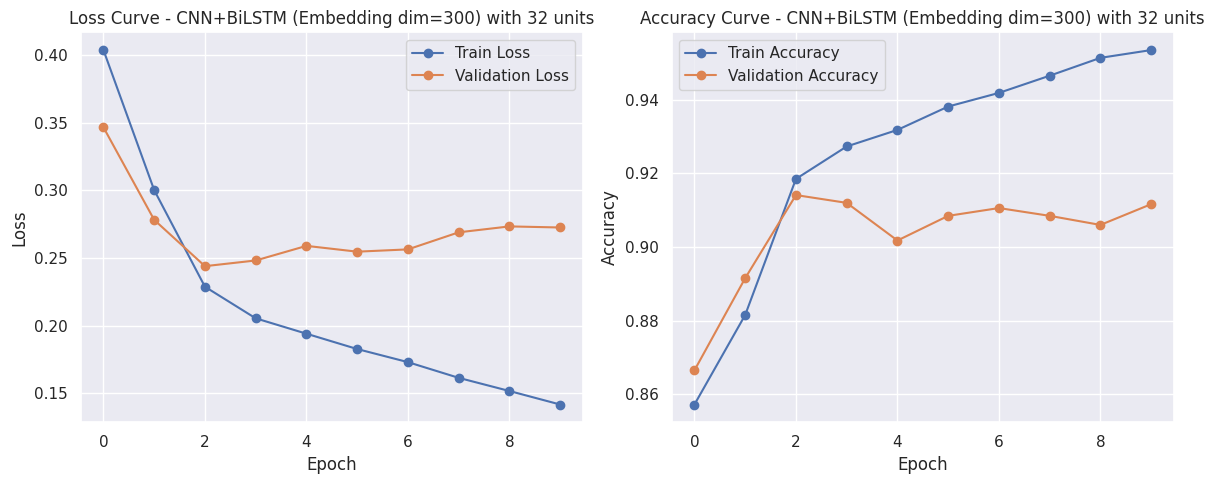


Classification Metrics for Best CNN+BiLSTM Model

              precision    recall  f1-score   support

           0    0.93198   0.96871   0.94999      2461
           1    0.72695   0.54090   0.62027       379

    accuracy                        0.91162      2840
   macro avg    0.82946   0.75480   0.78513      2840
weighted avg    0.90462   0.91162   0.90599      2840



Text(0.5, 1.0, 'Confussion Matrix - CNN+BiLSTM\n')

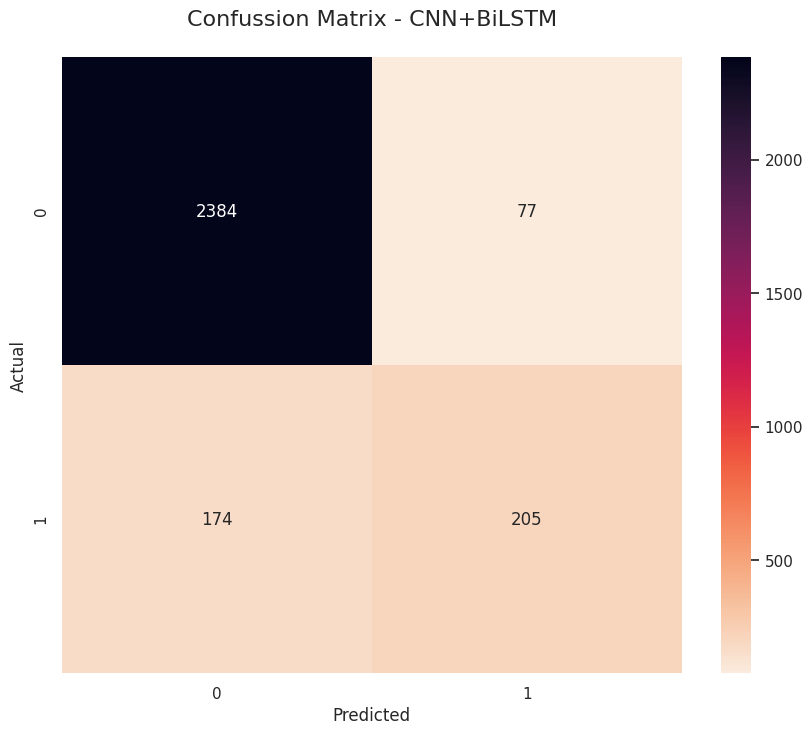

In [ ]:
import matplotlib.pyplot as plt

# Best Model (best model bilstm adalah model dari pred_test_cnnbilstm2[1])
best_index = 1  # Model ke-4 dalam list (dengan unit: [16, 32, 64, 128][3] => 128 unit)
best_history = histories_cnnbilstm2[best_index]
best_val_loss = min(best_history.history['val_loss'])
best_model = pred_test_cnn_bilstm2[best_index]
best_model_info = f"CNN+BiLSTM (Embedding dim=300) with {[16, 32, 64, 128][best_index]} units"

print("\nBest model info:", best_model_info)
print("Best validation loss:", best_val_loss)

# --- Plotting grafik Loss dan Accuracy ---
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title(f'Loss Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title(f'Accuracy Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best CNN+BiLSTM Model\n')
unique_labels = np.unique(test_Y)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))


# Melihat confussion matrix model CNN terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - CNN+BiLSTM\n", size=16)


Best model info: CNN+BiLSTM (Embedding dim=300) with 16 units
Best validation loss: 0.2509908676147461


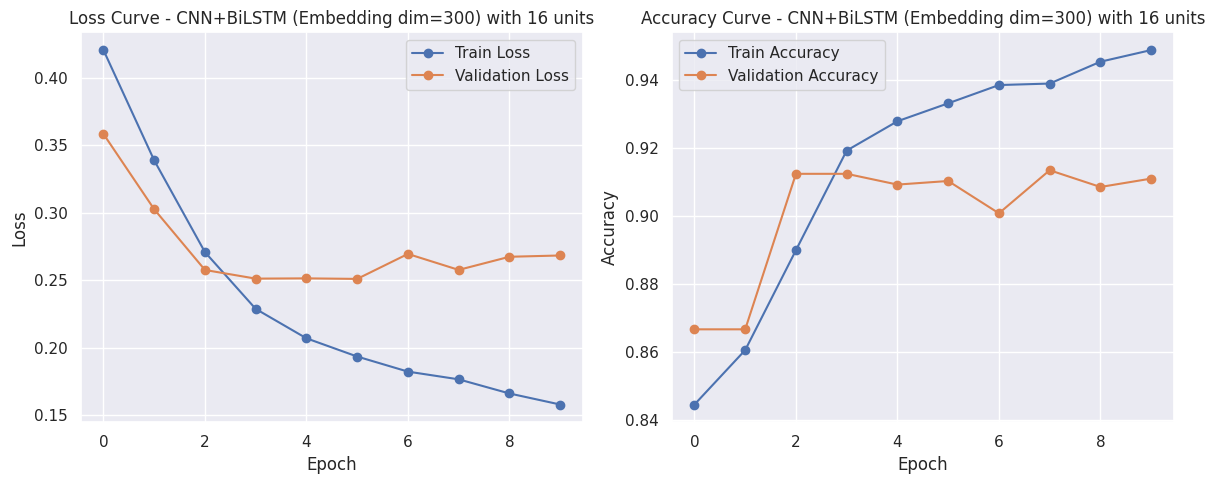


Classification Metrics for Best CNN+BiLSTM Model

              precision    recall  f1-score   support

           0    0.93844   0.96018   0.94919      2461
           1    0.69565   0.59103   0.63909       379

    accuracy                        0.91092      2840
   macro avg    0.81705   0.77560   0.79414      2840
weighted avg    0.90604   0.91092   0.90780      2840



Text(0.5, 1.0, 'Confussion Matrix - CNN+BiLSTM\n')

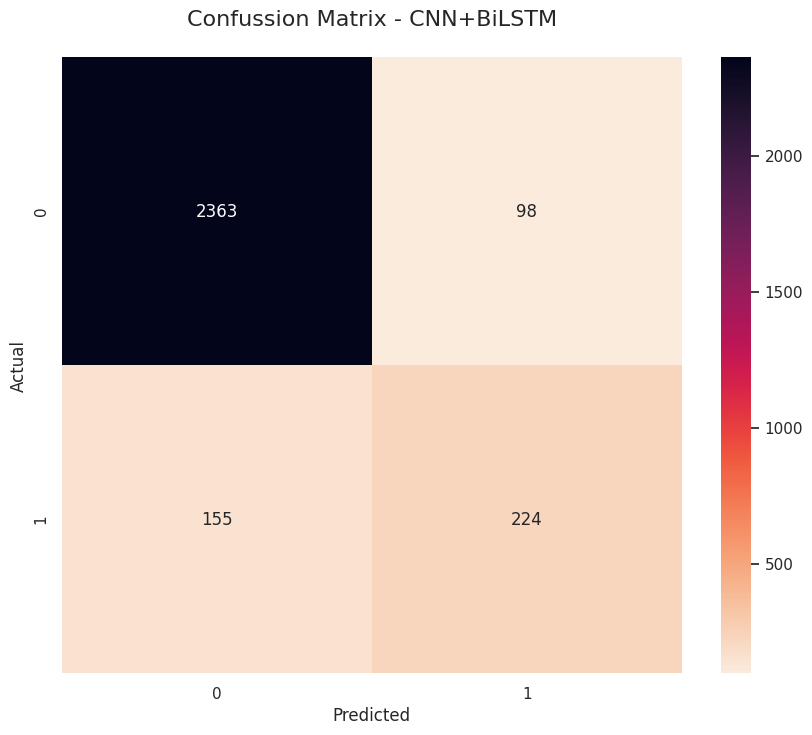

In [ ]:
import matplotlib.pyplot as plt

# Best Model (best model bilstm adalah model dari pred_test_cnnbilstm2[0])
best_index = 0  # Model ke-4 dalam list (dengan unit: [16, 32, 64, 128][3] => 128 unit)
best_history = histories_cnnbilstm2[best_index]
best_val_loss = min(best_history.history['val_loss'])
best_model = pred_test_cnn_bilstm2[best_index]
best_model_info = f"CNN+BiLSTM (Embedding dim=300) with {[16, 32, 64, 128][best_index]} units"

print("\nBest model info:", best_model_info)
print("Best validation loss:", best_val_loss)

# --- Plotting grafik Loss dan Accuracy ---
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title(f'Loss Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title(f'Accuracy Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best CNN+BiLSTM Model\n')
unique_labels = np.unique(test_Y)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))


# Melihat confussion matrix model CNN terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - CNN+BiLSTM\n", size=16)

# Penanganan Data Kelas Tidak Seimbang

## Dengan Random over sampling

In [ ]:
# Mengimpor library fungsi yang diperlukan
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df = pd.read_csv(f"{folder_path}/reviews_kai_cleaned2.csv")
print(df.head())

   Unnamed: 0           review  rating  sentiment_by_rating
0           0    jadwal lambat       1                    0
1           1       bantu guna       5                    1
2           2  aplikasi lambat       1                    0
3           3            jelek       1                    0
4           4        baik aneh       1                    0


In [ ]:
# Memeriksa dimensi data awal
df.shape

(14197, 4)

In [ ]:
# Mengambil kolom ulasan sebagai variabel X
X = df.loc[:, ['review']]
# Mengambil kolom sentimen sebagai variabel X
Y = df.loc[:, ['sentiment_by_rating']]

# Melakukan pembagian data latih dan data uji dengan proporsi 80:20
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state=0, train_size = .80)
# Memeriksa dimensi data latih dan data uji
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(11357, 1) (2840, 1) (11357, 1) (2840, 1)


<ipython-input-40-46c834799ccc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(x=train_Y["sentiment_by_rating"], palette=['crimson', 'royalblue'])


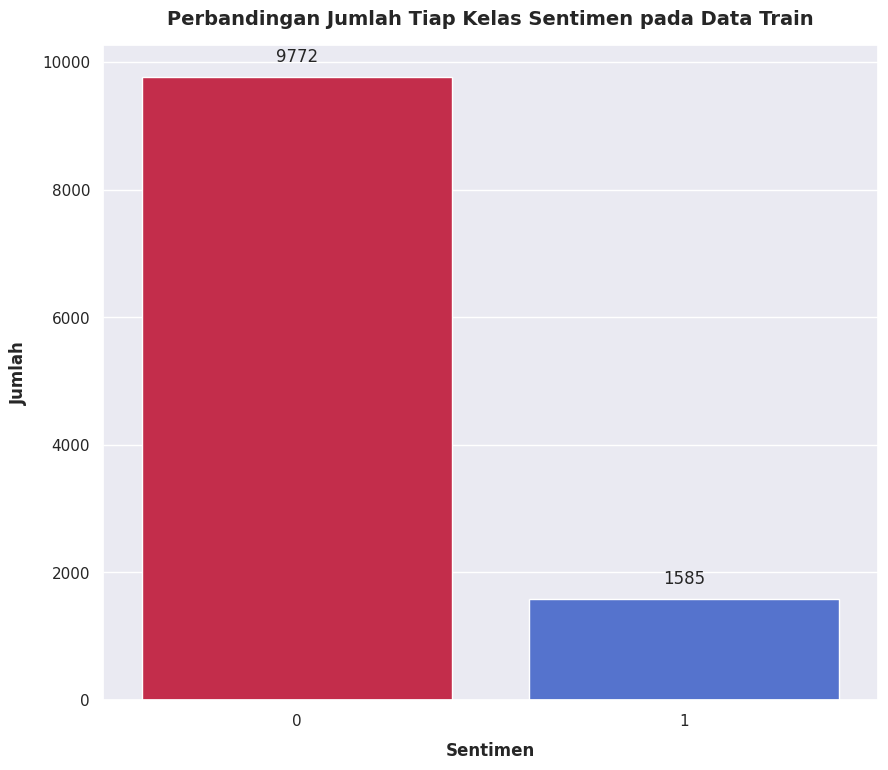

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diagram batang perbandingan jumlah tiap kelas pada data latih
fig, ax = plt.subplots(figsize=(10, 8.5))
bars = sns.countplot(x=train_Y["sentiment_by_rating"], palette=['crimson', 'royalblue'])

# Menyesuaikan judul agar tebal
plt.title("Perbandingan Jumlah Tiap Kelas Sentimen pada Data Train", fontweight="bold", fontsize=14, pad=15)

# Menyesuaikan label sumbu agar lebih jelas
plt.xlabel("Sentimen", fontweight="bold", fontsize=12, labelpad=10)
plt.ylabel("Jumlah", fontweight="bold", fontsize=12, labelpad=10)
plt.xticks(rotation=0)

# Menampilkan label nilai di atas batang dengan padding lebih besar
for bar in bars.containers:
    bars.bar_label(bar, fmt='%d', label_type='edge', padding=8, fontsize=12)

plt.show()


<ipython-input-41-d9a2210dbafc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(x=test_Y["sentiment_by_rating"], palette=['crimson', 'royalblue'])


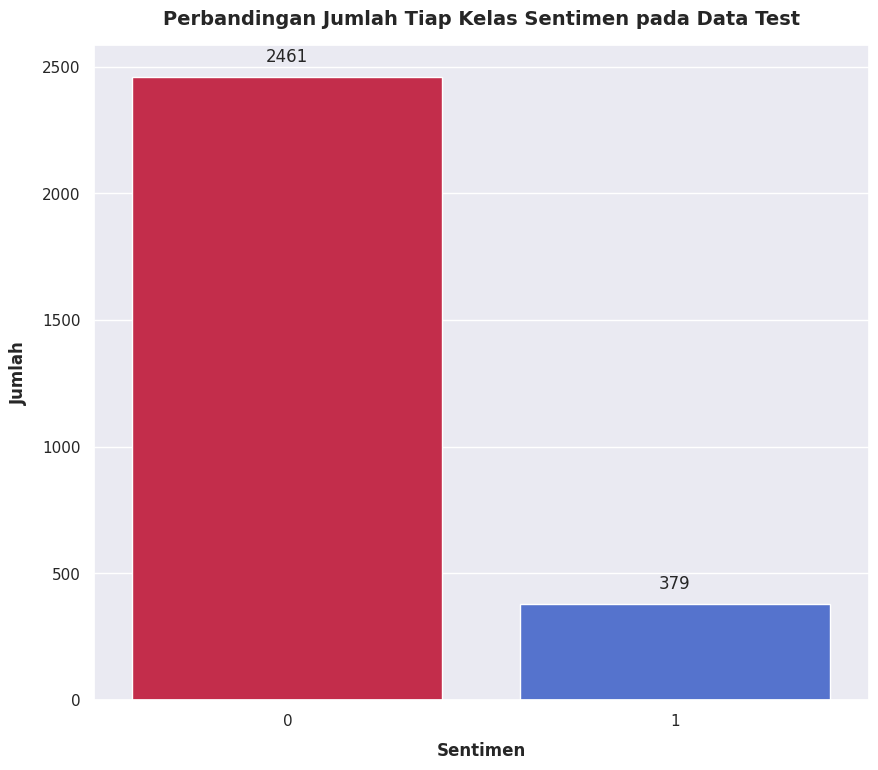

In [ ]:
# Diagram batang perbandingan jumlah tiap kelas pada data test
fig, ax = plt.subplots(figsize=(10, 8.5))
bars = sns.countplot(x=test_Y["sentiment_by_rating"], palette=['crimson', 'royalblue'])

# Menyesuaikan judul agar tebal
plt.title("Perbandingan Jumlah Tiap Kelas Sentimen pada Data Test", fontweight="bold", fontsize=14, pad=15)

# Menyesuaikan label sumbu agar lebih jelas
plt.xlabel("Sentimen", fontweight="bold", fontsize=12, labelpad=10)
plt.ylabel("Jumlah", fontweight="bold", fontsize=12, labelpad=10)
plt.xticks(rotation=0)

# Menampilkan label nilai di atas batang dengan padding lebih besar
for bar in bars.containers:
    bars.bar_label(bar, fmt='%d', label_type='edge', padding=8, fontsize=12)

plt.show()


In [ ]:
#Melakukan penanganan kelas tidak seimbang dengan melakukan oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
train_X, train_Y = oversample.fit_resample(train_X, train_Y)

<ipython-input-43-e25d1c51b4ad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(x=train_Y["sentiment_by_rating"], palette=['crimson', 'royalblue'])


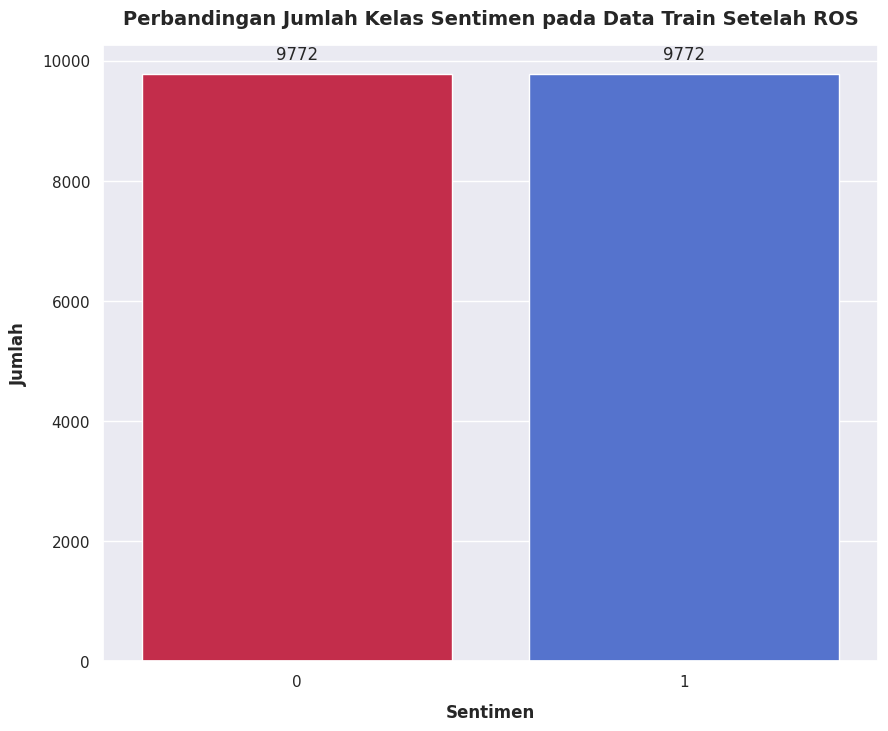

In [ ]:
# Diagram batang perbandingan jumlah tiap kelas pada data test
fig, ax = plt.subplots(figsize=(10, 8))
bars = sns.countplot(x=train_Y["sentiment_by_rating"], palette=['crimson', 'royalblue'])

# Menyesuaikan judul agar tebal
plt.title("Perbandingan Jumlah Kelas Sentimen pada Data Train Setelah ROS", fontweight="bold", fontsize=14, pad=15)

# Menyesuaikan label sumbu agar lebih jelas
plt.xlabel("Sentimen", fontweight="bold", fontsize=12, labelpad=10)
plt.ylabel("Jumlah", fontweight="bold", fontsize=12, labelpad=10)
plt.xticks(rotation=0)

# Menampilkan label nilai di atas batang dengan padding lebih besar
for bar in bars.containers:
    bars.bar_label(bar, fmt='%d', label_type='edge', padding=8, fontsize=12)

plt.show()


In [ ]:
#Memeriksa dimensi data latih setelah proses oversampling
print(train_X.shape, train_Y.shape)

(19544, 1) (19544, 1)


In [ ]:
#Memeriksa dimensi data latih setelah proses oversampling
print(test_X.shape, test_Y.shape)

(2840, 1) (2840, 1)


## Feature Extraction Data Balanced


##Tokenisasi

In [ ]:
#Memuat fungsi yang diperlukan
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import pad_sequences
import codecs
from tqdm import tqdm

In [ ]:
#Mendefinisikan fungsi tokenisasi
tokenizer = RegexpTokenizer(r'\w+')
#Mengubah kolom ulasan menjadi list untuk diolah
train_docs_X = train_X['review'].tolist()
test_docs_X = test_X['review'].tolist()


In [ ]:
#Mendefinisikan maksimum jumlah kata yang akan ditokenisasi
max_num_words = 1000
#Melakukan tokenisasi
tokenizer = Tokenizer(num_words=max_num_words, lower=True, char_level=False)
tokenizer.fit_on_texts(train_docs_X + test_docs_X)
word_seq_train = tokenizer.texts_to_sequences(train_docs_X)
word_seq_test = tokenizer.texts_to_sequences(test_docs_X)
word_index = tokenizer.word_index


##Padding Sequences

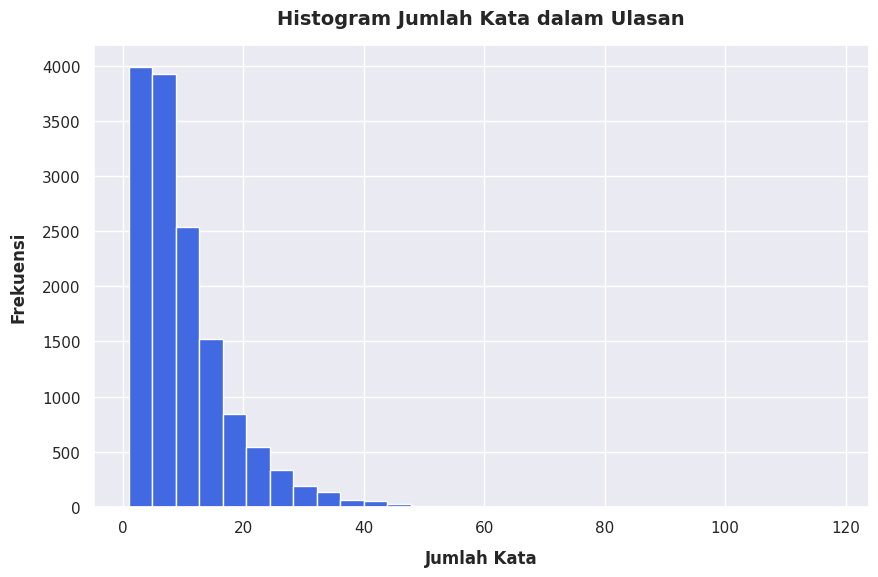

In [ ]:
# Histogram jumlah kata dalam ulasan
fig, ax = plt.subplots(figsize=(10, 6))
review_len = df['review'].str.split().map(len)

# Membuat histogram dengan warna royalblue
plt.hist(x=review_len, bins=30, color="royalblue")

# Mengatur judul agar lebih jelas
plt.title('Histogram Jumlah Kata dalam Ulasan', fontweight="bold", fontsize=14, pad=15)

# Mengatur label sumbu
plt.xlabel("Jumlah Kata", fontweight="bold", fontsize=12, labelpad=10)
plt.ylabel("Frekuensi", fontweight="bold", fontsize=12, labelpad=10)

plt.show()


In [ ]:
maxlen = 40
word_seq_train = pad_sequences(word_seq_train, maxlen=maxlen, padding='post')
word_seq_test = pad_sequences(word_seq_test, maxlen=maxlen, padding='post')

In [ ]:
# Membuat corpus untuk analisis kata
corpus = {}
for review in train_docs_X:
    for word in review.split():
        corpus[word] = corpus.get(word, 0) + 1
corpus = sorted(corpus.items(), key=lambda x: x[1], reverse=True)

words = [word for word, count in corpus]
word_counts = [count for word, count in corpus]

<ipython-input-52-785c2663d416>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x_vals, y=sum_words, palette=colors)


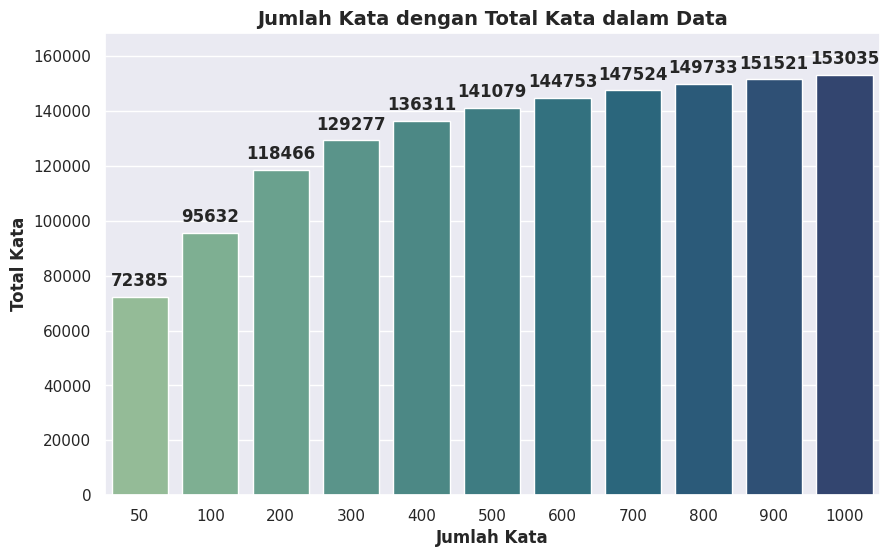

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat corpus untuk analisis kata
corpus = {}
for review in train_docs_X:
    for word in review.split():
        corpus[word] = corpus.get(word, 0) + 1
# Urutkan berdasar frekuensi
corpus = sorted(corpus.items(), key=lambda x: x[1], reverse=True)

words = [word for word, count in corpus]
word_counts = [count for word, count in corpus]

# Menghitung total kata untuk beberapa nilai 'num'
x_vals = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
sum_words = [sum(word_counts[:num]) for num in x_vals]

# Mengatur tema dan ukuran gambar dengan Seaborn
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(10,6)})

# Membuat palet gradasi biru dengan jumlah warna sesuai jumlah batang
colors = sns.color_palette("crest", n_colors=len(x_vals))

# Membuat barplot
ax = sns.barplot(x=x_vals, y=sum_words, palette=colors)

# Menambahkan label di atas tiap batang
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5, fontweight="bold")
    ax.set_ylim(top=1.1 * max(sum_words))


# Menambahkan judul dan label sumbu (bold)
ax.set_title("Jumlah Kata dengan Total Kata dalam Data", fontweight="bold", fontsize=14)
ax.set_xlabel("Jumlah Kata", fontweight="bold", fontsize=12)
ax.set_ylabel("Total Kata", fontweight="bold", fontsize=12)

plt.show()


##FastText Word Embedding

In [ ]:
#Memuat library dan fungsi yang diperlukan
import codecs
from tqdm import tqdm

In [ ]:
#Memuat vector untuk FastText Word Embedding
embeddings_index = {}
f = codecs.open(f"{folder_path}/cc.id.300.vec",
encoding='utf-8')
for line in tqdm(f):
 values = line.rstrip().rsplit(' ')
 word = values[0]
 coefs = np.asarray(values[1:], dtype='float32')
 embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

2000001it [03:23, 9851.45it/s] 

found 2000000 word vectors


In [ ]:
#Membuat matrix untuk pembobotan tiap kata menggunakan FastText
nb_words = 1000
#Untuk dimensi vektor representasi kata 200
words_not_found2 = []
embed_dim = 200
embedding_matrix2 = np.zeros((nb_words, embed_dim))

for word, i in word_index.items():
  if i >= nb_words:
    continue
  embedding_vector = embeddings_index.get(word)

  if (embedding_vector is not None) and len(embedding_vector) > 0:
    # words not found in embedding index will be all-zeros.
    embedding_matrix2[i] = embedding_vector[:embed_dim]
  else:
    words_not_found2.append(word)

print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix2, axis=1) == 0))

number of null word embeddings: 14


In [ ]:
#Untuk dimensi vektor representasi kata 300
words_not_found3 = []
embed_dim = 300
embedding_matrix3 = np.zeros((nb_words, embed_dim))

for word, i in word_index.items():
  if i >= nb_words:
    continue
    embedding_vector = embeddings_index.get(word)
  if (embedding_vector is not None) and len(embedding_vector) > 0:
    # words not found in embedding index will be all-zeros.
    embedding_matrix3[i] = embedding_vector[:embed_dim]
  else:
    words_not_found3.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix3, axis=1) == 0))

number of null word embeddings: 1


In [ ]:
print("Max index in word_seq_train:", np.max(word_seq_train))
print("Max index in word_seq_test:", np.max(word_seq_test))


Max index in word_seq_train: 999
Max index in word_seq_test: 998


# Pemodelan RNN

In [ ]:
#Memuat beberapa library dan fungsi yang diperlukan
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Reshape, Dense, GRU, Embedding, LSTM, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping

## RNN untuk parameter output dim 200

In [ ]:
# Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_rnn1 = []
pred_train_rnn1 = []
eval_test_rnn1 = []

# Melakukan iterasi untuk pemodelan RNN dengan dimensi output 200
for num in [16, 32,64,128]:
  model_rnn1 = Sequential()
  model_rnn1.add(Embedding(input_dim=500, output_dim=200,weights=[embedding_matrix2], input_length=40))
  model_rnn1.add(SimpleRNN(num))
  model_rnn1.add(Dense(1, activation='sigmoid'))
  model_rnn1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
  callbacks_list = [es]

  hist_rnn1 = model_rnn1.fit(word_seq_train, train_Y, batch_size=256, epochs=10, callbacks=callbacks_list, validation_data=(word_seq_test, test_Y), shuffle=True, verbose=1)

  yhat_rnn1 = model_rnn1.predict(word_seq_test, batch_size = 256)
  pred_train1 = model_rnn1.predict(word_seq_train, batch_size = 256)
  metrics_rnn1 = [
    accuracy_score(test_Y, np.round(yhat_rnn1, 0)),
    f1_score(test_Y, np.round(yhat_rnn1, 0), average="macro"),  # Menggunakan average="macro"
    f1_score(test_Y, np.round(yhat_rnn1, 0), average="weighted")  # Menggunakan average="weighted"
    ]

  pred_train_rnn1.append(pred_train1)
  pred_test_rnn1.append(yhat_rnn1)
  eval_test_rnn1.append(metrics_rnn1)

# Melihat hasil performa klasifikasi
eval_test_rnn1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.6957 - loss: 0.5908 - val_accuracy: 0.8550 - val_loss: 0.3708
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8510 - loss: 0.3620 - val_accuracy: 0.9155 - val_loss: 0.2494
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8810 - loss: 0.2987 - val_accuracy: 0.8797 - val_loss: 0.2857
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9126 - loss: 0.2416 - val_accuracy: 0.8653 - val_loss: 0.3034
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9219 - loss: 0.2217 - val_accuracy: 0.8969 - val_loss: 0.2586
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9367 - loss: 0.1896 - val_accuracy: 0.8942 - val_loss: 0.2606
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9465 - loss: 0.1681 - val_accuracy: 0.8914 - val_loss: 0.2665
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9584 - loss: 0.1401 - val_accuracy: 0.8955 - v

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.6815 - loss: 0.5871 - val_accuracy: 0.8577 - val_loss: 0.3622
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8621 - loss: 0.3298 - val_accuracy: 0.9052 - val_loss: 0.2544
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9093 - loss: 0.2519 - val_accuracy: 0.8983 - val_loss: 0.2783
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9229 - loss: 0.2114 - val_accuracy: 0.8969 - val_loss: 0.2604
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9461 - loss: 0.1638 - val_accuracy: 0.8928 - val_loss: 0.2733
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9548 - loss: 0.1403 - val_accuracy: 0.8838 - val_loss: 0.2920
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9599 - loss: 0.1243 - val_accuracy: 0.8976 - val_loss: 0.2777
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9635 - loss: 0.1077 - val_accuracy: 0.8935 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.6949 - loss: 0.5596 - val_accuracy: 0.8893 - val_loss: 0.2855
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8751 - loss: 0.2944 - val_accuracy: 0.9113 - val_loss: 0.2339
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9192 - loss: 0.2244 - val_accuracy: 0.8838 - val_loss: 0.2684
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9363 - loss: 0.1664 - val_accuracy: 0.9134 - val_loss: 0.2274
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9533 - loss: 0.1344 - val_accuracy: 0.8962 - val_loss: 0.2727
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9597 - loss: 0.1131 - val_accuracy: 0.9031 - val_loss: 0.2763
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9724 - loss: 0.0915 - val_accuracy: 0.8990 - val_loss: 0.3012
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9694 - loss: 0.0909 - val_accuracy: 0.9045 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.7016 - loss: 0.5473 - val_accuracy: 0.8708 - val_loss: 0.3002
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.8802 - loss: 0.2920 - val_accuracy: 0.9120 - val_loss: 0.2387
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9197 - loss: 0.2179 - val_accuracy: 0.9052 - val_loss: 0.2487
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9486 - loss: 0.1448 - val_accuracy: 0.8976 - val_loss: 0.2753
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.9553 - loss: 0.1297 - val_accuracy: 0.8722 - val_loss: 0.3497
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.9275 - loss: 0.1993 - val_accuracy: 0.8797 - val_loss: 0.3608
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9418 - loss: 0.1577 - val_accuracy: 0.8729 - val_loss: 0.3338
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - accuracy: 0.9611 - loss: 0.1128 - val_accuracy: 0.8880 - val_l

[[0.8893470790378006, 0.8490159011705287, 0.8925113602800466],
 [0.8996563573883162, 0.8575580147839801, 0.9007207908296394],
 [0.8879725085910652, 0.8434398411986936, 0.8899810696203604],
 [0.8838487972508591, 0.8399518088286695, 0.8866715694722336]]

In [ ]:
#Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_rnn2 = []
pred_train_rnn2 = []
eval_test_rnn2 = []
#Melakukan iterasi untuk pemodelan RNN dengan dimensi output 300
for num in [16, 32,64,128]:
  model_rnn2 = Sequential()
  model_rnn2.add(Embedding(input_dim=500, output_dim=300, weights=[embedding_matrix3], input_length=maxlen))
  model_rnn2.add(SimpleRNN(num))
  model_rnn2.add(Dense(1, activation='sigmoid'))
  model_rnn2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
  callbacks_list = [es]

  hist_rnn2 = model_rnn2.fit(word_seq_train, train_Y, batch_size=256, epochs=10, callbacks=callbacks_list,
  validation_data=(word_seq_test, test_Y), shuffle=True, verbose=1)

  yhat_rnn2 = model_rnn2.predict(word_seq_test, batch_size = 256)
  pred_train2 = model_rnn2.predict(word_seq_train, batch_size = 256)

  metrics_rnn2 = [
      accuracy_score(test_Y, np.round(yhat_rnn2, 0)),
      f1_score(test_Y, np.round(yhat_rnn2, 0), average="macro"),  # Menggunakan average="macro"
      f1_score(test_Y, np.round(yhat_rnn2, 0), average="weighted")  # Menggunakan average="weighted"
      ]
  pred_train_rnn2.append(pred_train2)
  pred_test_rnn2.append(yhat_rnn2)
  eval_test_rnn2.append(metrics_rnn2)

#Melihat hasil performa klasifikasi
eval_test_rnn2

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.7015 - loss: 0.6208 - val_accuracy: 0.8529 - val_loss: 0.4159
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8395 - loss: 0.3890 - val_accuracy: 0.9086 - val_loss: 0.2791
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.8643 - loss: 0.3230 - val_accuracy: 0.8962 - val_loss: 0.2780
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9084 - loss: 0.2537 - val_accuracy: 0.9182 - val_loss: 0.2446
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9000 - loss: 0.2732 - val_accuracy: 0.8742 - val_loss: 0.3183
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9151 - loss: 0.2457 - val_accuracy: 0.8873 - val_loss: 0.2963
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9386 - loss: 0.2038 - val_accuracy: 0.8880 - val_loss: 0.2844
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9500 - loss: 0.1770 - val_accuracy: 0.8955 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.7289 - loss: 0.5558 - val_accuracy: 0.8742 - val_loss: 0.3274
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8727 - loss: 0.3059 - val_accuracy: 0.8818 - val_loss: 0.3167
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9117 - loss: 0.2517 - val_accuracy: 0.8852 - val_loss: 0.2943
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9359 - loss: 0.1843 - val_accuracy: 0.9093 - val_loss: 0.2511
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.9467 - loss: 0.1525 - val_accuracy: 0.8955 - val_loss: 0.2852
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9572 - loss: 0.1304 - val_accuracy: 0.8907 - val_loss: 0.2948
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9647 - loss: 0.1138 - val_accuracy: 0.8942 - val_loss: 0.2903
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9674 - loss: 0.1017 - val_accuracy: 0.8914 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.7371 - loss: 0.5357 - val_accuracy: 0.9113 - val_loss: 0.2534
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.8757 - loss: 0.3050 - val_accuracy: 0.8880 - val_loss: 0.2798
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.9248 - loss: 0.1951 - val_accuracy: 0.9038 - val_loss: 0.2402
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9461 - loss: 0.1505 - val_accuracy: 0.9024 - val_loss: 0.2594
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9562 - loss: 0.1242 - val_accuracy: 0.8976 - val_loss: 0.2802
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9661 - loss: 0.0978 - val_accuracy: 0.9086 - val_loss: 0.2747
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.9694 - loss: 0.0941 - val_accuracy: 0.8715 - val_loss: 0.3681
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9720 - loss: 0.0830 - val_accuracy: 0.8625 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - accuracy: 0.7033 - loss: 0.5565 - val_accuracy: 0.8646 - val_loss: 0.3107
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.8947 - loss: 0.2641 - val_accuracy: 0.9196 - val_loss: 0.2328
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9346 - loss: 0.1871 - val_accuracy: 0.8921 - val_loss: 0.2790
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.9526 - loss: 0.1344 - val_accuracy: 0.9045 - val_loss: 0.2646
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.9388 - loss: 0.1552 - val_accuracy: 0.8832 - val_loss: 0.3263
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.9525 - loss: 0.1292 - val_accuracy: 0.9010 - val_loss: 0.3009
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.9608 - loss: 0.1068 - val_accuracy: 0.8907 - val_loss: 0.3546
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.9720 - loss: 0.0798 - val_accuracy: 0.8942 - val_

[[0.89553264604811, 0.8541545766288579, 0.897454724111456],
 [0.8810996563573883, 0.8399147534853194, 0.8851735017634331],
 [0.881786941580756, 0.8359665037649181, 0.8842894882495014],
 [0.8907216494845361, 0.8463335461085711, 0.892367755619962]]

In [ ]:
#Menyimpan dan mengunduh hasil pemodelan pada data uji
pred_test_rnn = pd.DataFrame({'rnn1': pred_test_rnn1[0].tolist(),
                              'rnn2': pred_test_rnn1[1].tolist(),
                              'rnn3': pred_test_rnn1[2].tolist(),
                              'rnn4': pred_test_rnn1[3].tolist(),
                              'rnn5': pred_test_rnn2[0].tolist(),
                              'rnn6': pred_test_rnn2[1].tolist(),
                              'rnn7': pred_test_rnn2[2].tolist(),
                              'rnn8': pred_test_rnn2[3].tolist()})

pred_test_rnn.to_csv(f"{folder_path}/pred_test_rnn2.csv")

#Menyimpan dan mengunduh hasil pemodelan pada data latih
pred_train_rnn = pd.DataFrame({'rnn1': pred_train_rnn1[0].tolist(),
                               'rnn2': pred_train_rnn1[1].tolist(),
                               'rnn3': pred_train_rnn1[2].tolist(),
                               'rnn4': pred_train_rnn1[3].tolist(),
                               'rnn5': pred_train_rnn2[0].tolist(),
                               'rnn6': pred_train_rnn2[1].tolist(),
                               'rnn7': pred_train_rnn2[2].tolist(),
                               'rnn8': pred_train_rnn2[3].tolist()})
pred_train_rnn.to_csv(f"{folder_path}/pred_train_rnn2.csv")

## Model Terbaik RNN

In [ ]:
np.unique(test_Y)

array([0, 1])

In [ ]:
# Melihat hasil performa klasifikasi model RNN terbaik
print('\t\t\t\tClassification Metrics\n')
unique_labels = np.unique(test_Y)  # Mengambil hanya kelas yang muncul di test_Y

print(metrics.classification_report(test_Y,
                                    np.round(np.array(pred_test_rnn1[0])),
                                    target_names=[str(label) for label in unique_labels]))


				Classification Metrics

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1133
           1       0.71      0.84      0.77       322

    accuracy                           0.89      1455
   macro avg       0.83      0.87      0.85      1455
weighted avg       0.90      0.89      0.89      1455



Text(0.5, 1.0, 'Confussion Matrix - RNN\n')

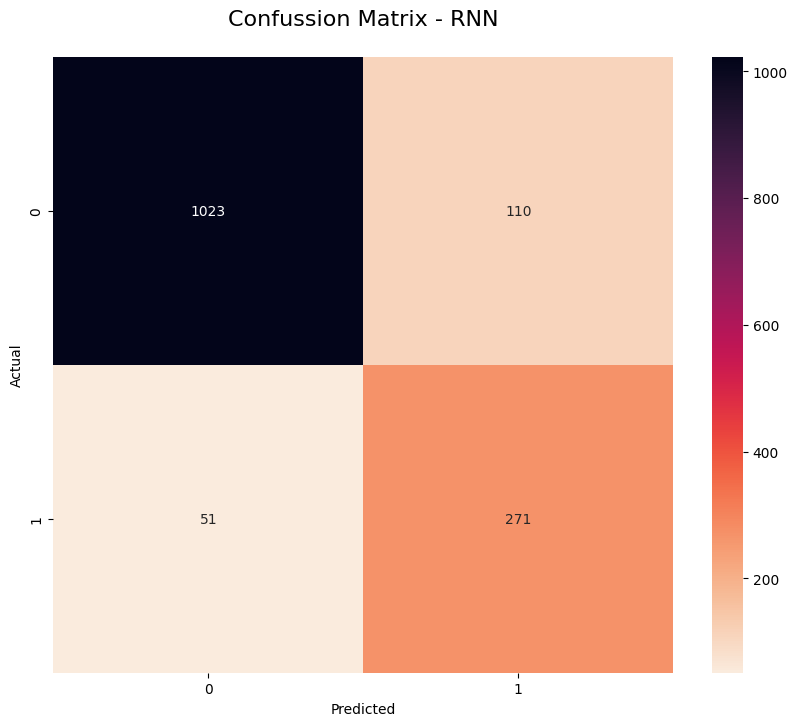

In [ ]:
# Melihat confussion matriks model RNN terbaik
conf_mat = confusion_matrix(test_Y, np.round(np.array(pred_test_rnn1[0])))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - RNN\n", size=16)

# LSTM

## LSTM Untuk parameter output dim 200

In [ ]:
# Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_lstm1 = []
pred_train_lstm1 = []
eval_test_lstm1 = []
histories_lstm1 = []  # Menyimpan history training untuk model LSTM (embedding dim=200)

# Mulai pengukuran waktu total
total_start_time_lstm1 = time.time()

# Melakukan iterasi untuk pemodelan LSTM dengan dimensi output 200
for num in [16, 32,64,128]:
  iteration_start_time_lstm1 = time.time()  # Mulai hitung waktu untuk iterasi saat ini
  model_lstm1 = Sequential()
  model_lstm1.add(Embedding(input_dim=1000,
                            output_dim=200,
                            weights=[embedding_matrix2]))
  model_lstm1.add(LSTM(num))
  model_lstm1.add(Dense(1, activation='sigmoid'))
  model_lstm1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
  callbacks_list = [es]

  hist_lstm1 = model_lstm1.fit(word_seq_train, train_Y,
                               batch_size=256,
                               epochs=10,
                               callbacks=callbacks_list,
                               validation_data=(word_seq_test, test_Y),
                               shuffle=True, verbose=1)
  histories_lstm1.append(hist_lstm1)  # Simpan history training


  yhat_lstm1 = model_lstm1.predict(word_seq_test, batch_size = 256)
  pred_lstm1 = model_lstm1.predict(word_seq_train, batch_size = 256)

  metrics_lstm1 = [accuracy_score(test_Y,np.round(yhat_lstm1,0)),
                   f1_score(test_Y,np.round(yhat_lstm1,0),pos_label=1),
                   f1_score(test_Y,np.round(yhat_lstm1,0),pos_label=0)]

  pred_train_lstm1.append(pred_lstm1)
  pred_test_lstm1.append(yhat_lstm1)
  eval_test_lstm1.append(metrics_lstm1)

  iteration_end_time_lstm1 = time.time()  # Akhiri hitung waktu untuk iterasi ini
  print(f"Model LSTM 200 dengan {num} unit membutuhkan waktu {iteration_end_time_lstm1 - iteration_start_time_lstm1:.2f} detik.")

total_end_time_lstm1 = time.time()
print(f"Total waktu pelatihan: {total_end_time_lstm1 - total_start_time_lstm1:.2f} detik.")

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5261 - loss: 0.6861 - val_accuracy: 0.6504 - val_loss: 0.6883
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7956 - loss: 0.5071 - val_accuracy: 0.8771 - val_loss: 0.4622
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8109 - loss: 0.4835 - val_accuracy: 0.6070 - val_loss: 0.5916
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7615 - loss: 0.5630 - val_accuracy: 0.8870 - val_loss: 0.4473
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7719 - loss: 0.5109 - val_accuracy: 0.8891 - val_loss: 0.4711
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7699 - loss: 0.5003 - val_accuracy: 0.8592 - val_loss: 0.5389
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8254 - loss: 0.4594 - val_accuracy: 0.7993 - val_loss: 0.5821
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7837 - loss: 0.5127 - val_accuracy: 0.8944 - val_lo

## Untuk parameter output dim 300

In [ ]:
# Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_lstm2 = []
pred_train_lstm2 = []
eval_test_lstm2 = []
histories_lstm2 = []  # Menyimpan history training untuk model LSTM (embedding dim=300)

# Mulai pengukurna waktu total
total_start_time_lstm2 = time.time()

# Melakukan iterasi untuk pemodelan LSTM dengan dimensi output 300
for num in [16, 32,64,128]:
  iteration_start_time_lstm2 = time.time()  # Mulai hitung waktu untuk iterasi saat ini
  model_lstm2 = Sequential()
  model_lstm2.add(Embedding(input_dim=1000,
                              output_dim=300,
                              weights=[embedding_matrix3]))
  model_lstm2.add(LSTM(num))
  model_lstm2.add(Dense(1, activation='sigmoid'))
  model_lstm2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
  callbacks_list = [es]

  hist_lstm2 = model_lstm2.fit(word_seq_train, train_Y,
                               batch_size=256,
                               epochs=10,
                               callbacks=callbacks_list,
                               validation_data=(word_seq_test, test_Y),
                               shuffle=True, verbose=1)
  histories_lstm2.append(hist_lstm2)  # Simpan history training

  yhat_lstm2 = model_lstm2.predict(word_seq_test, batch_size = 256)
  pred_lstm2 = model_lstm2.predict(word_seq_train, batch_size = 256)

  metrics_lstm2 = [accuracy_score(test_Y,np.round(yhat_lstm2,0)),
                   f1_score(test_Y,np.round(yhat_lstm2,0),pos_label=1),
                   f1_score(test_Y,np.round(yhat_lstm2,0),pos_label=0)]

  pred_train_lstm2.append(pred_lstm2)
  pred_test_lstm2.append(yhat_lstm2)
  eval_test_lstm2.append(metrics_lstm2)

  iteration_end_time_lstm2 = time.time()  # Akhiri hitung waktu untuk iterasi ini
  print(f"Model LSTM 300 dengan {num} unit membutuhkan waktu {iteration_end_time_lstm2 - iteration_start_time_lstm2:.2f} detik.")

total_end_time_lstm2 = time.time()
print(f"Total waktu pelatihan: {total_end_time_lstm2 - total_start_time_lstm2:.2f} detik.")

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5151 - loss: 0.6847 - val_accuracy: 0.8757 - val_loss: 0.5505
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7854 - loss: 0.5354 - val_accuracy: 0.8676 - val_loss: 0.4501
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8165 - loss: 0.4689 - val_accuracy: 0.8673 - val_loss: 0.4562
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8056 - loss: 0.4796 - val_accuracy: 0.5908 - val_loss: 0.7864
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7458 - loss: 0.5649 - val_accuracy: 0.7025 - val_loss: 0.5505
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7752 - loss: 0.5289 - val_accuracy: 0.7764 - val_loss: 0.4930
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7909 - loss: 0.5121 - val_accuracy: 0.7824 - val_loss: 0.5091
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7977 - loss: 0.5045 - val_accuracy: 0.8349 - val_loss

In [ ]:
# Menyimpan dan mengunduh hasil pemodelan pada data latih
pred_train_lstm = pd.DataFrame({'lstm1': pred_train_lstm1[0].tolist(),
                                'lstm2': pred_train_lstm1[1].tolist(),
                                'lstm3': pred_train_lstm1[2].tolist(),
                                'lstm4': pred_train_lstm1[3].tolist(),
                                'lstm5': pred_train_lstm2[0].tolist(),
                                'lstm6': pred_train_lstm2[1].tolist(),
                                'lstm7': pred_train_lstm2[2].tolist(),
                                'lstm8': pred_train_lstm2[3].tolist()})

pred_train_lstm.to_csv(f"{folder_path}/pred_train_lstm2.csv")

# Menyimpan dan mengunduh hasil pemodelan pada data uji
pred_test_lstm = pd.DataFrame({'lstm1': pred_test_lstm1[0].tolist(),
                               'lstm2': pred_test_lstm1[1].tolist(),
                               'lstm3': pred_test_lstm1[2].tolist(),
                               'lstm4': pred_test_lstm1[3].tolist(),
                               'lstm5': pred_test_lstm2[0].tolist(),
                               'lstm6': pred_test_lstm2[1].tolist(),
                               'lstm7': pred_test_lstm2[2].tolist(),
                               'lstm8': pred_test_lstm2[3].tolist()})
pred_test_lstm.to_csv(f"{folder_path}/pred_test_lstm2.csv")

## Model Terbaik LSTM

In [ ]:
# Melihat hasil performa klasifikasi dimensi output 200
print('Akurasi dan F1 Score dim 200')
eval_test_lstm1


Akurasi dan F1 Score dim 200


[[0.7911971830985915, 0.4935952177625961, 0.8684852517187847],
 [0.17112676056338028, 0.2425997425997426, 0.08475894245723173],
 [0.8661971830985915, 0.12844036697247707, 0.927536231884058],
 [0.8661971830985915, 0.5711060948081265, 0.9207342511472674]]

In [ ]:
# Melihat hasil performa klasifikasi dimensi output 300
print('Akurasi dan F1 Score dim 300')
eval_test_lstm2

Akurasi dan F1 Score dim 300


[[0.8915492957746479, 0.5837837837837838, 0.9376518218623482],
 [0.7732394366197183, 0.47811993517017826, 0.8551506972559604],
 [0.8545774647887324, 0.5657202944269191, 0.9126665256925354],
 [0.8690140845070422, 0.5753424657534246, 0.922564529558701]]


Best model info: LSTM (Embedding dim=200) with 16 units
Best validation loss: 0.3866179883480072


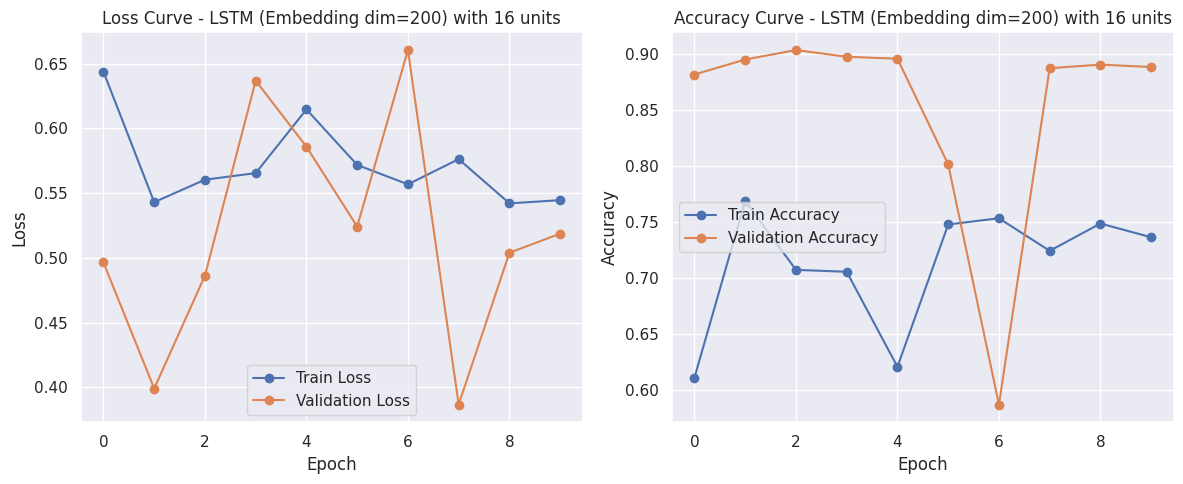


Classification Metrics for Best LSTM Model

              precision    recall  f1-score   support

           0    0.93156   0.94027   0.93589      2461
           1    0.58708   0.55145   0.56871       379

    accuracy                        0.88838      2840
   macro avg    0.75932   0.74586   0.75230      2840
weighted avg    0.88559   0.88838   0.88689      2840



Text(0.5, 1.0, 'Confussion Matrix - LSTM\n')

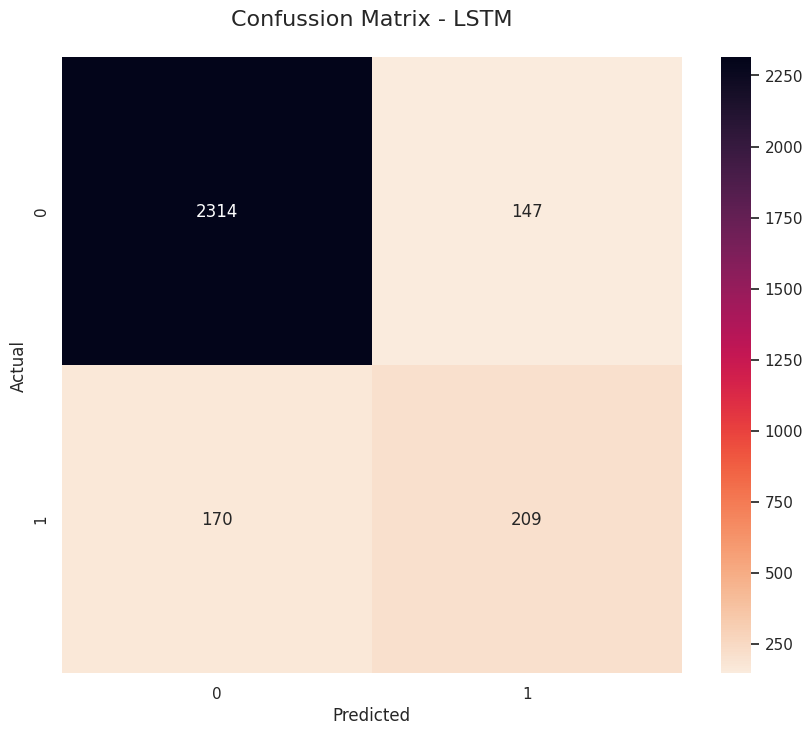

In [ ]:
import matplotlib.pyplot as plt

# Best Model (best model lstm adalah model dari pred_test_lstm1[0])
best_index = 3  # Model ke-4 dalam list (dengan unit: [16, 32, 64, 128][3] => 128 unit)
best_history = histories_lstm2[best_index]
best_val_loss = min(best_history.history['val_loss'])
best_model = pred_test_lstm2[best_index]
best_model_info = f"LSTM (Embedding dim=200) with {[16, 32, 64, 128][best_index]} units"

print("\nBest model info:", best_model_info)
print("Best validation loss:", best_val_loss)

# --- Plotting grafik Loss dan Accuracy ---
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title(f'Loss Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title(f'Accuracy Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best LSTM Model\n')
unique_labels = np.unique(test_Y)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))


# Melihat confussion matrix model LSTM terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - LSTM\n", size=16)


# BiLSTM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

## BiLSTM dengan embedding output dim 200

In [ ]:
# List untuk menyimpan hasil pemodelan
pred_test_bilstm1 = []
pred_train_bilstm1 = []
eval_test_bilstm1 = []
histories_bilstm1 = []  # Menyimpan history training untuk model LSTM (embedding dim=200)

# Mulai pengukuran waktu total
total_start_time_bilstm1 = time.time()

# Melakukan iterasi untuk pemodelan LSTM dengan dimensi output 200

# BiLSTM dengan embedding output dim 200
for num in [16, 32, 64, 128]:
    iteration_start_time_bilstm1 = time.time()  # Mulai hitung waktu
    model_bilstm1 = Sequential()
    model_bilstm1.add(Embedding(input_dim=1000,
                                output_dim=200,
                                weights=[embedding_matrix2]))
    model_bilstm1.add(Bidirectional(LSTM(num)))
    model_bilstm1.add(Dense(1, activation='sigmoid'))
    model_bilstm1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
    callbacks_list = [es]

    hist_bilstm1 = model_bilstm1.fit(word_seq_train, train_Y,
                                     batch_size=256,
                                     epochs=10,
                                     callbacks=callbacks_list,
                                     validation_data=(word_seq_test, test_Y),
                                     shuffle=True, verbose=1)
    histories_bilstm1.append(hist_lstm1)  # Simpan history training

    yhat_bilstm1 = model_bilstm1.predict(word_seq_test, batch_size=256)
    pred_bilstm1 = model_bilstm1.predict(word_seq_train, batch_size=256)

    metrics_bilstm1 = [accuracy_score(test_Y, np.round(yhat_bilstm1, 0)),
                       f1_score(test_Y, np.round(yhat_bilstm1, 0), pos_label=1),
                       f1_score(test_Y, np.round(yhat_bilstm1, 0), pos_label=0)]

    pred_train_bilstm1.append(pred_bilstm1)
    pred_test_bilstm1.append(yhat_bilstm1)
    eval_test_bilstm1.append(metrics_bilstm1)

    iteration_end_time_bilstm1 = time.time()  # Akhiri hitung waktu untuk iterasi ini
    print(f"Model BiLSTM 200 dengan {num} unit membutuhkan waktu {iteration_end_time_bilstm1 - iteration_start_time_bilstm1:.2f} detik.")

total_end_time_bilstm1 = time.time()
print(f"Total waktu pelatihan: {total_end_time_bilstm1 - total_start_time_bilstm1:.2f} detik.")

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7279 - loss: 0.5918 - val_accuracy: 0.8665 - val_loss: 0.3604
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8508 - loss: 0.3571 - val_accuracy: 0.8560 - val_loss: 0.3643
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8805 - loss: 0.2955 - val_accuracy: 0.8486 - val_loss: 0.3598
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8997 - loss: 0.2616 - val_accuracy: 0.8560 - val_loss: 0.3566
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9105 - loss: 0.2352 - val_accuracy: 0.8690 - val_loss: 0.3513
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9184 - loss: 0.2172 - val_accuracy: 0.8514 - val_loss: 0.3785
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9295 - loss: 0.1914 - val_accuracy: 0.8676 - val_loss: 0.3817
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9338 - loss: 0.1843 - val_accuracy: 0.8662 - v

## BiLSTM dengan embedding output dim 300

In [ ]:
# BiLSTM dengan embedding output dim 300
pred_test_bilstm2 = []
pred_train_bilstm2 = []
eval_test_bilstm2 = []
histories_bilstm2 = []  # Menyimpan history training untuk model BiLSTM (embedding dim=300)

# Mulai pengukuran waktu total
total_start_time_bilstm2 = time.time()

# Melakukan iterasi untuk pemodelan LSTM dengan dimensi output 300
for num in [16, 32, 64, 128]:
    iteration_start_time_bilstm2 = time.time()  # Mulai hitung waktu
    model_bilstm2 = Sequential()
    model_bilstm2.add(Embedding(input_dim=1000,
                                output_dim=300,
                                weights=[embedding_matrix3]))
    model_bilstm2.add(Bidirectional(LSTM(num)))
    model_bilstm2.add(Dense(1, activation='sigmoid'))
    model_bilstm2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
    callbacks_list = [es]

    hist_bilstm2 = model_bilstm2.fit(word_seq_train, train_Y,
                                     batch_size=256,
                                     epochs=10,
                                     callbacks=callbacks_list,
                                     validation_data=(word_seq_test, test_Y),
                                     shuffle=True, verbose=1)
    histories_bilstm2.append(hist_lstm2)  # Simpan history training

    yhat_bilstm2 = model_bilstm2.predict(word_seq_test, batch_size=256)
    pred_bilstm2 = model_bilstm2.predict(word_seq_train, batch_size=256)

    metrics_bilstm2 = [accuracy_score(test_Y, np.round(yhat_bilstm2, 0)),
                       f1_score(test_Y, np.round(yhat_bilstm2, 0), pos_label=1),
                       f1_score(test_Y, np.round(yhat_bilstm2, 0), pos_label=0)]

    pred_train_bilstm2.append(pred_bilstm2)
    pred_test_bilstm2.append(yhat_bilstm2)
    eval_test_bilstm2.append(metrics_bilstm2)

    iteration_end_time_bilstm2 = time.time()  # Akhiri hitung waktu untuk iterasi ini
    print(f"Model BiLSTM 300 dengan {num} unit membutuhkan waktu {iteration_end_time_bilstm2 - iteration_start_time_bilstm2:.2f} detik.")

total_end_time_bilstm2 = time.time()
print(f"Total waktu pelatihan: {total_end_time_bilstm2 - total_start_time_bilstm2:.2f} detik.")

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7109 - loss: 0.5636 - val_accuracy: 0.8574 - val_loss: 0.3575
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8640 - loss: 0.3298 - val_accuracy: 0.8824 - val_loss: 0.3100
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8931 - loss: 0.2761 - val_accuracy: 0.8366 - val_loss: 0.3905
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9124 - loss: 0.2349 - val_accuracy: 0.8616 - val_loss: 0.3617
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9232 - loss: 0.2095 - val_accuracy: 0.8704 - val_loss: 0.3495
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9266 - loss: 0.2027 - val_accuracy: 0.8687 - val_loss: 0.3593
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9322 - loss: 0.1902 - val_accuracy: 0.8644 - val_loss: 0.3759
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9334 - loss: 0.1736 - val_accuracy: 0.8746 - v

In [ ]:
# Menyimpan hasil prediksi pada data latih
pred_train_bilstm = pd.DataFrame({'bilstm1': pred_train_bilstm1[0].tolist(),
                                  'bilstm2': pred_train_bilstm1[1].tolist(),
                                  'bilstm3': pred_train_bilstm1[2].tolist(),
                                  'bilstm4': pred_train_bilstm1[3].tolist(),
                                  'bilstm5': pred_train_bilstm2[0].tolist(),
                                  'bilstm6': pred_train_bilstm2[1].tolist(),
                                  'bilstm7': pred_train_bilstm2[2].tolist(),
                                  'bilstm8': pred_train_bilstm2[3].tolist()})
pred_train_bilstm.to_csv(f"{folder_path}/pred_train_bilstm2.csv")

# Menyimpan hasil prediksi pada data uji
pred_test_bilstm = pd.DataFrame({'bilstm1': pred_test_bilstm1[0].tolist(),
                                 'bilstm2': pred_test_bilstm1[1].tolist(),
                                 'bilstm3': pred_test_bilstm1[2].tolist(),
                                 'bilstm4': pred_test_bilstm1[3].tolist(),
                                 'bilstm5': pred_test_bilstm2[0].tolist(),
                                 'bilstm6': pred_test_bilstm2[1].tolist(),
                                 'bilstm7': pred_test_bilstm2[2].tolist(),
                                 'bilstm8': pred_test_bilstm2[3].tolist()})
pred_test_bilstm.to_csv(f"{folder_path}/pred_test_bilstm2.csv")


## Model Terbaik BiLSTM

In [ ]:
# Melihat hasil performa klasifikasi dimensi output 200
print('Akurasi dan F1 Score dim 200')
eval_test_bilstm1


Akurasi dan F1 Score dim 200


[[0.8654929577464788, 0.5568445475638051, 0.9207139892071399],
 [0.8693661971830986, 0.5599051008303677, 0.9232995658465991],
 [0.8549295774647887, 0.5370786516853933, 0.9139874739039666],
 [0.8440140845070423, 0.5447070914696814, 0.9058848523475674]]

In [ ]:
# Melihat hasil performa klasifikasi dimensi output 300
print('Akurasi dan F1 Score dim 300')
eval_test_bilstm2

Akurasi dan F1 Score dim 300


[[0.8609154929577465, 0.5566778900112234, 0.9175193150970975],
 [0.8714788732394366, 0.5690672963400236, 0.9244775501758742],
 [0.8661971830985915, 0.5571095571095571, 0.9211945250933222],
 [0.8690140845070422, 0.5581947743467933, 0.9231087226126499]]


Best model info: BiLSTM (Embedding dim=300) with 32 units
Best validation loss: 0.34920555353164673


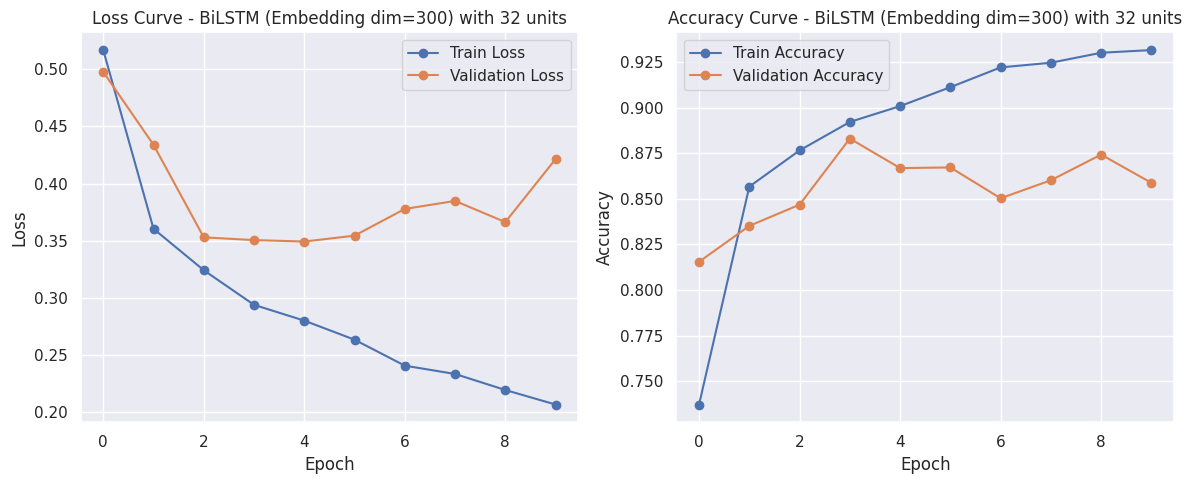


Classification Metrics for Best BiLSTM Model

              precision    recall  f1-score   support

           0    0.94182   0.90776   0.92448      2461
           1    0.51496   0.63588   0.56907       379

    accuracy                        0.87148      2840
   macro avg    0.72839   0.77182   0.74677      2840
weighted avg    0.88486   0.87148   0.87705      2840



Text(0.5, 1.0, 'Confussion Matrix - BiLSTM\n')

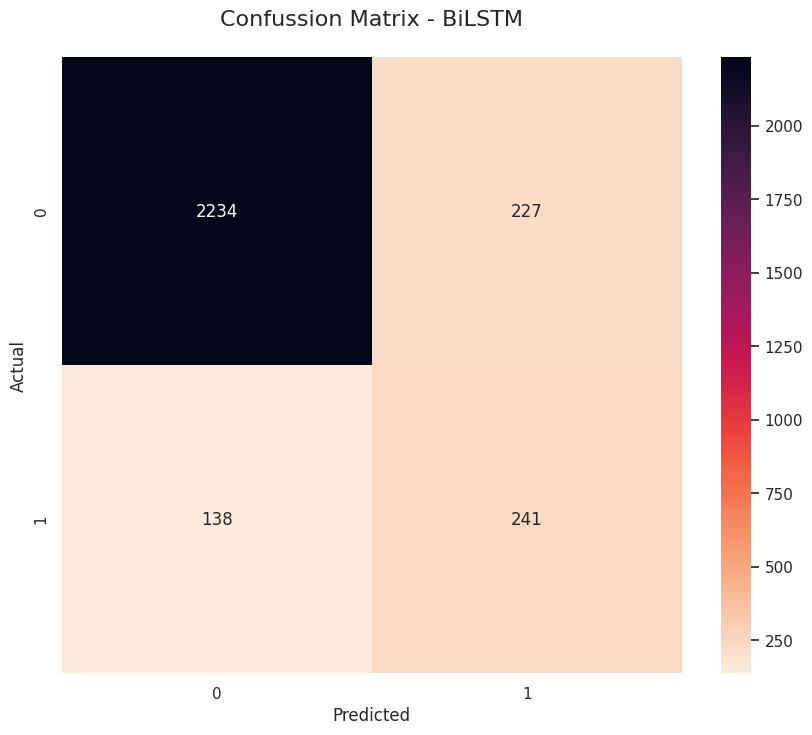

In [ ]:
import matplotlib.pyplot as plt

# Best Model (best model bilstm adalah model dari pred_test_bilstm2[1])
best_index = 1  # Model ke-2 dalam list (dengan unit: [16, 32, 64, 128][3] => 64 unit)
best_history = histories_bilstm2[best_index]
best_val_loss = min(best_history.history['val_loss'])
best_model = pred_test_bilstm2[best_index]
best_model_info = f"BiLSTM (Embedding dim=300) with {[16, 32, 64, 128][best_index]} units"

print("\nBest model info:", best_model_info)
print("Best validation loss:", best_val_loss)

# --- Plotting grafik Loss dan Accuracy ---
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title(f'Loss Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title(f'Accuracy Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best BiLSTM Model\n')
unique_labels = np.unique(test_Y)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))


# Melihat confussion matrix model BiLSTM terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - BiLSTM\n", size=16)


# CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

## CNN Untuk parameter output dim 200

In [ ]:
# Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_cnn1 = []
pred_train_cnn1 = []
eval_test_cnn1 = []
histories_cnn1 = []  # Menyimpan history training untuk model CNN (embedding dim=200)

# Mulai pengukuran waktu total
total_start_time_cnn1 = time.time()

# Melakukan iterasi untuk pemodelan CNN dengan jumlah filter berbeda
for num in [16, 32, 64, 128]:
  iteration_start_time_cnn1 = time.time()  # Mulai hitung waktu
  model_cnn1 = Sequential()
  model_cnn1.add(Embedding(input_dim=1000,
                            output_dim=200,
                            weights=[embedding_matrix2]))
  model_cnn1.add(Conv1D(filters=num, kernel_size=3, activation='relu'))
  model_cnn1.add(GlobalMaxPooling1D())
  model_cnn1.add(Dense(1, activation='sigmoid'))
  model_cnn1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
  callbacks_list = [es]

  hist_cnn1 = model_cnn1.fit(word_seq_train, train_Y,
                              batch_size=256,
                              epochs=10,
                              callbacks=callbacks_list,
                              validation_data=(word_seq_test, test_Y),
                              shuffle=True, verbose=1)
  histories_cnn1.append(hist_cnn1)  # Simpan history training


  yhat_cnn1 = model_cnn1.predict(word_seq_test, batch_size=256)
  pred_cnn1 = model_cnn1.predict(word_seq_train, batch_size=256)

  metrics_cnn1 = [accuracy_score(test_Y, np.round(yhat_cnn1, 0)),
                   f1_score(test_Y, np.round(yhat_cnn1, 0), pos_label=1),
                   f1_score(test_Y, np.round(yhat_cnn1, 0), pos_label=0)]

  pred_train_cnn1.append(pred_cnn1)
  pred_test_cnn1.append(yhat_cnn1)
  eval_test_cnn1.append(metrics_cnn1)

  iteration_end_time_cnn1 = time.time()  # Akhiri hitung waktu untuk iterasi ini
  print(f"Model CNN 200 dengan {num} unit membutuhkan waktu {iteration_end_time_cnn1 - iteration_start_time_cnn1:.2f} detik.")

total_end_time_cnn1 = time.time()
print(f"Total waktu pelatihan: {total_end_time_cnn1 - total_start_time_cnn1:.2f} detik.")

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.7446 - loss: 0.5938 - val_accuracy: 0.8539 - val_loss: 0.3598
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8517 - loss: 0.3475 - val_accuracy: 0.8757 - val_loss: 0.3160
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8847 - loss: 0.2824 - val_accuracy: 0.8613 - val_loss: 0.3300
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9038 - loss: 0.2423 - val_accuracy: 0.8620 - val_loss: 0.3297
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9240 - loss: 0.2025 - val_accuracy: 0.8694 - val_loss: 0.3236
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9395 - loss: 0.1757 - val_accuracy: 0.8641 - val_loss: 0.3404
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9474 - loss: 0.1543 - val_accuracy: 0.8673 - val_loss: 0.3580
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9557 - loss: 0.1336 - val_accuracy: 0.8665 - val_loss

## Untuk parameter output dim 300

In [ ]:
# Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_cnn2 = []
pred_train_cnn2 = []
eval_test_cnn2 = []
histories_cnn2 = []  # Menyimpan history training untuk model CNN (embedding dim=300)

# Mulai pengukuran waktu total
total_start_time_cnn2 = time.time()

# Melakukan iterasi untuk pemodelan CNN dengan jumlah filter berbeda
for num in [16, 32, 64, 128]:
  iteration_start_time_cnn2 = time.time()  # Mulai hitung waktu
  model_cnn2 = Sequential()
  model_cnn2.add(Embedding(input_dim=1000,
                            output_dim=300,
                            weights=[embedding_matrix3]))
  model_cnn2.add(Conv1D(filters=num, kernel_size=3, activation='relu'))
  model_cnn2.add(GlobalMaxPooling1D())
  model_cnn2.add(Dense(1, activation='sigmoid'))
  model_cnn2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
  callbacks_list = [es]

  hist_cnn2 = model_cnn2.fit(word_seq_train, train_Y,
                              batch_size=256,
                              epochs=10,
                              callbacks=callbacks_list,
                              validation_data=(word_seq_test, test_Y),
                              shuffle=True, verbose=1)
  histories_cnn2.append(hist_cnn2)  # Simpan history training

  yhat_cnn2 = model_cnn2.predict(word_seq_test, batch_size=256)
  pred_cnn2 = model_cnn2.predict(word_seq_train, batch_size=256)

  metrics_cnn2 = [accuracy_score(test_Y, np.round(yhat_cnn2, 0)),
                   f1_score(test_Y, np.round(yhat_cnn2, 0), pos_label=1),
                   f1_score(test_Y, np.round(yhat_cnn2, 0), pos_label=0)]

  pred_train_cnn2.append(pred_cnn2)
  pred_test_cnn2.append(yhat_cnn2)
  eval_test_cnn2.append(metrics_cnn2)

  iteration_end_time_cnn2 = time.time()  # Akhiri hitung waktu untuk iterasi ini
  print(f"Model CNN 300 dengan {num} unit membutuhkan waktu {iteration_end_time_cnn2 - iteration_start_time_cnn2:.2f} detik.")

total_end_time_cnn2 = time.time()
print(f"Total waktu pelatihan: {total_end_time_cnn2 - total_start_time_cnn2:.2f} detik.")

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7143 - loss: 0.5996 - val_accuracy: 0.8556 - val_loss: 0.3417
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8605 - loss: 0.3281 - val_accuracy: 0.8570 - val_loss: 0.3415
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8910 - loss: 0.2666 - val_accuracy: 0.8669 - val_loss: 0.3203
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9153 - loss: 0.2211 - val_accuracy: 0.8891 - val_loss: 0.2932
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9357 - loss: 0.1876 - val_accuracy: 0.8743 - val_loss: 0.3278
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9473 - loss: 0.1554 - val_accuracy: 0.8761 - val_loss: 0.3447
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9540 - loss: 0.1354 - val_accuracy: 0.8708 - val_loss: 0.3764
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9605 - loss: 0.1187 - val_accuracy: 0.8761 - val_loss

In [ ]:
# Menyimpan dan mengunduh hasil pemodelan pada data latih
pred_train_cnn = pd.DataFrame({'cnn1': pred_train_cnn1[0].tolist(),
                               'cnn2': pred_train_cnn1[1].tolist(),
                               'cnn3': pred_train_cnn1[2].tolist(),
                               'cnn4': pred_train_cnn1[3].tolist(),
                               'cnn5': pred_train_cnn2[0].tolist(),
                               'cnn6': pred_train_cnn2[1].tolist(),
                               'cnn7': pred_train_cnn2[2].tolist(),
                               'cnn8': pred_train_cnn2[3].tolist()})

pred_train_cnn.to_csv(f"{folder_path}/pred_train_cnn2.csv")

# Menyimpan dan mengunduh hasil pemodelan pada data uji
pred_test_cnn = pd.DataFrame({'cnn1': pred_test_cnn1[0].tolist(),
                              'cnn2': pred_test_cnn1[1].tolist(),
                              'cnn3': pred_test_cnn1[2].tolist(),
                              'cnn4': pred_test_cnn1[3].tolist(),
                              'cnn5': pred_test_cnn2[0].tolist(),
                              'cnn6': pred_test_cnn2[1].tolist(),
                              'cnn7': pred_test_cnn2[2].tolist(),
                              'cnn8': pred_test_cnn2[3].tolist()})

pred_test_cnn.to_csv(f"{folder_path}/pred_test_cnn2.csv")

## Model Terbaik CNN

In [ ]:
# Melihat hasil performa klasifikasi dimensi output 200
print('Akurasi dan F1 Score dim 200')
eval_test_cnn1

Akurasi dan F1 Score dim 200


[[0.8767605633802817, 0.5679012345679012, 0.9281314168377823],
 [0.8767605633802817, 0.5793269230769231, 0.9278052805280528],
 [0.8813380281690141, 0.5834363411619283, 0.9308150277150482],
 [0.8711267605633802, 0.5642857142857143, 0.9243801652892562]]

In [ ]:
# Melihat hasil performa klasifikasi dimensi output 300
print('Akurasi dan F1 Score dim 300')
eval_test_cnn2

Akurasi dan F1 Score dim 300


[[0.8746478873239436, 0.5637254901960784, 0.9268092105263158],
 [0.8686619718309859, 0.5543608124253285, 0.9229816229609746],
 [0.8933098591549296, 0.5921938088829072, 0.9386266963743164],
 [0.8809859154929578, 0.5666666666666667, 0.9310204081632653]]


Best model info: CNN (Embedding dim=300) with 64 units
Best validation loss: 0.32708609104156494


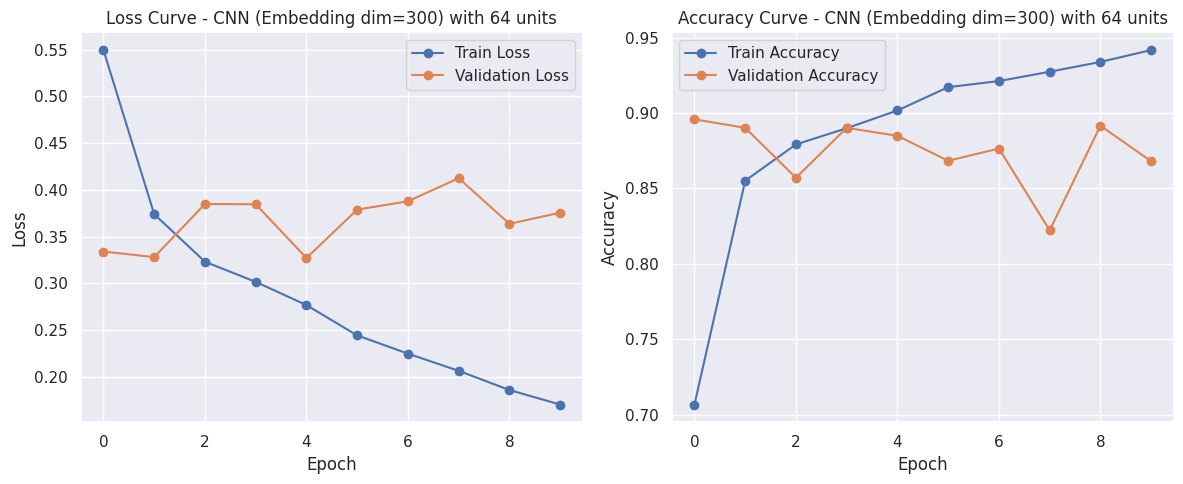


Classification Metrics for Best CNN Model

              precision    recall  f1-score   support

           0    0.93578   0.94149   0.93863      2461
           1    0.60440   0.58047   0.59219       379

    accuracy                        0.89331      2840
   macro avg    0.77009   0.76098   0.76541      2840
weighted avg    0.89156   0.89331   0.89239      2840



Text(0.5, 1.0, 'Confussion Matrix - CNN\n')

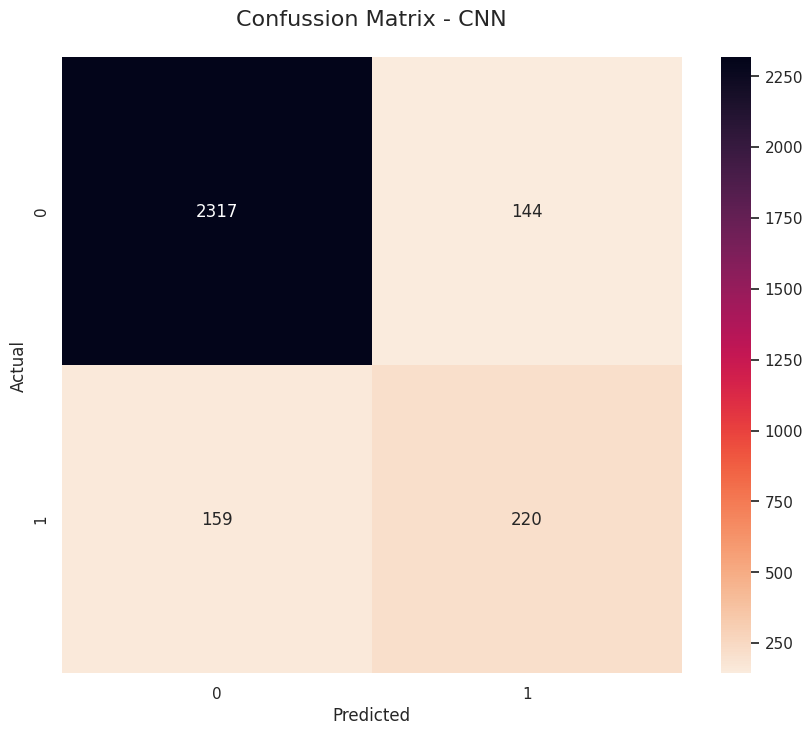

In [ ]:
import matplotlib.pyplot as plt

# Best Model (best model lstm adalah model dari pred_test_cnn2[2])
best_index = 2  # Model ke-0 dalam list (dengan unit: [16, 32, 64, 128][3] => 16 unit)
best_history = histories_lstm2[best_index]
best_val_loss = min(best_history.history['val_loss'])
best_model = pred_test_cnn2[best_index]
best_model_info = f"CNN (Embedding dim=300) with {[16, 32, 64, 128][best_index]} units"

print("\nBest model info:", best_model_info)
print("Best validation loss:", best_val_loss)

# --- Plotting grafik Loss dan Accuracy ---
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title(f'Loss Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title(f'Accuracy Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best CNN Model\n')
unique_labels = np.unique(test_Y)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))


# Melihat confussion matrix model CNN terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - CNN\n", size=16)



Best model info: CNN (Embedding dim=200) with 64 units
Best validation loss: 0.3045291304588318


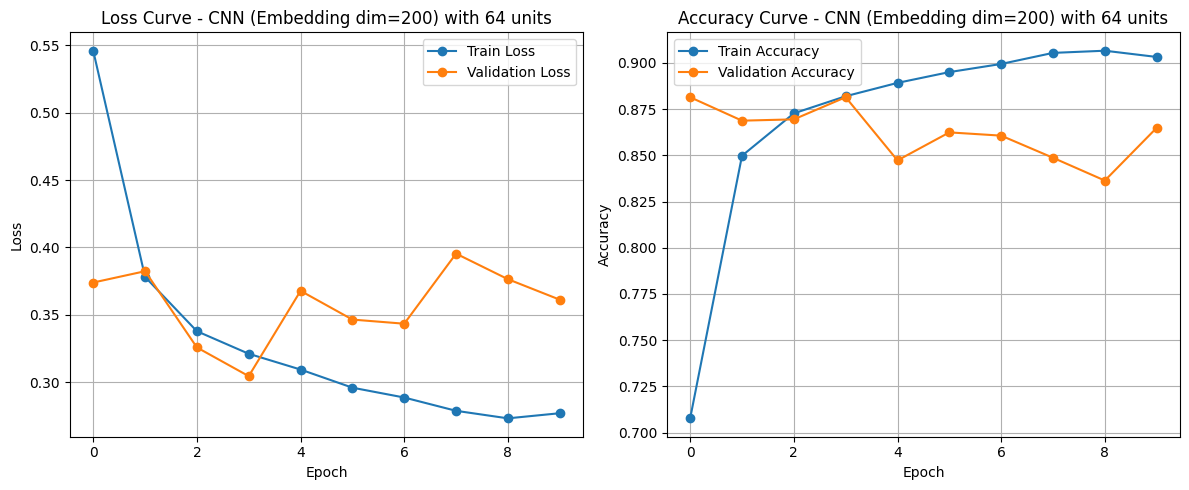


Classification Metrics for Best CNN Model

              precision    recall  f1-score   support

           0    0.93694   0.92744   0.93217      2467
           1    0.55138   0.58824   0.56921       374

    accuracy                        0.88279      2841
   macro avg    0.74416   0.75784   0.75069      2841
weighted avg    0.88618   0.88279   0.88438      2841



Text(0.5, 1.0, 'Confussion Matrix - CNN\n')

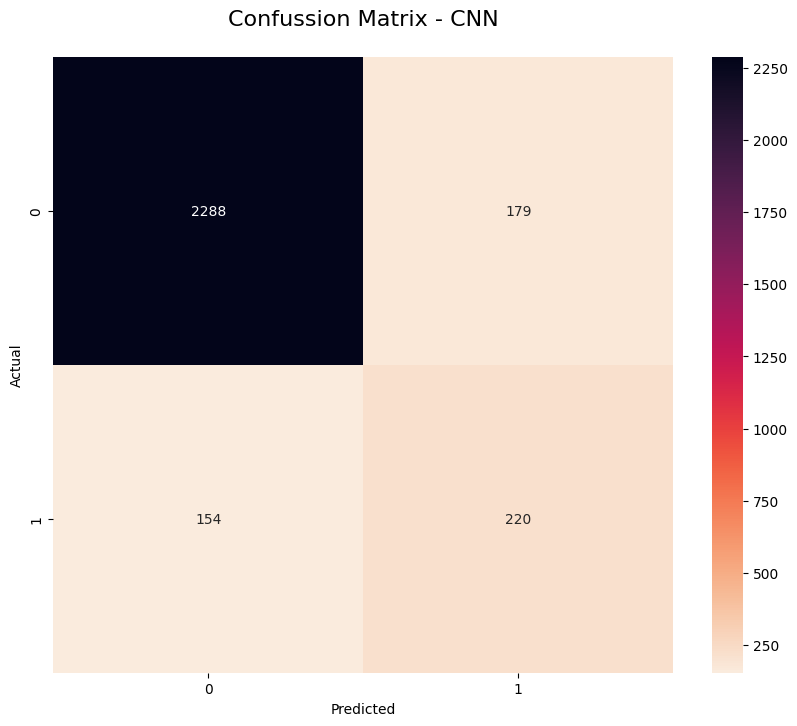

In [ ]:
import matplotlib.pyplot as plt

# Best Model (best model lstm adalah model dari pred_test_cnn1[2])
best_index = 2  # Model ke-0 dalam list (dengan unit: [16, 32, 64, 128][3] => 16 unit)
best_history = histories_lstm1[best_index]
best_val_loss = min(best_history.history['val_loss'])
best_model = pred_test_cnn1[best_index]
best_model_info = f"CNN (Embedding dim=200) with {[16, 32, 64, 128][best_index]} units"

print("\nBest model info:", best_model_info)
print("Best validation loss:", best_val_loss)

# --- Plotting grafik Loss dan Accuracy ---
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title(f'Loss Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title(f'Accuracy Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best CNN Model\n')
unique_labels = np.unique(test_Y)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))


# Melihat confussion matrix model CNN terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - CNN\n", size=16)


# CNN + LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

## CNN+LSTM dengan embedding output dim 200

In [ ]:
# List untuk menyimpan hasil
pred_test_cnnlstm1 = []
pred_train_cnnlstm1 = []
eval_test_cnnlstm1 = []
histories_cnnlstm1 = []

# Mulai pengukuran waktu total
total_start_time_cnnlstm1 = time.time()

# CNN+LSTM dengan output dimensi 200
for num in [16, 32, 64, 128]:
    iteration_start_time_cnnlstm1 = time.time()  # Mulai hitung waktu
    model_cnnlstm1 = Sequential()
    model_cnnlstm1.add(Embedding(input_dim=1000,
                                 output_dim=200,
                                 weights=[embedding_matrix2]))
    model_cnnlstm1.add(Conv1D(filters=num, kernel_size=3, activation='relu'))
    model_cnnlstm1.add(MaxPooling1D(pool_size=2))
    model_cnnlstm1.add(LSTM(num))
    model_cnnlstm1.add(Dense(1, activation='sigmoid'))
    model_cnnlstm1.compile(loss='binary_crossentropy',
                           optimizer='adam', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
    hist_cnnlstm1 = model_cnnlstm1.fit(word_seq_train, train_Y,
                                        batch_size=256, epochs=10,
                                        callbacks=[es],
                                        validation_data=(word_seq_test, test_Y),
                                        shuffle=True, verbose=1, class_weight=class_weight_dict)
    histories_cnnlstm1.append(hist_cnnlstm1)

    yhat_cnnlstm1 = model_cnnlstm1.predict(word_seq_test, batch_size=256)
    pred_cnnlstm1 = model_cnnlstm1.predict(word_seq_train, batch_size=256)

    metrics_cnnlstm1 = [accuracy_score(test_Y, np.round(yhat_cnnlstm1, 0)),
                        f1_score(test_Y, np.round(yhat_cnnlstm1, 0), pos_label=1),
                        f1_score(test_Y, np.round(yhat_cnnlstm1, 0), pos_label=0)]

    pred_train_cnnlstm1.append(pred_cnnlstm1)
    pred_test_cnnlstm1.append(yhat_cnnlstm1)
    eval_test_cnnlstm1.append(metrics_cnnlstm1)

    iteration_end_time_cnnlstm1 = time.time()  # Akhiri hitung waktu untuk iterasi ini
    print(f"Model CNN+LSTM 200 dengan {num} unit membutuhkan waktu {iteration_end_time_cnnlstm1 - iteration_start_time_cnnlstm1:.2f} detik.")

total_end_time_cnnlstm1 = time.time()
print(f"Total waktu pelatihan: {total_end_time_cnnlstm1 - total_start_time_cnnlstm1:.2f} detik.")

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5021 - loss: 0.9904 - val_accuracy: 0.1356 - val_loss: 1.2506
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5163 - loss: 0.6716 - val_accuracy: 0.6796 - val_loss: 0.9236
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8220 - loss: 0.4992 - val_accuracy: 0.7743 - val_loss: 0.8469
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8592 - loss: 0.4311 - val_accuracy: 0.8352 - val_loss: 0.7325
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9059 - loss: 0.3716 - val_accuracy: 0.7856 - val_loss: 0.7861
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9216 - loss: 0.3249 - val_accuracy: 0.8327 - val_loss: 0.7180
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9337 - loss: 0.2964 - val_accuracy: 0.8461 - val_loss: 0.6154
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9452 - loss: 0.2543 - val_accuracy: 0.8849 - val_l

## CNN+LSTM dengan embedding output dim 300

In [ ]:
# CNN+LSTM dengan output dimensi 300
pred_test_cnnlstm2 = []
pred_train_cnnlstm2 = []
eval_test_cnnlstm2 = []
histories_cnnlstm2 = []

# Mulai pengukuran waktu total
total_start_time_cnnlstm2 = time.time()

for num in [16, 32, 64, 128]:
    iteration_start_time_cnnlstm2 = time.time()  # Mulai hitung waktu
    model_cnnlstm2 = Sequential()
    model_cnnlstm2.add(Embedding(input_dim=1000,
                                 output_dim=300,
                                 weights=[embedding_matrix3]))
    model_cnnlstm2.add(Conv1D(filters=num, kernel_size=3, activation='relu'))
    model_cnnlstm2.add(MaxPooling1D(pool_size=2))
    model_cnnlstm2.add(LSTM(num))
    model_cnnlstm2.add(Dense(1, activation='sigmoid'))
    model_cnnlstm2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
    hist_cnnlstm2 = model_cnnlstm2.fit(word_seq_train, train_Y,
                                        batch_size=256, epochs=10,
                                        callbacks=[es],
                                        validation_data=(word_seq_test, test_Y),
                                        shuffle=True, verbose=1)
    histories_cnnlstm2.append(hist_cnnlstm2)

    yhat_cnnlstm2 = model_cnnlstm2.predict(word_seq_test, batch_size=256)
    pred_cnnlstm2 = model_cnnlstm2.predict(word_seq_train, batch_size=256)

    metrics_cnnlstm2 = [accuracy_score(test_Y, np.round(yhat_cnnlstm2, 0)),
                        f1_score(test_Y, np.round(yhat_cnnlstm2, 0), pos_label=1),
                        f1_score(test_Y, np.round(yhat_cnnlstm2, 0), pos_label=0)]

    pred_train_cnnlstm2.append(pred_cnnlstm2)
    pred_test_cnnlstm2.append(yhat_cnnlstm2)
    eval_test_cnnlstm2.append(metrics_cnnlstm2)

    iteration_end_time_cnnlstm2 = time.time()  # Akhiri hitung waktu untuk iterasi ini
    print(f"Model CNN+LSTM 300 dengan {num} unit membutuhkan waktu {iteration_end_time_cnnlstm2 - iteration_start_time_cnnlstm2:.2f} detik.")

total_end_time_cnnlstm2 = time.time()
print(f"Total waktu pelatihan: {total_end_time_cnnlstm2 - total_start_time_cnnlstm2:.2f} detik.")

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6155 - loss: 0.6580 - val_accuracy: 0.8606 - val_loss: 0.4088
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8426 - loss: 0.3984 - val_accuracy: 0.8750 - val_loss: 0.3551
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8864 - loss: 0.3064 - val_accuracy: 0.8806 - val_loss: 0.3293
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9164 - loss: 0.2494 - val_accuracy: 0.9053 - val_loss: 0.2864
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9268 - loss: 0.2190 - val_accuracy: 0.8831 - val_loss: 0.3518
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9448 - loss: 0.1878 - val_accuracy: 0.8746 - val_loss: 0.3895
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9547 - loss: 0.1647 - val_accuracy: 0.8961 - val_loss: 0.3376
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9528 - loss: 0.1632 - val_accuracy: 0.8887 - val_loss

In [ ]:
# Menyimpan hasil prediksi
pred_train_cnnlstm = pd.DataFrame({
    'cnn_lstm1': pred_train_cnnlstm1[0].tolist(),
    'cnn_lstm2': pred_train_cnnlstm1[1].tolist(),
    'cnn_lstm3': pred_train_cnnlstm1[2].tolist(),
    'cnn_lstm4': pred_train_cnnlstm1[3].tolist(),
    'cnn_lstm5': pred_train_cnnlstm2[0].tolist(),
    'cnn_lstm6': pred_train_cnnlstm2[1].tolist(),
    'cnn_lstm7': pred_train_cnnlstm2[2].tolist(),
    'cnn_lstm8': pred_train_cnnlstm2[3].tolist()
})
pred_train_cnnlstm.to_csv(f"{folder_path}/pred_train_cnnlstm2.csv")

pred_test_cnnlstm = pd.DataFrame({
    'cnn_lstm1': pred_test_cnnlstm1[0].tolist(),
    'cnn_lstm2': pred_test_cnnlstm1[1].tolist(),
    'cnn_lstm3': pred_test_cnnlstm1[2].tolist(),
    'cnn_lstm4': pred_test_cnnlstm1[3].tolist(),
    'cnn_lstm5': pred_test_cnnlstm2[0].tolist(),
    'cnn_lstm6': pred_test_cnnlstm2[1].tolist(),
    'cnn_lstm7': pred_test_cnnlstm2[2].tolist(),
    'cnn_lstm8': pred_test_cnnlstm2[3].tolist()
})
pred_test_cnnlstm.to_csv(f"{folder_path}/pred_test_cnnlstm2.csv")

## Model Terbaik CNN+LSTM

In [ ]:
# Melihat hasil performa klasifikasi dimensi output 200 ver 2
print('Akurasi dan F1 Score dim 200')
eval_test_cnnlstm1

Akurasi dan F1 Score dim 200


[[0.877112676056338, 0.572827417380661, 0.9282336006580301],
 [0.895774647887324, 0.5956284153005464, 0.9401778496362166],
 [0.9077464788732394, 0.6169590643274854, 0.9475580464371497],
 [0.9042253521126761, 0.6211699164345403, 0.9451833937928255]]

In [ ]:
print('Akurasi dan F1 Score dim 300')
eval_test_cnnlstm2

Akurasi dan F1 Score dim 300


[[0.8630281690140845, 0.5533869115958668, 0.9191100020794344],
 [0.8809859154929578, 0.5888077858880778, 0.9304240428159737],
 [0.879225352112676, 0.5717852684144819, 0.9296987087517934],
 [0.8950704225352113, 0.5972972972972973, 0.9396761133603239]]


Best model info: CNN+LSTM (Embedding dim=200) with 64 units
Best validation loss: 0.2864019274711609


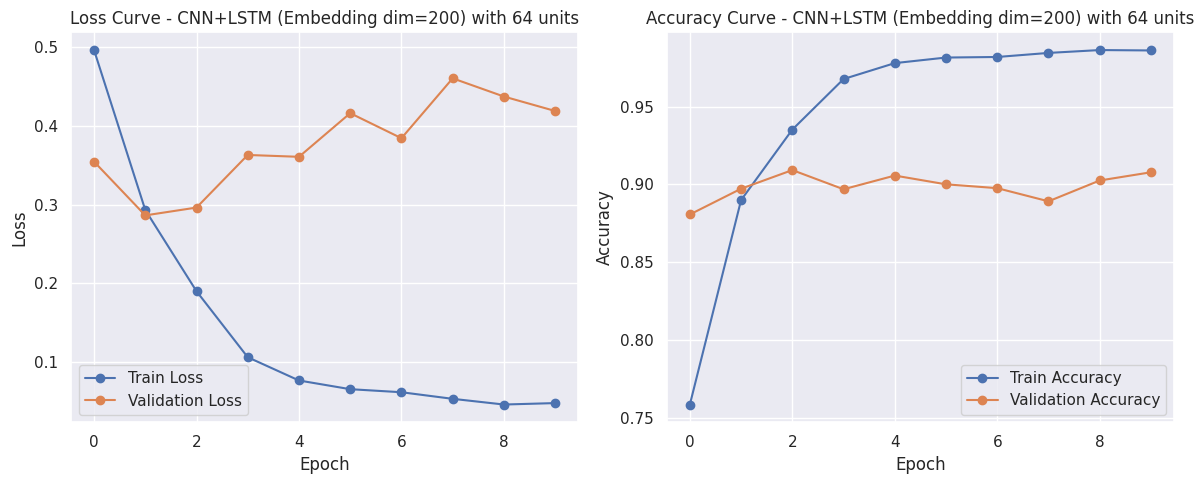


Classification Metrics for Best CNN+LSTM Model

              precision    recall  f1-score   support

           0    0.93373   0.96180   0.94756      2461
           1    0.69180   0.55673   0.61696       379

    accuracy                        0.90775      2840
   macro avg    0.81277   0.75927   0.78226      2840
weighted avg    0.90144   0.90775   0.90344      2840



Text(0.5, 1.0, 'Confussion Matrix - CNN+LSTM\n')

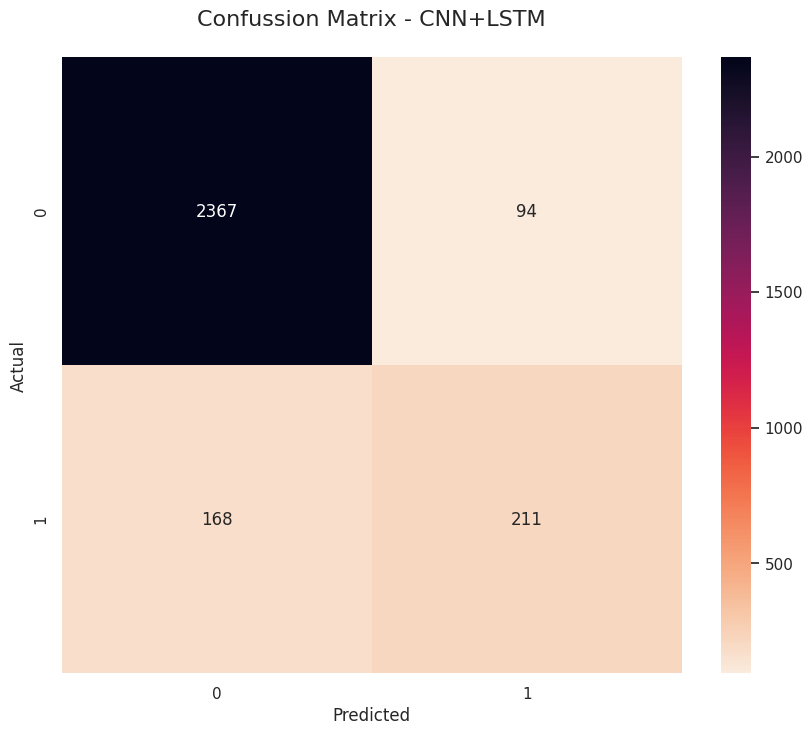

In [ ]:
import matplotlib.pyplot as plt

# Best Model (best model lstm adalah model dari pred_test_cnnlstm1[2])
best_index = 2  # Model ke-4 dalam list (dengan unit: [16, 32, 64, 128][3] => 128 unit)
best_history = histories_cnnlstm1[best_index]
best_val_loss = min(best_history.history['val_loss'])
best_model = pred_test_cnnlstm1[best_index]
best_model_info = f"CNN+LSTM (Embedding dim=200) with {[16, 32, 64, 128][best_index]} units"

print("\nBest model info:", best_model_info)
print("Best validation loss:", best_val_loss)

# --- Plotting grafik Loss dan Accuracy ---
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title(f'Loss Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title(f'Accuracy Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best CNN+LSTM Model\n')
unique_labels = np.unique(test_Y)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))


# Melihat confussion matrix model CNN+LSTM terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - CNN+LSTM\n", size=16)



Best model info: CNN+LSTM (Embedding dim=200) with 128 units
Best validation loss: 0.269336462020874


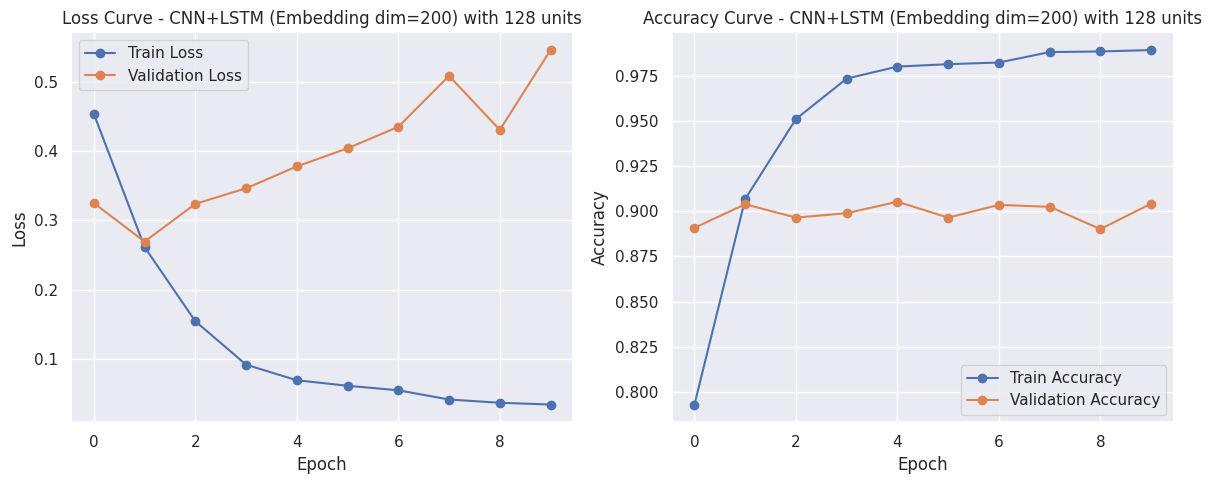


Classification Metrics for Best CNN+LSTM Model

              precision    recall  f1-score   support

           0    0.93762   0.95286   0.94518      2461
           1    0.65782   0.58839   0.62117       379

    accuracy                        0.90423      2840
   macro avg    0.79772   0.77063   0.78318      2840
weighted avg    0.90028   0.90423   0.90194      2840



Text(0.5, 1.0, 'Confussion Matrix - CNN+LSTM\n')

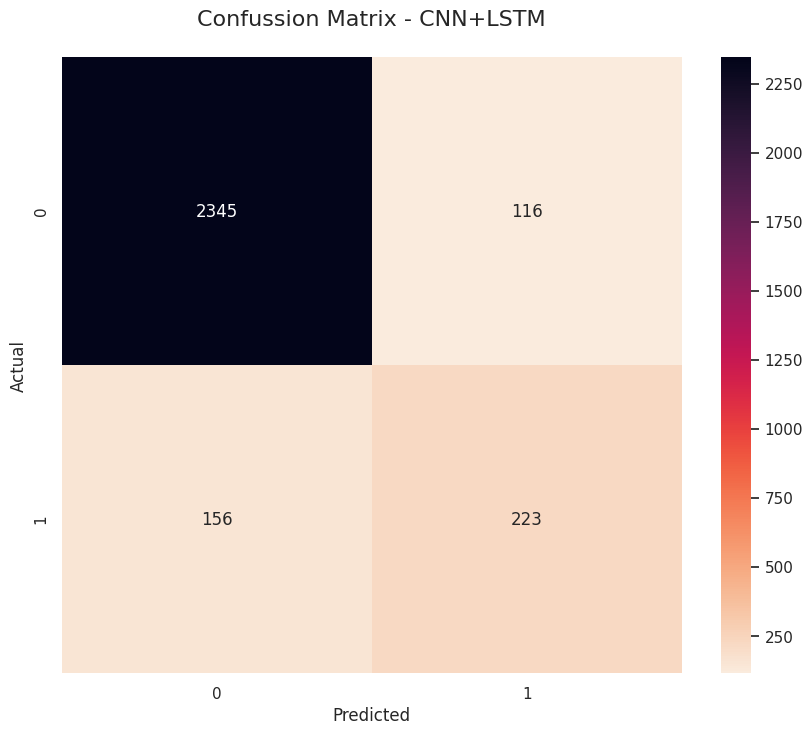

In [ ]:
import matplotlib.pyplot as plt

# Best Model (best model lstm adalah model dari pred_test_cnnlstm1[2])
best_index = 3  # Model ke-4 dalam list (dengan unit: [16, 32, 64, 128][3] => 128 unit)
best_history = histories_cnnlstm1[best_index]
best_val_loss = min(best_history.history['val_loss'])
best_model = pred_test_cnnlstm1[best_index]
best_model_info = f"CNN+LSTM (Embedding dim=200) with {[16, 32, 64, 128][best_index]} units"

print("\nBest model info:", best_model_info)
print("Best validation loss:", best_val_loss)

# --- Plotting grafik Loss dan Accuracy ---
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title(f'Loss Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title(f'Accuracy Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best CNN+LSTM Model\n')
unique_labels = np.unique(test_Y)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))


# Melihat confussion matrix model CNN+LSTM terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - CNN+LSTM\n", size=16)


# CNN + BiLSTM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, classification_report

## Model CNN + BiLSTM dengan output embedding 200

In [ ]:
# Membuat list kosong untuk menyimpan hasil pemodelan
pred_test_cnn_bilstm1 = []
pred_train_cnn_bilstm1 = []
eval_test_cnn_bilstm1 = []
histories_cnnbilstm1 = []

# Mulai pengukuran waktu total
total_start_time_cnnbilstm1 = time.time()

# Melakukan iterasi untuk pemodelan CNN + BiLSTM
for num in [16, 32, 64, 128]:
    iteration_start_time_cnnbilstm1 = time.time()  # Mulai hitung waktu
    model_cnn_bilstm1 = Sequential()
    model_cnn_bilstm1.add(Embedding(input_dim=1000,
                                    output_dim=200,
                                    weights=[embedding_matrix2]))

    # Layer CNN
    model_cnn_bilstm1.add(Conv1D(filters=num, kernel_size=3, activation='relu'))
    model_cnn_bilstm1.add(MaxPooling1D(pool_size=2))

    # Layer BiLSTM
    model_cnn_bilstm1.add(Bidirectional(LSTM(num)))

    # Output layer
    model_cnn_bilstm1.add(Dense(1, activation='sigmoid'))

    model_cnn_bilstm1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
    callbacks_list = [es]

    hist_cnn_bilstm1 = model_cnn_bilstm1.fit(word_seq_train, train_Y,
                                             batch_size=256,
                                             epochs=10,
                                             callbacks=callbacks_list,
                                             validation_data=(word_seq_test, test_Y),
                                             shuffle=True, verbose=1)
    histories_cnnbilstm1.append(hist_cnn_bilstm1)

    yhat_cnn_bilstm1 = model_cnn_bilstm1.predict(word_seq_test, batch_size=256)
    pred_cnn_bilstm1 = model_cnn_bilstm1.predict(word_seq_train, batch_size=256)

    metrics_cnn_bilstm1 = [accuracy_score(test_Y, np.round(yhat_cnn_bilstm1, 0)),
                           f1_score(test_Y, np.round(yhat_cnn_bilstm1, 0), pos_label=1),
                           f1_score(test_Y, np.round(yhat_cnn_bilstm1, 0), pos_label=0)]

    pred_train_cnn_bilstm1.append(pred_cnn_bilstm1)
    pred_test_cnn_bilstm1.append(yhat_cnn_bilstm1)
    eval_test_cnn_bilstm1.append(metrics_cnn_bilstm1)

    iteration_end_time_cnnbilstm1 = time.time()  # Akhiri hitung waktu untuk iterasi ini
    print(f"Model CNN+BiLSTM 200 dengan {num} unit membutuhkan waktu {iteration_end_time_cnnbilstm1 - iteration_start_time_cnnbilstm1:.2f} detik.")

total_end_time_cnnbilstm1 = time.time()
print(f"Total waktu pelatihan: {total_end_time_cnnbilstm1 - total_start_time_cnnbilstm1:.2f} detik.")

# Melihat hasil performa klasifikasi
eval_test_cnn_bilstm1

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6483 - loss: 0.6304 - val_accuracy: 0.8444 - val_loss: 0.3800
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8448 - loss: 0.3698 - val_accuracy: 0.8708 - val_loss: 0.3337
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8890 - loss: 0.2956 - val_accuracy: 0.8415 - val_loss: 0.3785
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9104 - loss: 0.2444 - val_accuracy: 0.8641 - val_loss: 0.3553
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9336 - loss: 0.1963 - val_accuracy: 0.8725 - val_loss: 0.3589
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9484 - loss: 0.1589 - val_accuracy: 0.8863 - val_loss: 0.3439
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9559 - loss: 0.1312 - val_accuracy: 0.8729 - val_loss: 0.4018
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9628 - loss: 0.1161 - val_accuracy: 0.8701 - val

[[0.8704225352112676, 0.5629453681710214, 0.9239355105415461],
 [0.898943661971831, 0.6041379310344828, 0.9420787083753784],
 [0.8883802816901408, 0.58777633289987, 0.9354510283038078],
 [0.902112676056338, 0.6138888888888889, 0.9439516129032258]]

## Model CNN + BiLSTM dengan output embedding 300

## Model Terbaik CNN + BiLSTM

In [ ]:
# Melihat hasil performa klasifikasi dimensi output 200
print('Akurasi dan F1 Score dim 200')
eval_test_cnn_bilstm1

Akurasi dan F1 Score dim 200


[[0.8704225352112676, 0.5629453681710214, 0.9239355105415461],
 [0.898943661971831, 0.6041379310344828, 0.9420787083753784],
 [0.8883802816901408, 0.58777633289987, 0.9354510283038078],
 [0.902112676056338, 0.6138888888888889, 0.9439516129032258]]

In [ ]:
# Melihat hasil performa klasifikasi dimensi output 300
print('Akurasi dan F1 Score dim 300')
eval_test_cnn_bilstm2

Akurasi dan F1 Score dim 300


[[0.8901408450704226, 0.6010230179028133, 0.9363005308289097],
 [0.8908450704225352, 0.5931758530183727, 0.936966246441643],
 [0.877112676056338, 0.5820359281437125, 0.9279669762641899],
 [0.8658450704225352, 0.5469678953626635, 0.921264724116553]]


Best model info: CNN+BiLSTM (Embedding dim=200) with 128 units
Best validation loss: 0.3011868894100189


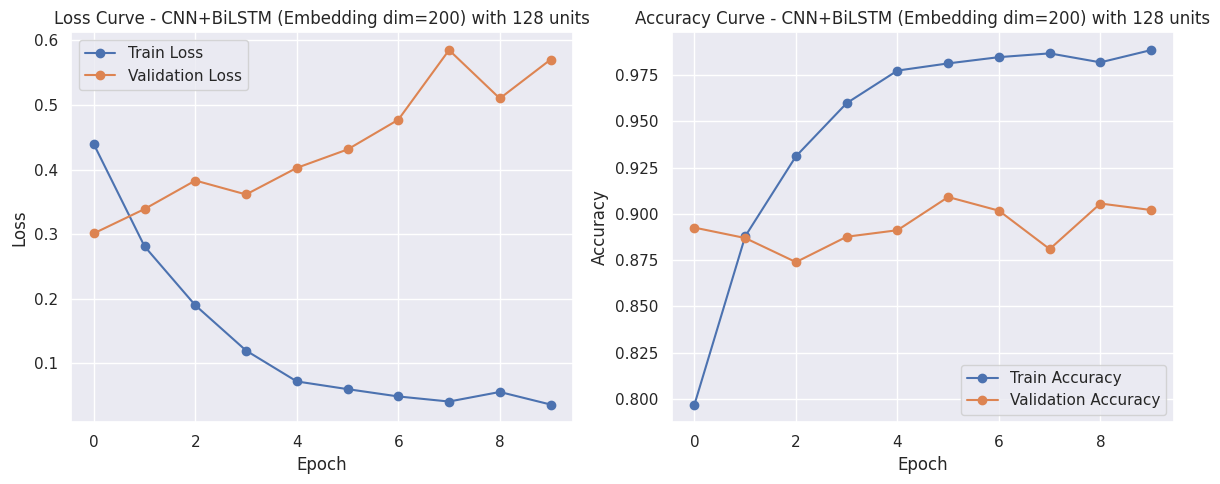


Classification Metrics for Best CNN+BiLSTM Model

              precision    recall  f1-score   support

           0    0.93677   0.95124   0.94395      2461
           1    0.64809   0.58311   0.61389       379

    accuracy                        0.90211      2840
   macro avg    0.79243   0.76718   0.77892      2840
weighted avg    0.89825   0.90211   0.89990      2840



Text(0.5, 1.0, 'Confussion Matrix - CNN+BiLSTM\n')

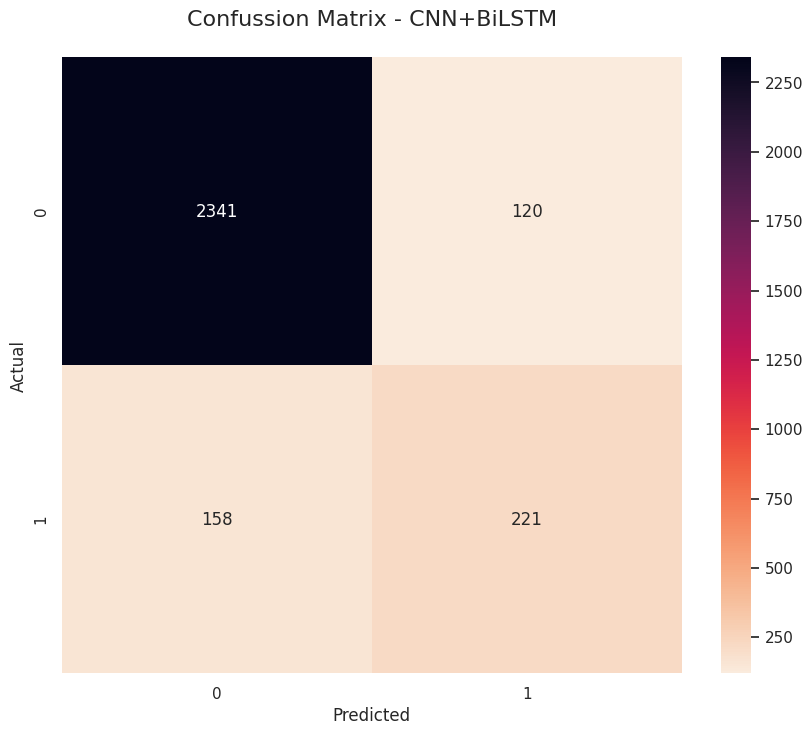

In [ ]:
import matplotlib.pyplot as plt

# Best Model (best model cnn+bilstm adalah model dari pred_test_cnn_bilstm1[3])
best_index = 3  # Model ke-4 dalam list (dengan unit: [16, 32, 64, 128][3] => 128 unit)
best_history = histories_cnnbilstm1[best_index]
best_val_loss = min(best_history.history['val_loss'])
best_model = pred_test_cnn_bilstm1[best_index]
best_model_info = f"CNN+BiLSTM (Embedding dim=200) with {[16, 32, 64, 128][best_index]} units"

print("\nBest model info:", best_model_info)
print("Best validation loss:", best_val_loss)

# --- Plotting grafik Loss dan Accuracy ---
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title(f'Loss Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title(f'Accuracy Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best CNN+BiLSTM Model\n')
unique_labels = np.unique(test_Y)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))


# Melihat confussion matrix model CNN+BiLSTM terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - CNN+BiLSTM\n", size=16)



Best model info: CNN+BiLSTM (Embedding dim=300) with 16 units
Best validation loss: 0.2898746728897095


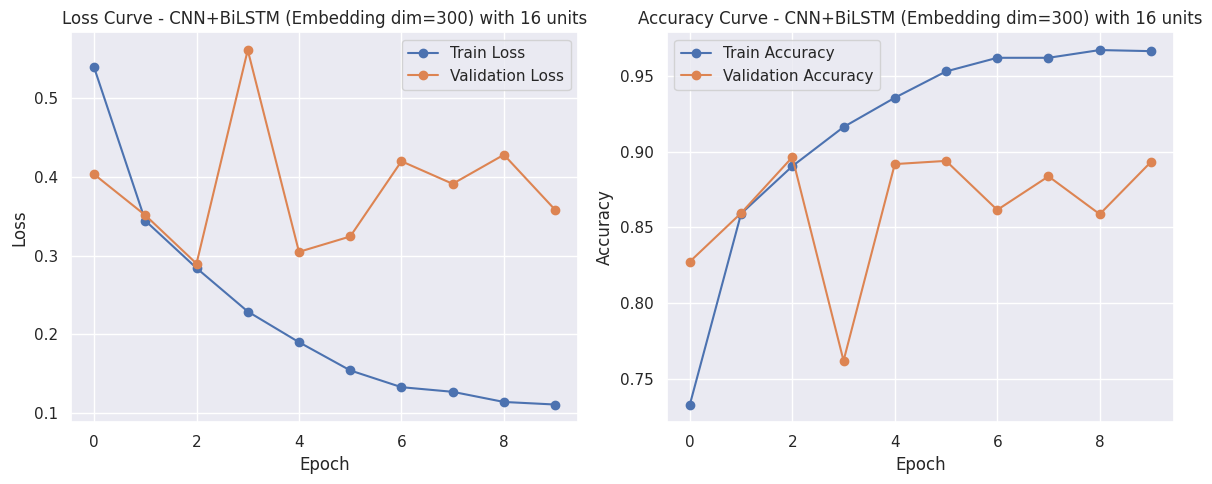


Classification Metrics for Best CNN+BiLSTM Model

              precision    recall  f1-score   support

           0    0.94077   0.93580   0.93828      2461
           1    0.59694   0.61741   0.60700       379

    accuracy                        0.89331      2840
   macro avg    0.76885   0.77661   0.77264      2840
weighted avg    0.89488   0.89331   0.89407      2840



Text(0.5, 1.0, 'Confussion Matrix - CNN+BiLSTM\n')

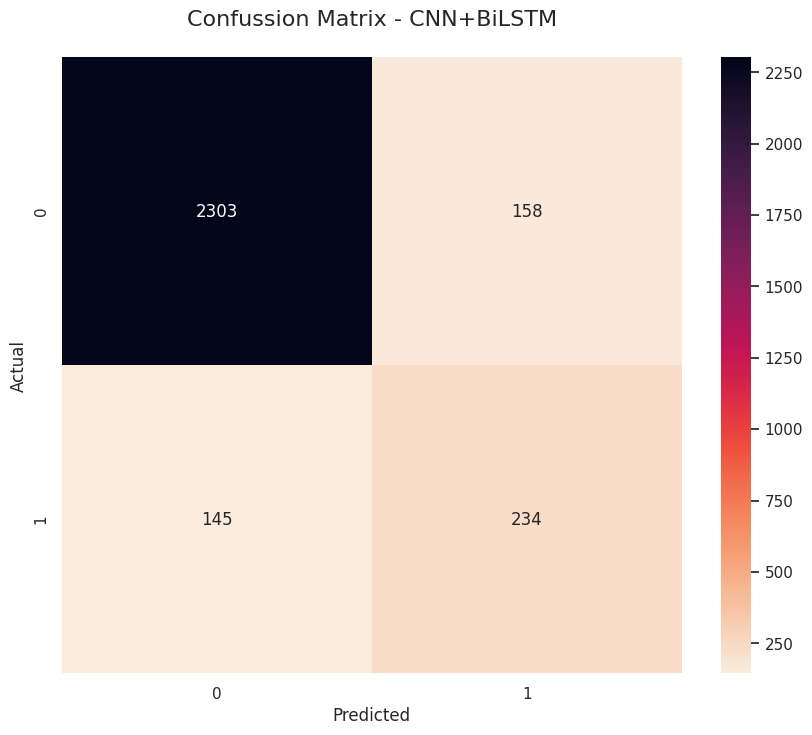

In [ ]:
import matplotlib.pyplot as plt

# Best Model (best model cnn+bilstm adalah model dari pred_test_cnn_bilstm1[3])
best_index = 0  # Model ke-4 dalam list (dengan unit: [16, 32, 64, 128][3] => 128 unit)
best_history = histories_cnnbilstm2[best_index]
best_val_loss = min(best_history.history['val_loss'])
best_model = pred_test_cnn_bilstm2[best_index]
best_model_info = f"CNN+BiLSTM (Embedding dim=300) with {[16, 32, 64, 128][best_index]} units"

print("\nBest model info:", best_model_info)
print("Best validation loss:", best_val_loss)

# --- Plotting grafik Loss dan Accuracy ---
plt.figure(figsize=(12, 5))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss', marker='o')
plt.plot(best_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title(f'Loss Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title(f'Accuracy Curve - {best_model_info}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# === Menampilkan Laporan Klasifikasi untuk Model Terbaik ===
print('\nClassification Metrics for Best CNN+BiLSTM Model\n')
unique_labels = np.unique(test_Y)
best_pred_test = np.round(np.array(best_model))
print(classification_report(test_Y,
                            best_pred_test,
                            target_names=[str(label) for label in unique_labels],
                            digits=5))


# Melihat confussion matrix model CNN+BiLSTM terbaik
conf_mat = confusion_matrix(test_Y,
                            np.round(np.array(best_model)))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap="rocket_r", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confussion Matrix - CNN+BiLSTM\n", size=16)


# Menyimpan Train Test ke CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
folder_path = "/content/drive/My Drive/Bismillah Skripsi Lancar"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import pandas as pd
import numpy as np
import seaborn as sns
import json
from google.colab import files
import os

In [ ]:
df = pd.read_csv(f"{folder_path}/reviews_kai_cleaned2.csv")
print(df.head())

   Unnamed: 0           review  rating  sentiment_by_rating
0           0    jadwal lambat       1                    0
1           1       bantu guna       5                    1
2           2  aplikasi lambat       1                    0
3           3            jelek       1                    0
4           4        baik aneh       1                    0


In [ ]:
df.shape

(14197, 4)

In [ ]:
import pandas as pd

# Menghitung jumlah kata per baris di kolom 'review'
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))

# Menampilkan statistik jumlah kata
max_words = df['word_count'].max()
min_words = df['word_count'].min()
mean_words = df['word_count'].mean()
std_words = df['word_count'].std()

# Menampilkan hasil
print(f"Jumlah kata terbanyak: {max_words}")
print(f"Jumlah kata tersedikit: {min_words}")
print(f"Rata-rata jumlah kata: {mean_words:.2f}")
print(f"Standar deviasi jumlah kata: {std_words:.2f}")


Jumlah kata terbanyak: 118
Jumlah kata tersedikit: 1
Rata-rata jumlah kata: 9.78
Standar deviasi jumlah kata: 7.99


In [ ]:
#Mengimpor fungsi yang diperlukan
from sklearn.model_selection import train_test_split
#Memeriksa dimensi data awal
df.shape
#Mengambil kolom ulasan sebagai variabel X
X = df.loc[:, ['review']]
#Mengambil kolom sentimen sebagai variabel X
Y = df.loc[:, ['sentiment_by_rating']]

In [ ]:
#Melakukan pembagian data latih dan data uji dengan proporsi 80:20
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state=0, train_size = .80)

In [ ]:
#Memeriksa dimensi data latih dan data uji
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(11357, 1) (2840, 1) (11357, 1) (2840, 1)


In [ ]:
import os

# Pastikan folder ada, jika tidak maka buat
os.makedirs(folder_path, exist_ok=True)

# Simpan data dalam format CSV
train_X.to_csv(os.path.join(folder_path, "train_X.csv"), index=False)
test_X.to_csv(os.path.join(folder_path, "test_X.csv"), index=False)
train_Y.to_csv(os.path.join(folder_path, "train_Y.csv"), index=False)
test_Y.to_csv(os.path.join(folder_path, "test_Y.csv"), index=False)

print("Data berhasil disimpan dalam format CSV di:", folder_path)


Data berhasil disimpan dalam format CSV di: /content/drive/My Drive/Bismillah Skripsi Lancar


In [ ]:
train_X = pd.read_csv(os.path.join(folder_path, "train_X.csv"))
test_X = pd.read_csv(os.path.join(folder_path, "test_X.csv"))
train_Y = pd.read_csv(os.path.join(folder_path, "train_Y.csv"))
test_Y = pd.read_csv(os.path.join(folder_path, "test_Y.csv"))

In [ ]:
print(train_X)
print(train_Y)

                                                  review
0                                                  jalan
1      masuk data terima otp entry otp digit anggap i...
2      baharu otomatis tanggal juli ecek jadwal keret...
3      boking tiket lancar cocok bayar error saldo kl...
4      baharu tampil dar lihat berangkat krl ribet ja...
...                                                  ...
11352  beli tiket kereta daftar member dasar daftar g...
11353                                 unduh aplikasi kai
11354  error pesan tiket saldo potong etiket payah ap...
11355  hiks kecewa aplikasi baru gadang tiket lebaran...
11356         h menit habis iya warga serempak tuju aneh

[11357 rows x 1 columns]
       sentiment_by_rating
0                        0
1                        0
2                        0
3                        0
4                        0
...                    ...
11352                    0
11353                    1
11354                    0
11355               

In [ ]:
# Menggabungkan train_X dan train_Y menjadi satu dataframe
train = pd.concat([train_X, train_Y], axis=1)

# Menampilkan 5 baris pertama untuk memastikan hasil
print(train.head())

                                              review  sentiment_by_rating
0                                              jalan                    0
1  masuk data terima otp entry otp digit anggap i...                    0
2  baharu otomatis tanggal juli ecek jadwal keret...                    0
3  boking tiket lancar cocok bayar error saldo kl...                    0
4  baharu tampil dar lihat berangkat krl ribet ja...                    0


In [ ]:
# Menggabungkan train_X dan train_Y menjadi satu dataframe
test = pd.concat([test_X, test_Y], axis=1)

# Menampilkan 5 baris pertama untuk memastikan hasil
print(test.head())

                                              review  sentiment_by_rating
0                            masuk jangann downloadd                    0
1                          install buka aplikasi iya                    0
2            masuk iya pdahal email gin smenjak baru                    0
3           aplikasi sampah jadwal kereta didownload                    0
4  mantap pergi mudah susah beli tiket kakak jadw...                    1


In [ ]:
# Simpan data dalam format CSV
train.to_csv(os.path.join(folder_path, "train_data.csv"), index=False)
test.to_csv(os.path.join(folder_path, "test_data.csv"), index=False)

print("Data berhasil disimpan dalam format CSV di:", folder_path)

Data berhasil disimpan dalam format CSV di: /content/drive/My Drive/Bismillah Skripsi Lancar


# Menyimpan Hasil prediksi

In [ ]:
train = pd.read_csv(os.path.join(folder_path, "train_data.csv"))
test = pd.read_csv(os.path.join(folder_path, "test_data.csv"))
imb_cnnlstm_train = pd.read_csv(os.path.join(folder_path, "pred_train_cnnlstm_imb.csv"))
imb_cnnlstm_test = pd.read_csv(os.path.join(folder_path, "pred_test_cnnlstm_imb.csv"))
bal_cnnlstm_train = pd.read_csv(os.path.join(folder_path, "pred_train_cnnlstm2_bal.csv"))
bal_cnnlstm_test = pd.read_csv(os.path.join(folder_path, "pred_test_cnnlstm2_bal.csv"))

## Hasil dengan model imbalance

In [ ]:
# Menggabungkan test_X dan test_Y menjadi satu dataframe
test_imb = pd.concat([test, imb_cnnlstm_test['cnn_lstm2']], axis=1)

# Menampilkan 5 baris pertama untuk memastikan hasil
print(test_imb.head())

                                              review  sentiment_by_rating  \
0                            masuk jangann downloadd                    0   
1                          install buka aplikasi iya                    0   
2            masuk iya pdahal email gin smenjak baru                    0   
3           aplikasi sampah jadwal kereta didownload                    0   
4  mantap pergi mudah susah beli tiket kakak jadw...                    1   

                cnn_lstm2  
0   [0.09173943847417831]  
1   [0.07002035528421402]  
2  [0.013260971754789352]  
3   [0.01705198921263218]  
4    [0.4234102964401245]  


In [ ]:
# Mengubah kolom cnn_lstm2 agar hanya berisi nilai float
test_imb['cnn_lstm2'] = test_imb['cnn_lstm2'].apply(lambda x: float(x[0]) if isinstance(x, list) else float(x.strip('[]')))

# Membuat kolom pred berdasarkan nilai di cnn_lstm2
test_imb['pred'] = test_imb['cnn_lstm2'].apply(lambda x: 1 if x > 0.5 else 0)

# Menampilkan 5 baris pertama untuk memastikan perubahan
print(test_imb.head())


                                              review  sentiment_by_rating  \
0                            masuk jangann downloadd                    0   
1                          install buka aplikasi iya                    0   
2            masuk iya pdahal email gin smenjak baru                    0   
3           aplikasi sampah jadwal kereta didownload                    0   
4  mantap pergi mudah susah beli tiket kakak jadw...                    1   

   cnn_lstm2  pred  
0   0.091739     0  
1   0.070020     0  
2   0.013261     0  
3   0.017052     0  
4   0.423410     0  


In [ ]:
test_imb.shape

(2840, 4)

In [ ]:
# Simpan data dalam format CSV
test_imb.to_csv(os.path.join(folder_path, "df_result_imb.csv"), index=False)

## Hasil dengan model balance

In [ ]:
# Menggabungkan test_X dan test_Y menjadi satu dataframe
test_bal = pd.concat([test, bal_cnnlstm_test['cnn_lstm3']], axis=1)

# Menampilkan 5 baris pertama untuk memastikan hasil
print(test_bal.head())

                                              review  sentiment_by_rating  \
0                            masuk jangann downloadd                    0   
1                          install buka aplikasi iya                    0   
2            masuk iya pdahal email gin smenjak baru                    0   
3           aplikasi sampah jadwal kereta didownload                    0   
4  mantap pergi mudah susah beli tiket kakak jadw...                    1   

                 cnn_lstm3  
0    [0.07480378448963165]  
1     [0.9041638374328613]  
2  [0.0033000751864165068]  
3  [0.0032882578670978546]  
4     [0.9992092847824097]  


In [ ]:
# Mengubah kolom cnn_lstm2 agar hanya berisi nilai float
test_bal['cnn_lstm3'] = test_bal['cnn_lstm3'].apply(lambda x: float(x[0]) if isinstance(x, list) else float(x.strip('[]')))

# Membuat kolom pred berdasarkan nilai di cnn_lstm2
test_bal['pred'] = test_bal['cnn_lstm3'].apply(lambda x: 1 if x > 0.5 else 0)

# Menampilkan 5 baris pertama untuk memastikan perubahan
print(test_bal.head())


                                              review  sentiment_by_rating  \
0                            masuk jangann downloadd                    0   
1                          install buka aplikasi iya                    0   
2            masuk iya pdahal email gin smenjak baru                    0   
3           aplikasi sampah jadwal kereta didownload                    0   
4  mantap pergi mudah susah beli tiket kakak jadw...                    1   

   cnn_lstm3  pred  
0   0.074804     0  
1   0.904164     1  
2   0.003300     0  
3   0.003288     0  
4   0.999209     1  


In [ ]:
test_bal.shape

(2840, 4)

In [ ]:
# Simpan data dalam format CSV
test_bal.to_csv(os.path.join(folder_path, "df_result_bal.csv"), index=False)

# Visualisasi Hasil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
folder_path = "/content/drive/My Drive/Bismillah Skripsi Lancar"

Mounted at /content/drive


In [ ]:
# Memuat library dan fungsi yang diperlukan
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import json
from google.colab import files
import os
import string
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.util import ngrams
from collections import defaultdict, Counter
import re
import nltk
from nltk.corpus import stopwords
from itertools import islice

## Best Model Data Imbalance

In [ ]:
df_imb = pd.read_csv(os.path.join(folder_path, "df_result_imb.csv"))
print(df_imb)

                                                 review  sentiment_by_rating  \
0                               masuk jangann downloadd                    0   
1                             install buka aplikasi iya                    0   
2               masuk iya pdahal email gin smenjak baru                    0   
3              aplikasi sampah jadwal kereta didownload                    0   
4     mantap pergi mudah susah beli tiket kakak jadw...                    1   
...                                                 ...                  ...   
2835  catat daftar smartphone xiaomi redmi buffering...                    0   
2836                           lihat riwayat beli akses                    0   
2837  akses cari jadwal kereta lambat muncul jadwal ...                    0   
2838                               mantab fitur lengkap                    1   
2839                                    pesan tiket lrt                    0   

      cnn_lstm2  pred  
0      0.091739

In [ ]:
df_imb['sentiment_by_rating'].value_counts()

sentiment_by_rating
0    2461
1     379
Name: count, dtype: int64

In [ ]:
df_imb['pred'].value_counts()

pred
0    2564
1     276
Name: count, dtype: int64

In [ ]:
df_imb.isna().sum()

review                 0
sentiment_by_rating    0
cnn_lstm2              0
pred                   0
dtype: int64

Statistik jumlah kata:
count    2840.000000
mean        9.393310
std         7.419064
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        69.000000
dtype: float64
Jumlah kata maksimum: 69
Review dengan jumlah kata maksimum: kai serius urus aplikasi layan mantenence aman pergi publikasi tahap cost sedia maintenence lihat aplikasi dunia fitur baik celah aman aplikasi aman error orang rugi viral serius coba kai beda usaha kerja kerja buruk rakyat indonesia aplikasi lihat aplikasi aplikasi transportasi ratus juta orang indonesia performa aplikasi minimal alam iya konektifitas layan bayar gopay linkaja dana pasang ilkan produk anggar keluh publik lumrah layan publik semangat kai sedang serius


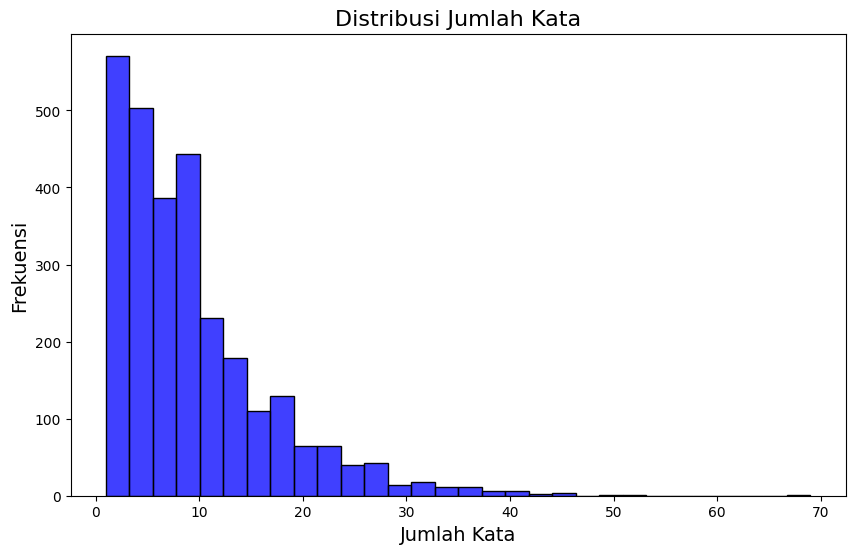

In [ ]:
review = df_imb['review']
# Menghitung jumlah kata untuk setiap ulasan
word_counts = [len(doc.split()) for doc in review]

# Menampilkan statistik deskriptif jumlah kata
print("Statistik jumlah kata:")
print(pd.Series(word_counts).describe())

# Temukan review dengan jumlah kata maksimum
max_count = max(word_counts)
index_max = word_counts.index(max_count)
print("Jumlah kata maksimum:", max_count)
print("Review dengan jumlah kata maksimum:", review[index_max])


# Plot distribusi jumlah kata dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(word_counts, bins=30, kde=False, color='blue')
plt.title("Distribusi Jumlah Kata", fontsize=16)
plt.xlabel("Jumlah Kata", fontsize=14)
plt.ylabel("Frekuensi", fontsize=14)
plt.show()


In [ ]:
# Pastikan tidak ada NaN dan ubah semua data ke string
df_imb['review'] = df_imb['review'].astype(str).fillna('')

# Membuat corpus untuk data secara keseluruhan
corpus = []
for x in df_imb['review'].dropna().str.split():
    if isinstance(x, list):  # Pastikan x adalah list
        corpus.extend(x)

# Membuat corpus untuk sentimen positif
corpus_pos = []
for x in df_imb[df_imb['pred'] == 1]['review'].dropna().str.split():
    if isinstance(x, list):
        corpus_pos.extend(x)

# Membuat corpus untuk sentimen negatif
corpus_neg = []
for x in df_imb[df_imb['pred'] == 0]['review'].dropna().str.split():
    if isinstance(x, list):
        corpus_neg.extend(x)

# Cek hasil panjang corpus
print(f"Total kata dalam corpus: {len(corpus)}")
print(f"Total kata dalam corpus positif: {len(corpus_pos)}")
print(f"Total kata dalam corpus negatif: {len(corpus_neg)}")


Total kata dalam corpus: 26677
Total kata dalam corpus positif: 1288
Total kata dalam corpus negatif: 25389


In [ ]:
# Membuat corpus untuk menghitung jumlah tiap kata secara keseluruhan dan diurutkan
corpus = Counter(corpus).most_common()

# Membuat corpus untuk menghitung jumlah tiap kata sentimen positif dan diurutkan
corpus_pos = Counter(corpus_pos).most_common()

# Membuat corpus untuk menghitung jumlah tiap kata sentimen negatif dan diurutkan
corpus_neg = Counter(corpus_neg).most_common()

In [ ]:
# Melihat jumlah kata unik pada data secara keseluruhan
print(f"jumlah kata unik keseluruhan data : {len(corpus)}")

# Melihat jumlah kata unik pada data sentimen positif
print(f"jumlah kata unik sentimen positif : {len(corpus_pos)}")

# Melihat jumlah kata unik pada data sentimen positif
print(f"jumlah kata unik sentimen negatif : {len(corpus_neg)}")

jumlah kata unik keseluruhan data : 2836
jumlah kata unik sentimen positif : 445
jumlah kata unik sentimen negatif : 2688


In [ ]:
# Melihat top 5 kata paling umum pada ulasan positif
corpus_pos[:5]

[('mudah', 56), ('kai', 52), ('tiket', 50), ('bantu', 50), ('kereta', 42)]

In [ ]:
# Melihat top 5 kata paling umum pada ulasan negatif
corpus_neg[:5]

[('aplikasi', 1460),
 ('tiket', 1083),
 ('masuk', 542),
 ('bayar', 498),
 ('pesan', 466)]

In [ ]:
# Mendefinisikan tabel untuk menyimpan data ulasan tiap kelas sentimen
df_pos = df_imb[df_imb['pred'] == 1]  # Positif
df_neg = df_imb[df_imb['pred'] == 0]  # Negatif

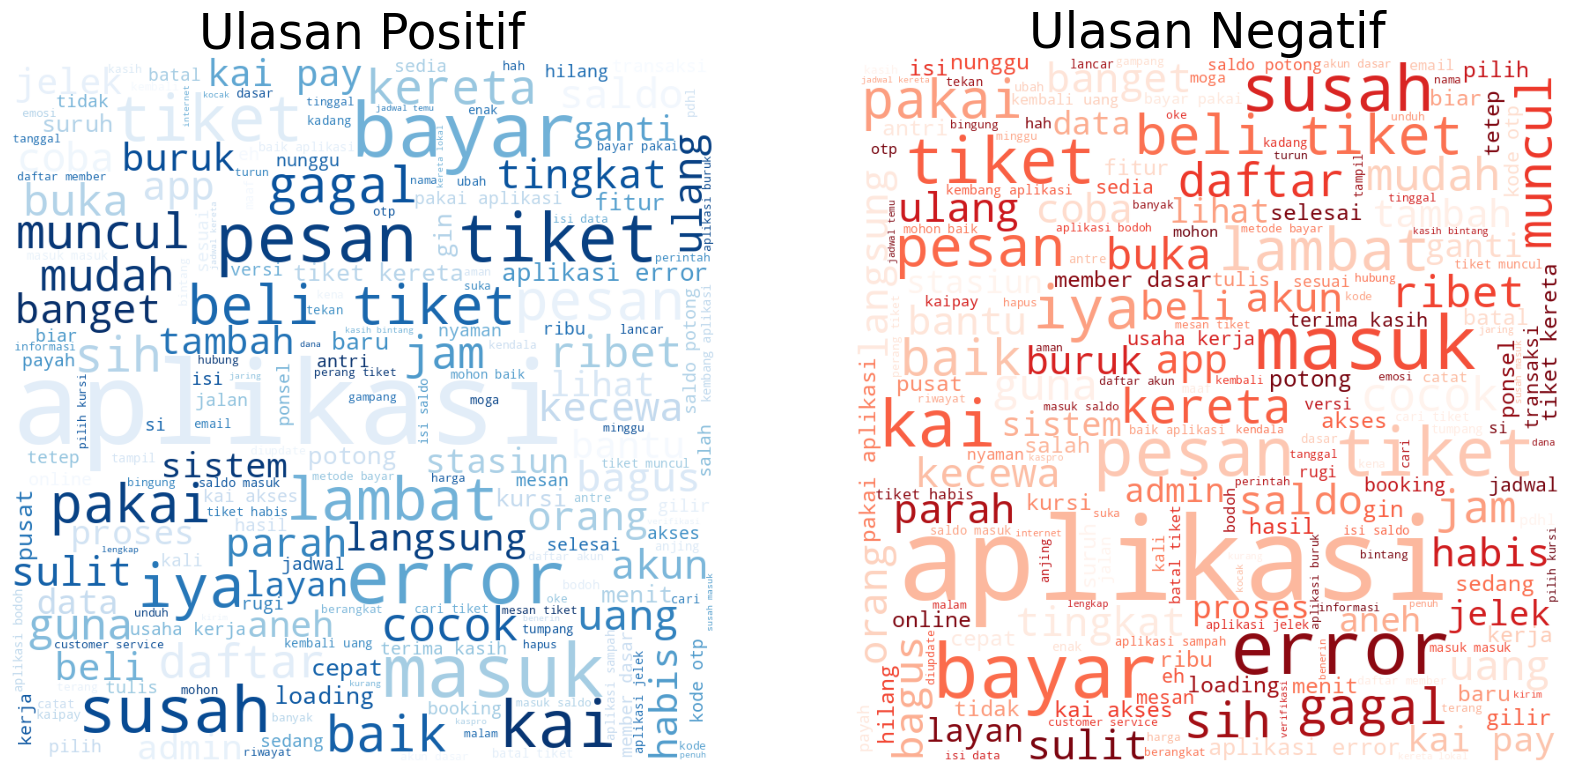

In [ ]:
df_sent = []
# Plot Word Clouds
fig, axes = plt.subplots(1, 2, figsize=(20, 15))
stopwords = set(STOPWORDS)

for ax, df_sent, title, colormap in zip(
    axes,
    [df_pos, df_neg],
    ['Ulasan Positif', 'Ulasan Negatif'],
    ['Blues', 'Reds']
):
    # Gabungkan semua teks dalam kategori tersebut
    comment_words = ' '.join(df_imb['review'].astype(str).str.lower())

    # Cek apakah teks tersedia (tidak kosong)
    if comment_words.strip():
        wordcloud = WordCloud(
            width=800, height=800, background_color='white',
            colormap=colormap, stopwords=stopwords, min_font_size=10
        ).generate(comment_words)

        ax.imshow(wordcloud)
    else:
        ax.text(0.5, 0.5, "Tidak ada cukup data", fontsize=30, ha='center', va='center')

    ax.axis('off')
    ax.set_title(title, fontsize=35)

plt.show()


In [ ]:
# Pastikan semua review adalah string dan tidak ada NaN
df_imb['review'] = df_imb['review'].astype(str).fillna('')

# Fungsi untuk menghasilkan N-Gram tanpa stopwords filtering
def generate_ngrams(text, n_gram=1):
    tokens = text.lower().split()  # Tidak melakukan filter stopwords
    ngrams = zip(*[tokens[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [ ]:
from collections import defaultdict
from nltk.corpus import stopwords

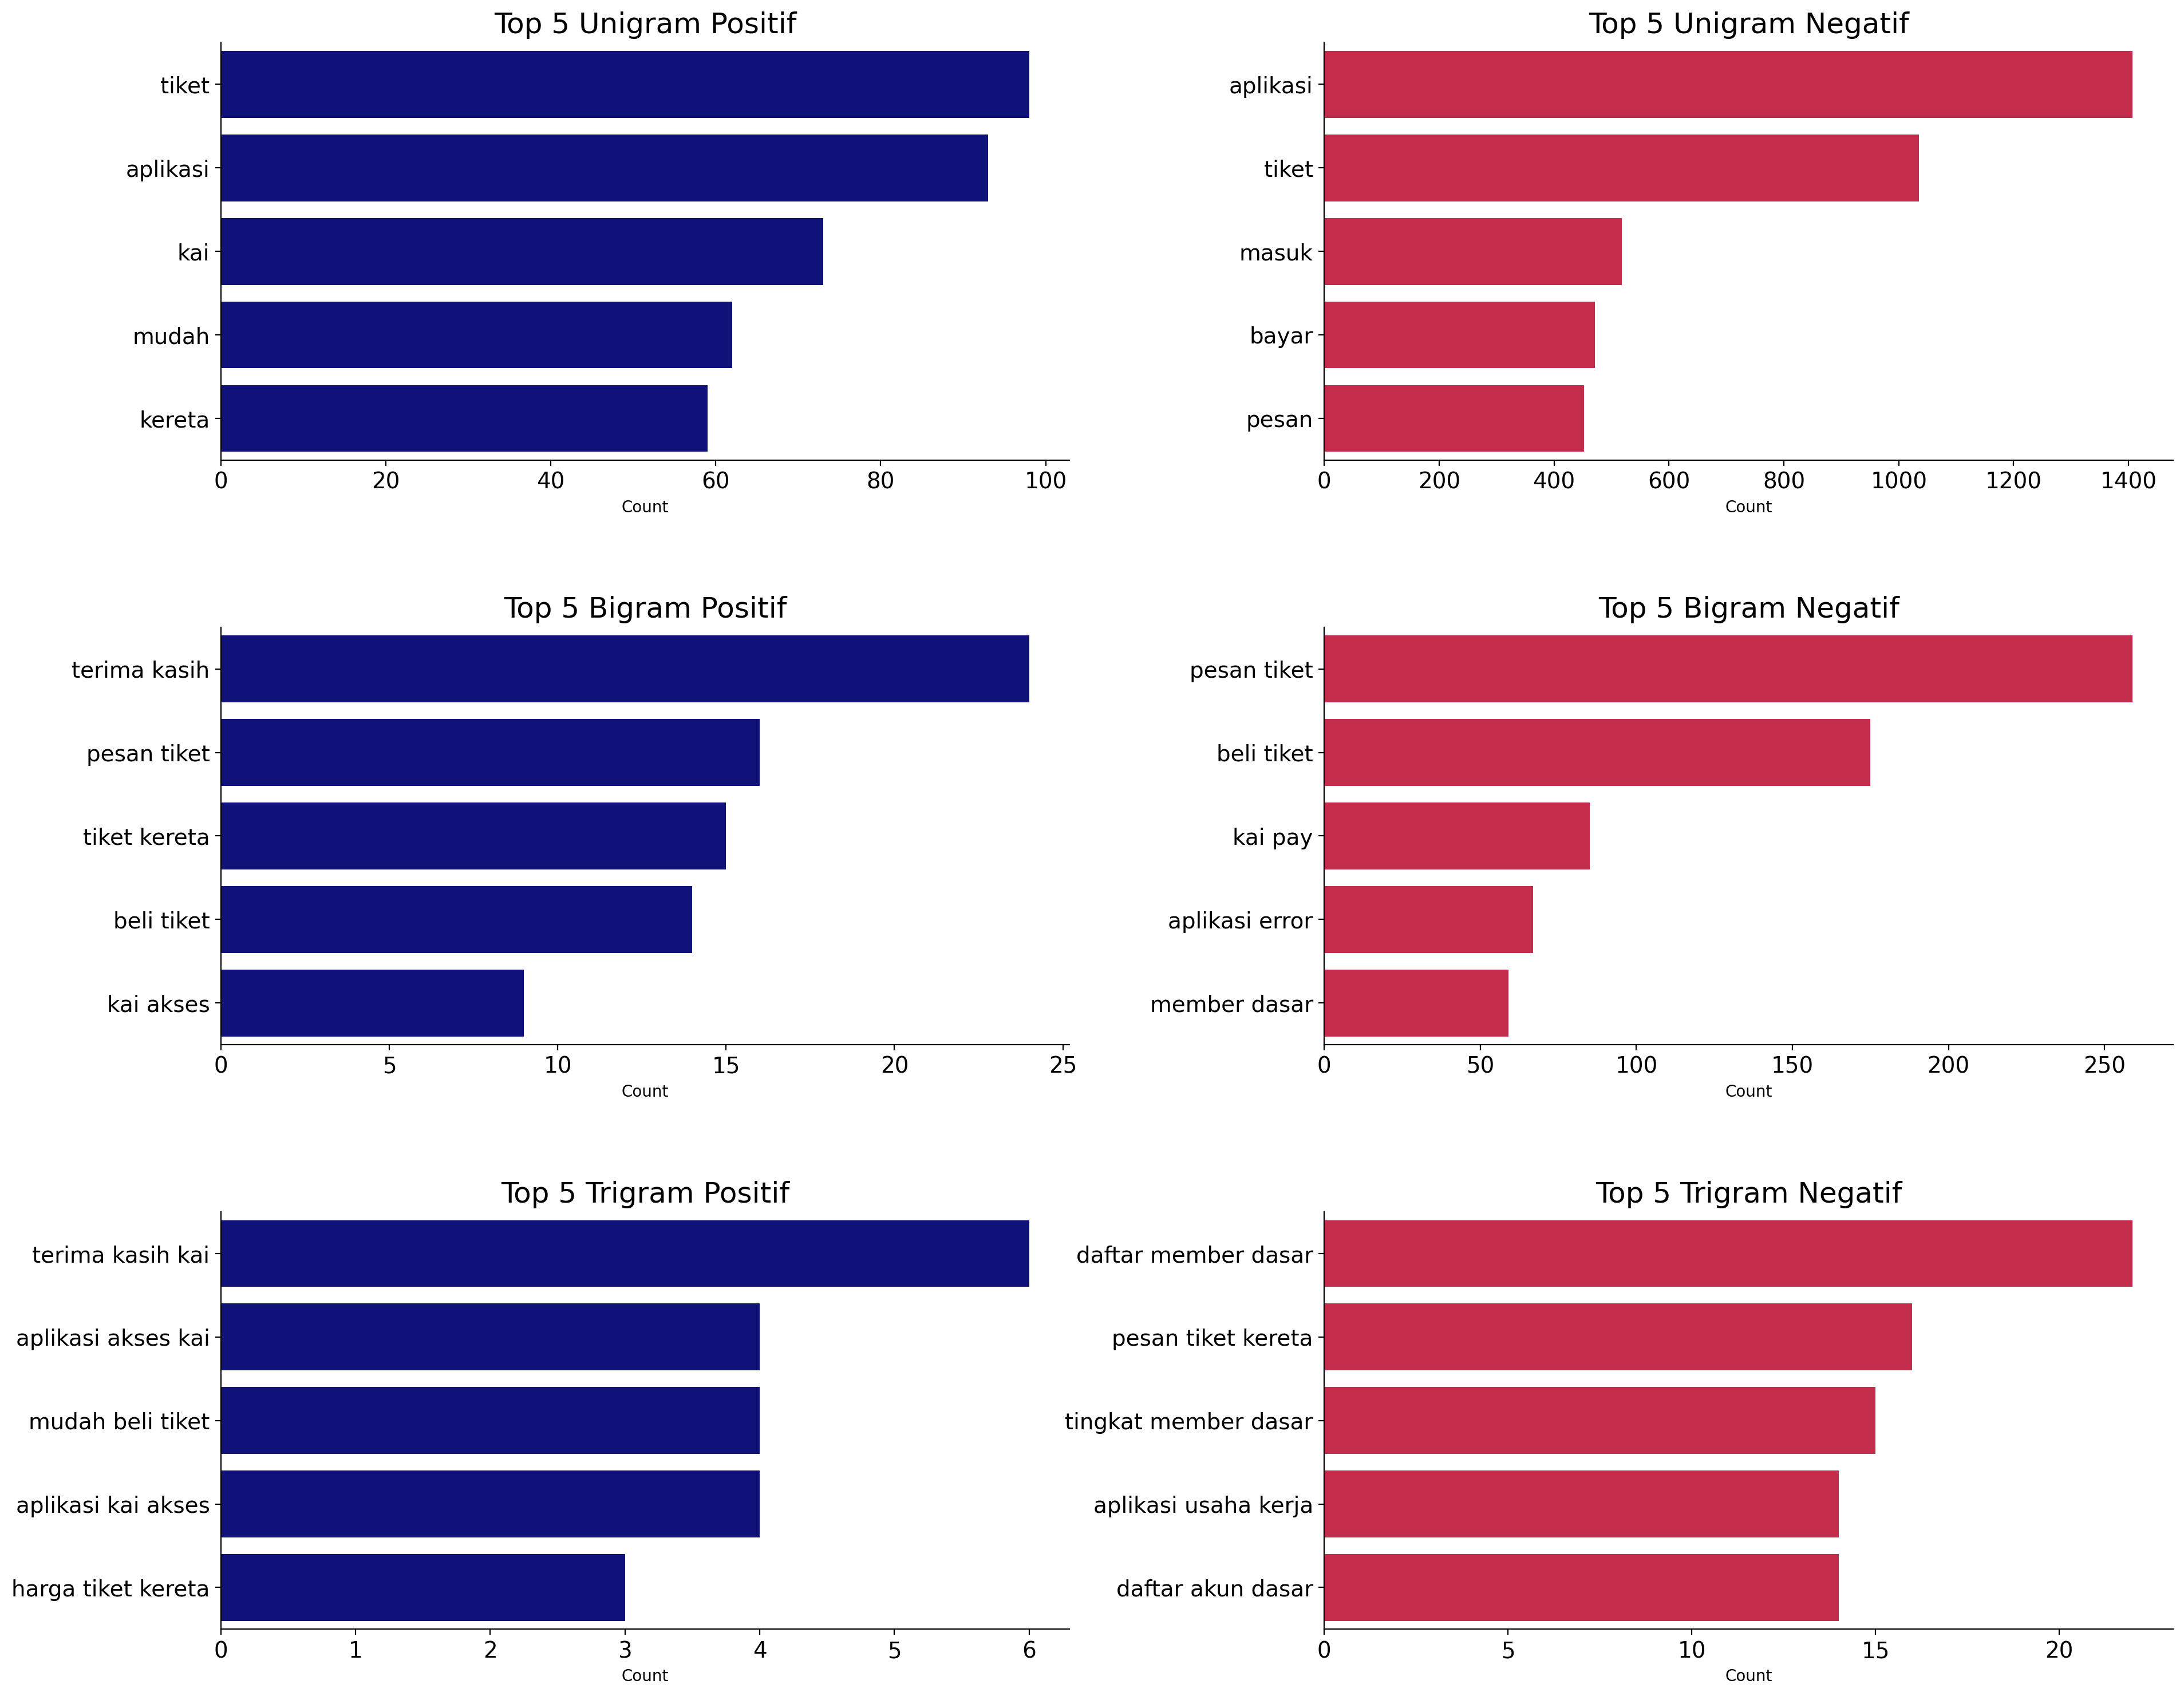

In [ ]:
from collections import defaultdict

# Jumlah N-Gram yang akan dianalisis
N = 5

# Filter DataFrame berdasarkan sentimen
positive_reviews = df_imb.loc[df_imb['sentiment_by_rating'] == 1, 'review']
negative_reviews = df_imb.loc[df_imb['sentiment_by_rating'] == 0, 'review']

# Dictionary untuk menyimpan frekuensi N-Gram
ngram_types = ['unigrams', 'bigrams', 'trigrams']
positive_ngrams = {ngram: defaultdict(int) for ngram in ngram_types}
negative_ngrams = {ngram: defaultdict(int) for ngram in ngram_types}

# Fungsi untuk menghitung n-gram
def count_ngrams(reviews, ngrams_dict):
    for rev in reviews:
        for n in range(1, 4):  # Unigram, Bigram, Trigram
            for word in generate_ngrams(rev, n_gram=n):
                ngrams_dict[ngram_types[n-1]][word] += 1

# Hitung frekuensi n-gram untuk setiap sentimen
count_ngrams(positive_reviews, positive_ngrams)
count_ngrams(negative_reviews, negative_ngrams)

# Fungsi untuk membuat plot N-Gram
def plot_ngrams(title, data, color, ax):
    df_ngrams = pd.DataFrame(sorted(data.items(), key=lambda x: x[1], reverse=True), columns=['N-Gram', 'Count'])
    sns.barplot(y=df_ngrams['N-Gram'][:N], x=df_ngrams['Count'][:N], ax=ax, color=color)
    ax.set_title(title, fontsize=18)
    ax.set_ylabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

# Membuat plot untuk Unigram, Bigram, dan Trigram
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(22, 18), dpi=200)  # Ukuran lebih besar
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Mengatur jarak antar subplot

plot_ngrams(f'Top {N} Unigram Positif', positive_ngrams['unigrams'], 'darkblue', axes[0, 0])
plot_ngrams(f'Top {N} Unigram Negatif', negative_ngrams['unigrams'], 'crimson', axes[0, 1])

plot_ngrams(f'Top {N} Bigram Positif', positive_ngrams['bigrams'], 'darkblue', axes[1, 0])
plot_ngrams(f'Top {N} Bigram Negatif', negative_ngrams['bigrams'], 'crimson', axes[1, 1])

plot_ngrams(f'Top {N} Trigram Positif', positive_ngrams['trigrams'], 'darkblue', axes[2, 0])
plot_ngrams(f'Top {N} Trigram Negatif', negative_ngrams['trigrams'], 'crimson', axes[2, 1])

plt.show()


In [ ]:
df_imb['pred'].value_counts()

pred
0    2564
1     276
Name: count, dtype: int64

<ipython-input-33-6512463af070>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Sentimen', y='Jumlah', data=df, palette=['#1f77b4', '#d62728'])


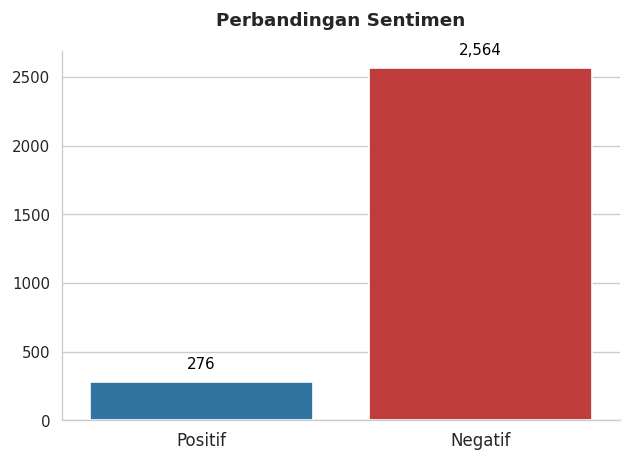

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Menyiapkan data
data = {'Sentimen': ['Positif', 'Negatif'],
        'Jumlah': [276, 2564]}
df = pd.DataFrame(data)

# Mengatur tema seaborn
sns.set_style("whitegrid")

# Membuat plot batang dengan warna yang lebih bold
plt.figure(figsize=(6, 4), dpi=120)
barplot = sns.barplot(x='Sentimen', y='Jumlah', data=df, palette=['#1f77b4', '#d62728'])

# Menghapus legend (agar warning terkait palette tidak muncul)
if barplot.get_legend() is not None:
    barplot.get_legend().remove()

# Menambahkan judul dengan font bold
plt.title('Perbandingan Sentimen', fontsize=11, fontweight='bold', pad=15)

# Menghapus label sumbu X dan Y agar lebih bersih
plt.xlabel('')
plt.ylabel('')

# Mengatur ukuran font angka di sumbu Y lebih kecil
plt.tick_params(axis='y', labelsize=9)

# Menambahkan label nilai di atas batang dengan offset vertikal agar tidak terlalu mepet dengan batang
for index, row in df.iterrows():
    plt.text(index, row['Jumlah'] + 100, f"{row['Jumlah']:,}",
             color='black', ha="center", fontsize=9, fontweight='regular')

# Menghapus garis tepi agar lebih minimalis
sns.despine()

plt.show()


## Best Model Data Balance

In [ ]:
df_bal = pd.read_csv(os.path.join(folder_path, "df_result_bal.csv"))
print(df_bal)

                                                 review  sentiment_by_rating  \
0                               masuk jangann downloadd                    0   
1                             install buka aplikasi iya                    0   
2               masuk iya pdahal email gin smenjak baru                    0   
3              aplikasi sampah jadwal kereta didownload                    0   
4     mantap pergi mudah susah beli tiket kakak jadw...                    1   
...                                                 ...                  ...   
2835  catat daftar smartphone xiaomi redmi buffering...                    0   
2836                           lihat riwayat beli akses                    0   
2837  akses cari jadwal kereta lambat muncul jadwal ...                    0   
2838                               mantab fitur lengkap                    1   
2839                                    pesan tiket lrt                    0   

      cnn_lstm3  pred  
0      0.074804

In [ ]:
df_bal['sentiment_by_rating'].value_counts()

sentiment_by_rating
0    2461
1     379
Name: count, dtype: int64

In [ ]:
df_bal['pred'].value_counts()

pred
0    2535
1     305
Name: count, dtype: int64

In [ ]:
df_imb.isna().sum()

review                 0
sentiment_by_rating    0
cnn_lstm2              0
pred                   0
dtype: int64

Statistik jumlah kata:
count    2840.000000
mean        9.393310
std         7.419064
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        69.000000
dtype: float64
Jumlah kata maksimum: 69
Review dengan jumlah kata maksimum: kai serius urus aplikasi layan mantenence aman pergi publikasi tahap cost sedia maintenence lihat aplikasi dunia fitur baik celah aman aplikasi aman error orang rugi viral serius coba kai beda usaha kerja kerja buruk rakyat indonesia aplikasi lihat aplikasi aplikasi transportasi ratus juta orang indonesia performa aplikasi minimal alam iya konektifitas layan bayar gopay linkaja dana pasang ilkan produk anggar keluh publik lumrah layan publik semangat kai sedang serius


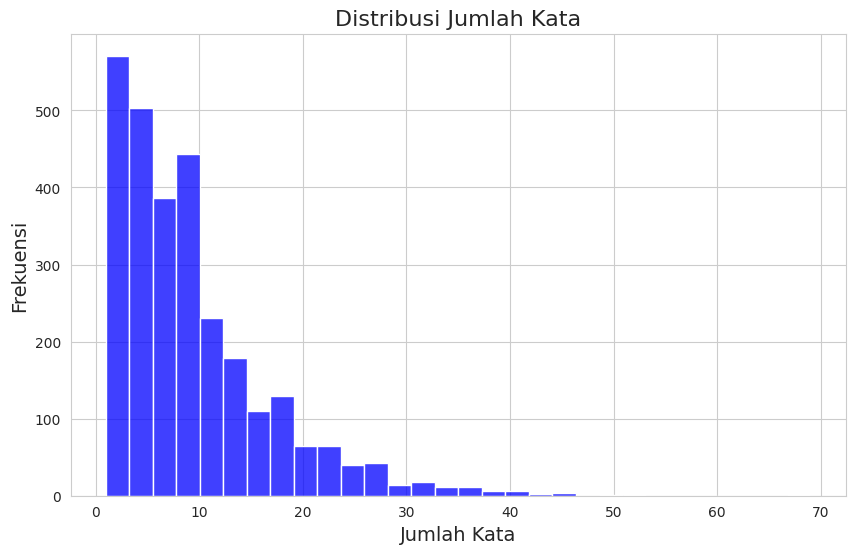

In [ ]:
review = df_bal['review']
# Menghitung jumlah kata untuk setiap ulasan
word_counts = [len(doc.split()) for doc in review]

# Menampilkan statistik deskriptif jumlah kata
print("Statistik jumlah kata:")
print(pd.Series(word_counts).describe())

# Temukan review dengan jumlah kata maksimum
max_count = max(word_counts)
index_max = word_counts.index(max_count)
print("Jumlah kata maksimum:", max_count)
print("Review dengan jumlah kata maksimum:", review[index_max])


# Plot distribusi jumlah kata dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(word_counts, bins=30, kde=False, color='blue')
plt.title("Distribusi Jumlah Kata", fontsize=16)
plt.xlabel("Jumlah Kata", fontsize=14)
plt.ylabel("Frekuensi", fontsize=14)
plt.show()


In [ ]:
# Pastikan tidak ada NaN dan ubah semua data ke string
df_bal['review'] = df_bal['review'].astype(str).fillna('')

# Membuat corpus untuk data secara keseluruhan
corpus = []
for x in df_bal['review'].dropna().str.split():
    if isinstance(x, list):  # Pastikan x adalah list
        corpus.extend(x)

# Membuat corpus untuk sentimen positif
corpus_pos = []
for x in df_bal[df_bal['pred'] == 1]['review'].dropna().str.split():
    if isinstance(x, list):
        corpus_pos.extend(x)

# Membuat corpus untuk sentimen negatif
corpus_neg = []
for x in df_bal[df_bal['pred'] == 0]['review'].dropna().str.split():
    if isinstance(x, list):
        corpus_neg.extend(x)

# Cek hasil panjang corpus
print(f"Total kata dalam corpus: {len(corpus)}")
print(f"Total kata dalam corpus positif: {len(corpus_pos)}")
print(f"Total kata dalam corpus negatif: {len(corpus_neg)}")


Total kata dalam corpus: 26677
Total kata dalam corpus positif: 1673
Total kata dalam corpus negatif: 25004


In [ ]:
# Membuat corpus untuk menghitung jumlah tiap kata secara keseluruhan dan diurutkan
corpus = Counter(corpus).most_common()

# Membuat corpus untuk menghitung jumlah tiap kata sentimen positif dan diurutkan
corpus_pos = Counter(corpus_pos).most_common()

# Membuat corpus untuk menghitung jumlah tiap kata sentimen negatif dan diurutkan
corpus_neg = Counter(corpus_neg).most_common()

In [ ]:
# Melihat jumlah kata unik pada data secara keseluruhan
print(f"jumlah kata unik keseluruhan data : {len(corpus)}")

# Melihat jumlah kata unik pada data sentimen positif
print(f"jumlah kata unik sentimen positif : {len(corpus_pos)}")

# Melihat jumlah kata unik pada data sentimen positif
print(f"jumlah kata unik sentimen negatif : {len(corpus_neg)}")

jumlah kata unik keseluruhan data : 2836
jumlah kata unik sentimen positif : 546
jumlah kata unik sentimen negatif : 2657


In [ ]:
# Melihat top 10 kata paling umum pada ulasan positif
corpus_pos[:10]

[('aplikasi', 78),
 ('kai', 55),
 ('mudah', 54),
 ('tiket', 52),
 ('bantu', 49),
 ('kereta', 42),
 ('bagus', 37),
 ('kasih', 29),
 ('jalan', 25),
 ('nyaman', 23)]

In [ ]:
# Melihat top 10 kata paling umum pada ulasan negatif
corpus_neg[:10]

[('aplikasi', 1422),
 ('tiket', 1081),
 ('masuk', 534),
 ('bayar', 497),
 ('pesan', 459),
 ('kai', 438),
 ('error', 408),
 ('pakai', 314),
 ('susah', 306),
 ('saldo', 287)]

In [ ]:
# Mendefinisikan tabel untuk menyimpan data ulasan tiap kelas sentimen
df_pos = df_bal[df_bal['pred'] == 1]  # Positif
df_neg = df_bal[df_bal['pred'] == 0]  # Negatif

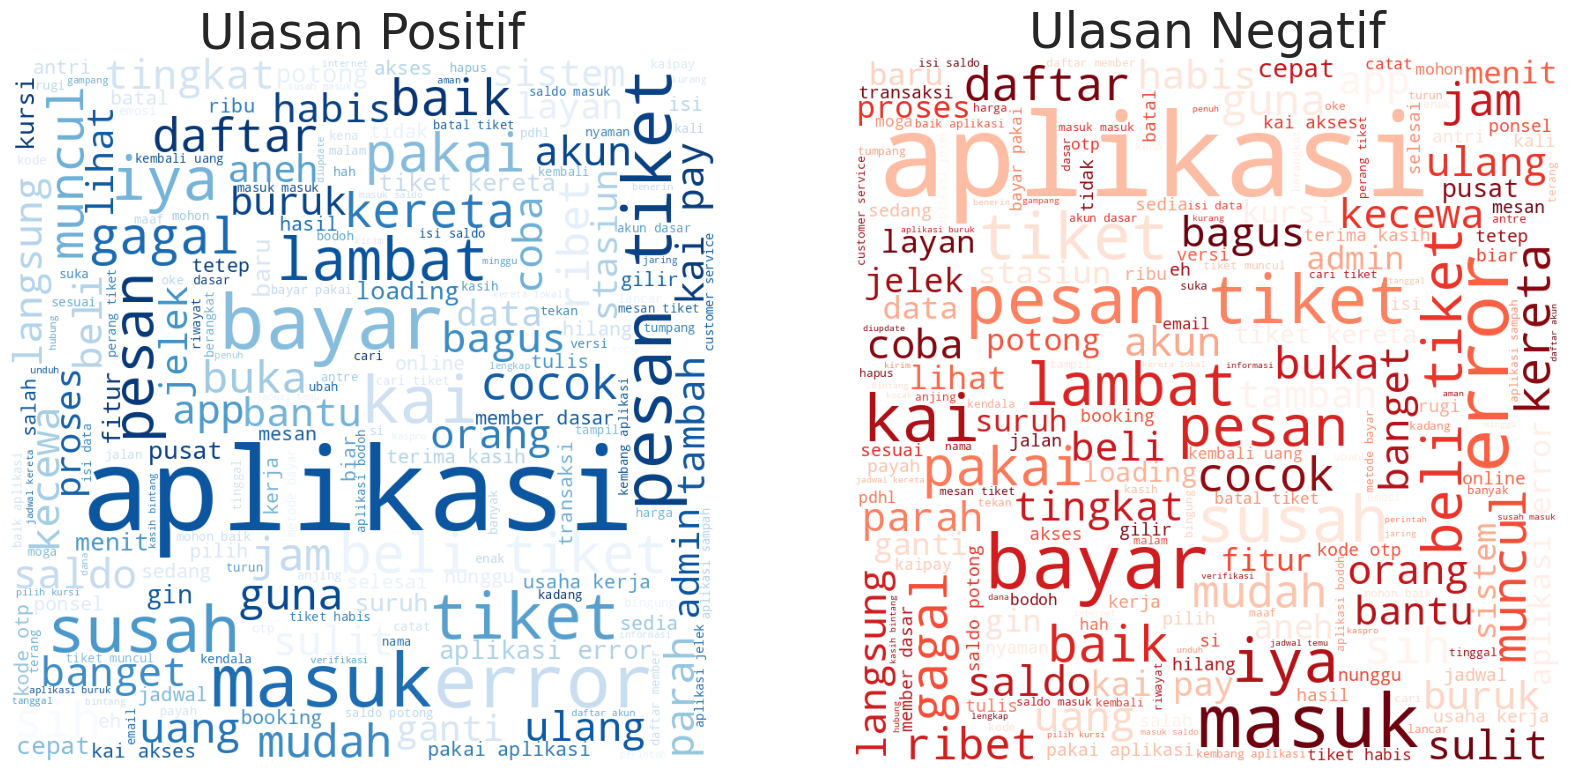

In [ ]:
df_sent = []
# Plot Word Clouds
fig, axes = plt.subplots(1, 2, figsize=(20, 15))
stopwords = set(STOPWORDS)

for ax, df_sent, title, colormap in zip(
    axes,
    [df_pos, df_neg],
    ['Ulasan Positif', 'Ulasan Negatif'],
    ['Blues', 'Reds']
):
    # Gabungkan semua teks dalam kategori tersebut
    comment_words = ' '.join(df_bal['review'].astype(str).str.lower())

    # Cek apakah teks tersedia (tidak kosong)
    if comment_words.strip():
        wordcloud = WordCloud(
            width=800, height=800, background_color='white',
            colormap=colormap, stopwords=stopwords, min_font_size=10
        ).generate(comment_words)

        ax.imshow(wordcloud)
    else:
        ax.text(0.5, 0.5, "Tidak ada cukup data", fontsize=30, ha='center', va='center')

    ax.axis('off')
    ax.set_title(title, fontsize=35)

plt.show()


In [ ]:
# Pastikan semua review adalah string dan tidak ada NaN
df_bal['review'] = df_bal['review'].astype(str).fillna('')

# Fungsi untuk menghasilkan N-Gram tanpa stopwords filtering
def generate_ngrams(text, n_gram=1):
    tokens = text.lower().split()  # Tidak melakukan filter stopwords
    ngrams = zip(*[tokens[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [ ]:
from collections import defaultdict
from nltk.corpus import stopwords

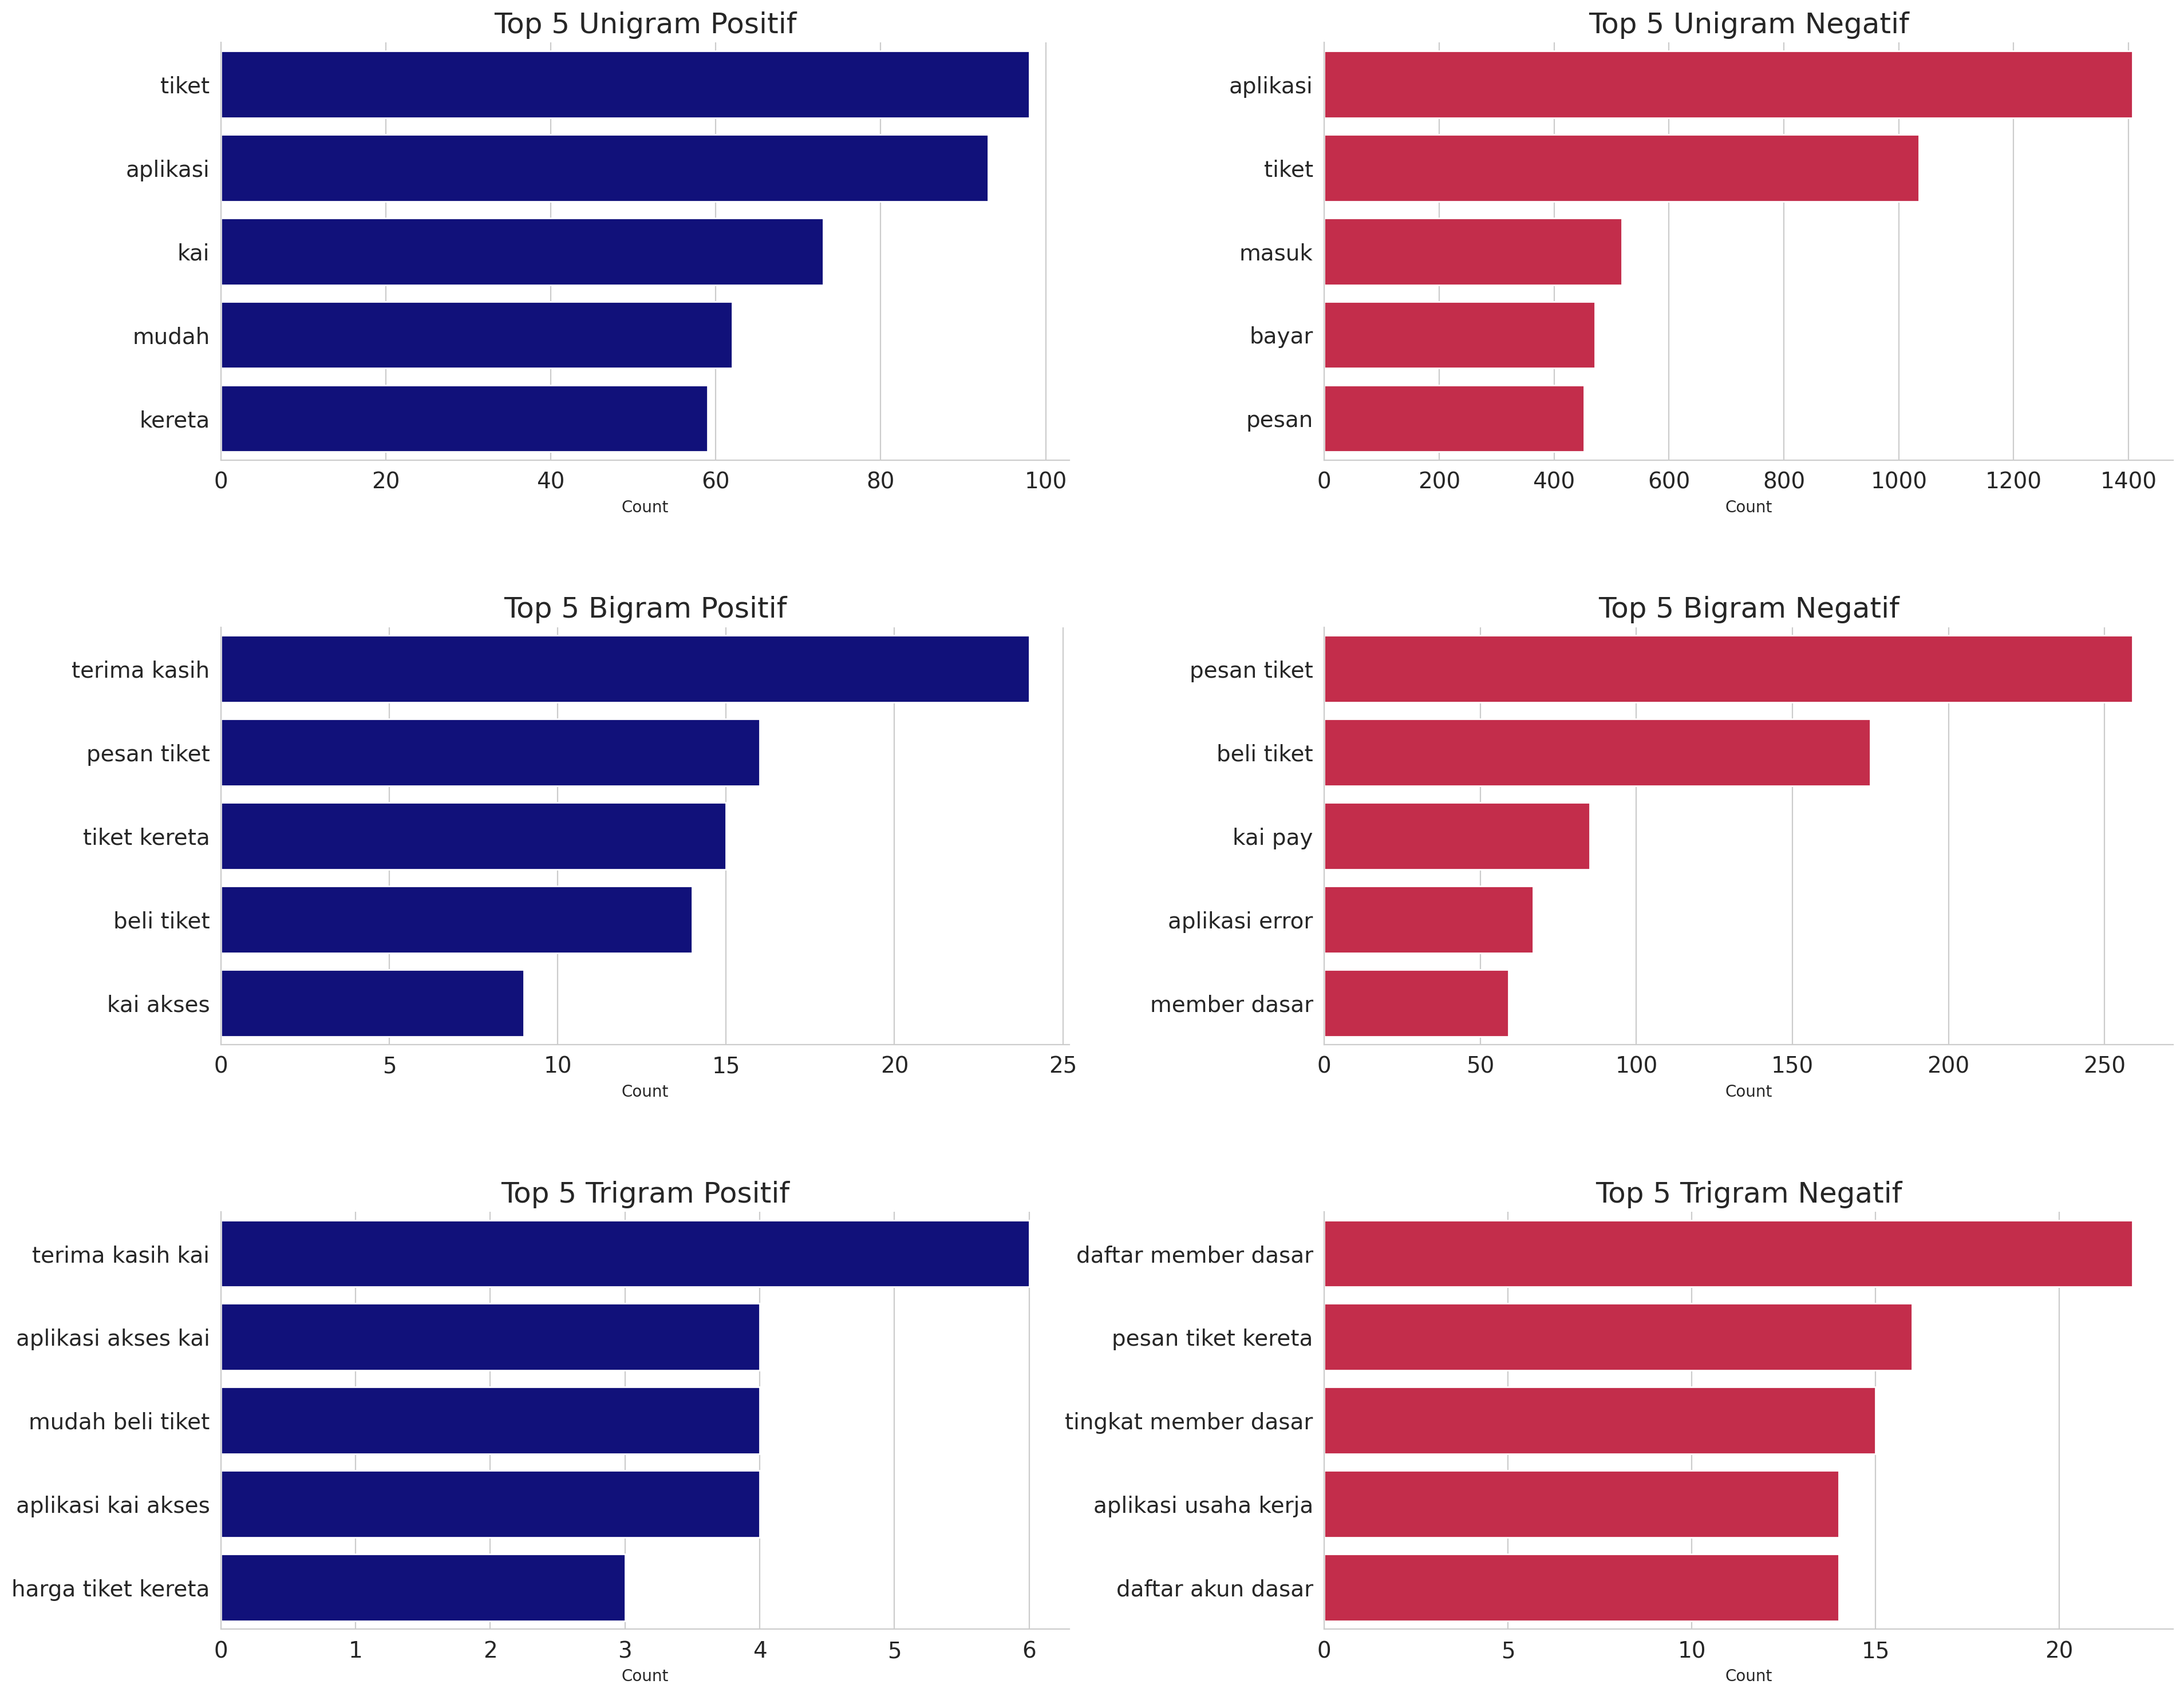

In [ ]:
from collections import defaultdict

# Jumlah N-Gram yang akan dianalisis
N = 5

# Filter DataFrame berdasarkan sentimen
positive_reviews = df_bal.loc[df_bal['sentiment_by_rating'] == 1, 'review']
negative_reviews = df_bal.loc[df_bal['sentiment_by_rating'] == 0, 'review']

# Dictionary untuk menyimpan frekuensi N-Gram
ngram_types = ['unigrams', 'bigrams', 'trigrams']
positive_ngrams = {ngram: defaultdict(int) for ngram in ngram_types}
negative_ngrams = {ngram: defaultdict(int) for ngram in ngram_types}

# Fungsi untuk menghitung n-gram
def count_ngrams(reviews, ngrams_dict):
    for rev in reviews:
        for n in range(1, 4):  # Unigram, Bigram, Trigram
            for word in generate_ngrams(rev, n_gram=n):
                ngrams_dict[ngram_types[n-1]][word] += 1

# Hitung frekuensi n-gram untuk setiap sentimen
count_ngrams(positive_reviews, positive_ngrams)
count_ngrams(negative_reviews, negative_ngrams)

# Fungsi untuk membuat plot N-Gram
def plot_ngrams(title, data, color, ax):
    df_ngrams = pd.DataFrame(sorted(data.items(), key=lambda x: x[1], reverse=True), columns=['N-Gram', 'Count'])
    sns.barplot(y=df_ngrams['N-Gram'][:N], x=df_ngrams['Count'][:N], ax=ax, color=color)
    ax.set_title(title, fontsize=18)
    ax.set_ylabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

# Membuat plot untuk Unigram, Bigram, dan Trigram
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(22, 18), dpi=200)  # Ukuran lebih besar
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Mengatur jarak antar subplot

plot_ngrams(f'Top {N} Unigram Positif', positive_ngrams['unigrams'], 'darkblue', axes[0, 0])
plot_ngrams(f'Top {N} Unigram Negatif', negative_ngrams['unigrams'], 'crimson', axes[0, 1])

plot_ngrams(f'Top {N} Bigram Positif', positive_ngrams['bigrams'], 'darkblue', axes[1, 0])
plot_ngrams(f'Top {N} Bigram Negatif', negative_ngrams['bigrams'], 'crimson', axes[1, 1])

plot_ngrams(f'Top {N} Trigram Positif', positive_ngrams['trigrams'], 'darkblue', axes[2, 0])
plot_ngrams(f'Top {N} Trigram Negatif', negative_ngrams['trigrams'], 'crimson', axes[2, 1])

plt.show()


In [ ]:
df_bal['pred'].value_counts()

pred
0    2535
1     305
Name: count, dtype: int64

<ipython-input-54-b5e4426b1a71>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Sentimen', y='Jumlah', data=df, palette=['#1f77b4', '#d62728'])


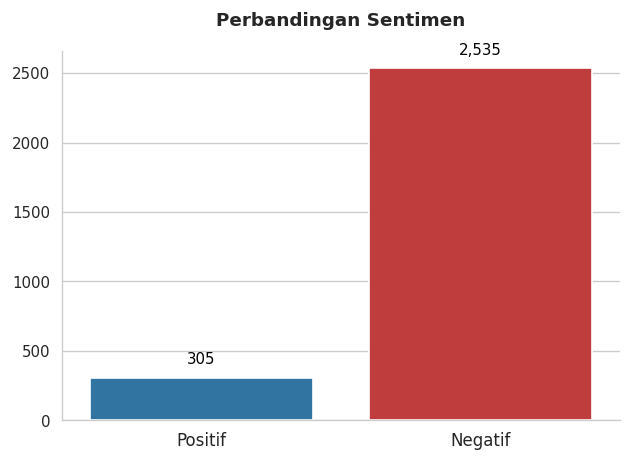

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Menyiapkan data
data = {'Sentimen': ['Positif', 'Negatif'],
        'Jumlah': [305, 2535]}
df = pd.DataFrame(data)

# Mengatur tema seaborn
sns.set_style("whitegrid")

# Membuat plot batang dengan warna yang lebih bold
plt.figure(figsize=(6, 4), dpi=120)
barplot = sns.barplot(x='Sentimen', y='Jumlah', data=df, palette=['#1f77b4', '#d62728'])

# Menghapus legend (agar warning terkait palette tidak muncul)
if barplot.get_legend() is not None:
    barplot.get_legend().remove()

# Menambahkan judul dengan font bold
plt.title('Perbandingan Sentimen', fontsize=11, fontweight='bold', pad=15)

# Menghapus label sumbu X dan Y agar lebih bersih
plt.xlabel('')
plt.ylabel('')

# Mengatur ukuran font angka di sumbu Y lebih kecil
plt.tick_params(axis='y', labelsize=9)

# Menambahkan label nilai di atas batang dengan offset vertikal agar tidak terlalu mepet dengan batang
for index, row in df.iterrows():
    plt.text(index, row['Jumlah'] + 100, f"{row['Jumlah']:,}",
             color='black', ha="center", fontsize=9, fontweight='regular')

# Menghapus garis tepi agar lebih minimalis
sns.despine()

plt.show()
